# Finance Analytics Course - Project 2 - Group 4 - Jad, Karl, Omar, Tarek

# Importing libraries and tools

In [1]:
# Import potential libraries and tools to be used

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

from datetime import datetime
from scipy.stats import chi2_contingency

from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC


# Reading the csv file

In [2]:
# Use pd.read_csv

df0 = pd.read_csv("datico.csv")

# To ensure the display of all columns in subsequent codes
pd.set_option('display.max_columns', None)

Note: df0 is the initial version of the dataframe as read into python.

# Understanding and Preparing the dataset

In [3]:
# checks the names of columns

df0.columns


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_col

In [4]:
# Checks the first couple of rows in a dataframe

df0["Class"].head()

KeyError: 'Class'

In [5]:
# Checks the last couple of rows in a dataframe

df0.tail(10)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
85587  10162966   12014272      10000        10000          10000.0   
85588  40562332   43427126      12000        12000          12000.0   
85589  56021065   59682888      14400        14400          14400.0   
85590  57125251   60828006       7200         7200           7200.0   
85591  35753568   38449004      16500        16500          16500.0   
85592   1043922    1274273       2000         2000           2000.0   
85593  51167809   54577588      12000        12000          12000.0   
85594   8558217   10310166       8000         8000           8000.0   
85595   1130904    1369505      15000        15000          14975.0   
85596   8555927   10308011      20000        20000          20000.0   

             term  int_rate  installment grade sub_grade  \
85587   36 months     11.99       332.10     B        B3   
85588   60 months     14.65       283.28     C        C5   
85589   36 months      8.18       452.45     B        B1   
85590   36 months     12.69       241.53     C        C2   
85591   60 months     19.24       430.21     E        E2   
85592   36 months     13.49        67.87     C        C1   
85593   60 months     20.99       324.58     E        E5   
85594   36 months      7.62       249.30     A        A3   
85595   36 months     13.49       508.96     C        C1   
85596   60 months     16.20       488.49     C        C4   

                            emp_title emp_length home_ownership  annual_inc  \
85587                Customer Service    2 years           RENT     35000.0   
85588   Information systems architect  10+ years       MORTGAGE     98000.0   
85589                        Examiner     1 year           RENT     57200.0   
85590                             NaN        NaN       MORTGAGE     23403.0   
85591                      IT Analyst    6 years           RENT     36000.0   
85592  Sheboygan Area School District  10+ years       MORTGAGE     70000.0   
85593                           Agent    5 years       MORTGAGE     24000.0   
85594                           Sales   < 1 year           RENT     48000.0   
85595                          Recall    2 years           RENT     36000.0   
85596                          Driver  10+ years       MORTGAGE     49000.0   

      verification_status     issue_d pymnt_plan  \
85587        Not Verified  01-01-2014          n   
85588     Source Verified  01-02-2015          n   
85589            Verified  01-07-2015          n   
85590            Verified  01-08-2015          n   
85591     Source Verified  01-11-2014          n   
85592     Source Verified  01-11-2011          n   
85593     Source Verified  01-06-2015          n   
85594     Source Verified  01-11-2013          n   
85595            Verified  01-02-2012          n   
85596     Source Verified  01-11-2013          n   

                                                    desc             purpose  \
85587    Borrower added on 01/07/14 > I want one mont...         credit_card   
85588                                                NaN               house   
85589                                                NaN         credit_card   
85590                                                NaN  debt_consolidation   
85591                                                NaN         credit_card   
85592    Borrower added on 11/27/11 > We are replacin...    home_improvement   
85593                                                NaN  debt_consolidation   
85594                                                NaN         credit_card   
85595    Borrower added on 01/31/12 > Always pay on t...  debt_consolidation   
85596                                                NaN  debt_consolidation   

                           title zip_code addr_state    dti  delinq_2yrs  \
85587       Credit Cards Pay-off    852xx         AZ  21.78            3   
85588                Home buying    292xx         SC   2.90            1   
85589    Credit ca

In [6]:
# Checks the shape of the dataframe in terms of nb of rows and nb of columns

df0.shape


(85597, 73)

Our dataset contains 73 columns and 85,597 rows.

In [7]:
# Retrieves info about each column in the dataframe

df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85597 entries, 0 to 85596
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           85597 non-null  int64  
 1   member_id                    85597 non-null  int64  
 2   loan_amnt                    85597 non-null  int64  
 3   funded_amnt                  85597 non-null  int64  
 4   funded_amnt_inv              85597 non-null  float64
 5   term                         85597 non-null  object 
 6   int_rate                     85597 non-null  float64
 7   installment                  85597 non-null  float64
 8   grade                        85597 non-null  object 
 9   sub_grade                    85597 non-null  object 
 10  emp_title                    80648 non-null  object 
 11  emp_length                   81283 non-null  object 
 12  home_ownership               85597 non-null  object 
 13  annual_inc      

This step is important for identifying missing values and understanding the overall structure of the dataset. 
It helps in planning data cleaning and preprocessing steps.

# Adjustment of data types and Reduction of Memory Usage

In [8]:
# Create new dataframe to adjust data types and reduce memory usage

df1 = df0.copy()

# Display memory usage and data types before optimization
print("Memory usage before optimization:")
print(df0.memory_usage(deep=True).sum() / 1024**2, "MB")

#Convert date columns that are objects into dates
df1['issue_d'] = pd.to_datetime(df1['issue_d'], format='%d-%m-%Y') #issue_d column
df1['earliest_cr_line'] = pd.to_datetime(df1['earliest_cr_line'], format='%d-%m-%Y') #earliest_cr_line column
df1['last_pymnt_d'] = pd.to_datetime(df1['last_pymnt_d'], format='%d-%m-%Y') #last_pymnt_d column
df1['next_pymnt_d'] = pd.to_datetime(df1['next_pymnt_d'], format='%d-%m-%Y') #next_pymnt_d column
df1['last_credit_pull_d'] = pd.to_datetime(df1['last_credit_pull_d'], format='%d-%m-%Y') #last_credit_pull_d column

# Convert integer columns to the smallest possible int type
int_cols = df1.select_dtypes(include=['int64']).columns
df1[int_cols] = df1[int_cols].apply(pd.to_numeric, downcast='integer')

# Convert float columns to the smallest possible float type
float_cols = df1.select_dtypes(include=['float64']).columns
df1[float_cols] = df1[float_cols].apply(pd.to_numeric, downcast='float')

# Convert object columns with few unique values to category type
obj_cols = df1.select_dtypes(include=['object']).columns
for col in obj_cols:
    num_unique_values = len(df1[col].unique())
    num_total_values = len(df1[col])
    if num_unique_values / num_total_values < 0.5:
        df1[col] = df1[col].astype('category')

# Display memory usage and data types after optimization
print("Memory usage after optimization:")
print(df1.memory_usage(deep=True).sum() / 1024**2, "MB")

Memory usage before optimization:
142.19658184051514 MB
Memory usage after optimization:
32.072343826293945 MB


##### By few data type conversions, we managed to reduce the size of the dataFrame by 77.4%

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85597 entries, 0 to 85596
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           85597 non-null  int32         
 1   member_id                    85597 non-null  int32         
 2   loan_amnt                    85597 non-null  int32         
 3   funded_amnt                  85597 non-null  int32         
 4   funded_amnt_inv              85597 non-null  float64       
 5   term                         85597 non-null  category      
 6   int_rate                     85597 non-null  float32       
 7   installment                  85597 non-null  float32       
 8   grade                        85597 non-null  category      
 9   sub_grade                    85597 non-null  category      
 10  emp_title                    80648 non-null  category      
 11  emp_length                   81283 non-nu

Note: df1 is the same as df0 but with adjusted data types and reduced memory usage.

# Exporatory Data Analysis

In [10]:
# generates statistical summary for numerical columns

df1.describe().transpose().round(2)


count         mean          std       min  \
id                           85597.0  32289880.74  22698007.35  62102.00   
member_id                    85597.0  34814713.46  23969491.07  70825.00   
loan_amnt                    85597.0     14726.49      8432.09    500.00   
funded_amnt                  85597.0     14713.93      8425.83    500.00   
funded_amnt_inv              85597.0     14681.86      8431.20      0.00   
int_rate                     85597.0        13.22         4.37      5.32   
installment                  85597.0       435.74       244.13     16.25   
annual_inc                   85597.0     74737.32     55511.97   4800.00   
dti                          85597.0        18.12         8.29      0.00   
delinq_2yrs                  85597.0         0.31         0.85      0.00   
inq_last_6mths               85597.0         0.68         0.96      0.00   
mths_since_last_delinq       41606.0        34.21        21.90      0.00   
mths_since_last_record       12989.0        70.06        27.84      0.00   
open_acc                     85597.0        11.54         5.32      0.00   
pub_rec                      85597.0         0.19         0.54      0.00   
revol_bal                    85597.0     16829.70     20290.96      0.00   
revol_util                   85554.0        54.98        23.75      0.00   
total_acc                    85597.0        25.24        11.81      2.00   
out_prncp                    85597.0      8306.32      8480.14      0.00   
out_prncp_inv                85597.0      8302.90      8476.68      0.00   
total_pymnt                  85597.0      7608.94      7838.48      0.00   
total_pymnt_inv              85597.0      7578.09      7812.56      0.00   
total_rec_prncp              85597.0      5812.73      6618.31      0.00   
total_rec_int                85597.0      1749.45      2068.85      0.00   
total_rec_late_fee           85597.0         0.32         3.64      0.00   
recoveries                   85597.0        46.45       397.13      0.00   
collection_recovery_fee      85597.0         4.87        58.23      0.00   
last_pymnt_amnt              85597.0      2208.00      4809.22      0.00   
collections_12_mths_ex_med   85594.0         0.01         0.13      0.00   
mths_since_last_major_derog  21191.0        44.08        22.18      0.00   
policy_code                  85597.0         1.00         0.00      1.00   
annual_inc_joint                34.0    103996.12     44011.92  40034.00   
dti_joint                       34.0        19.15         6.08      6.17   
acc_now_delinq               85597.0         0.00         0.08      0.00   
tot_coll_amt                 79016.0       208.76      1691.48      0.00   
tot_cur_bal                  79016.0    138956.62    152242.86      0.00   
open_acc_6m                   1373.0         1.10         1.26      0.00   
open_il_6m                    1373.0         2.88         3.00      0.00   
open_il_12m                   1373.0         0.78         1.08      0.00   
open_il_24m                   1373.0         1.68         1.77      0.00   
mths_since_rcnt_il            1342.0        21.64        27.96      1.00   
total_bal_il                  1373.0     35018.57     39478.41      0.00   
il_util                       1194.0        71.11        22.76      0.00   
open_rv_12m                   1373.0         1.35         1.52      0.00   
open_rv_24m                   1373.0         2.92         2.68      0.00   
max_bal_bc                    1373.0      5897.43      4964.48      0.00   
all_util                      1373.0        59.92        19.64      0.00   
total_rev_hi_lim             79016.0     32026.34     30984.99      0.00   
inq_fi                        1373.0         0.92         1.53      0.00   
total_cu_tl                   1373.0         1.58         2.83      0.00   
inq_last_12m                  1373.0         1.72         2.93     -4.00   
default_ind                  85597.0         0.05         0.23      0.00   

  

* Descriptive statistics provide a quick overview of the dataset, helping to understand the distribution and identify potential outliers.

Columns with null values:

emp_title                       4949
emp_length                      4314
desc                           73622
title                              3
mths_since_last_delinq         43991
mths_since_last_record         72608
revol_util                        43
last_pymnt_d                     894
next_pymnt_d                   25192
last_credit_pull_d                 3
collections_12_mths_ex_med         3
mths_since_last_major_derog    64406
annual_inc_joint               85563
dti_joint                      85563
verification_status_joint      85563
tot_coll_amt                    6581
tot_cur_bal                     6581
open_acc_6m                    84224
open_il_6m                     84224
open_il_12m                    84224
open_il_24m                    84224
mths_since_rcnt_il             84255
total_bal_il                   84224
il_util                        84403
open_rv_12m                    84224
open_rv_24m                    84224
max_bal_bc 

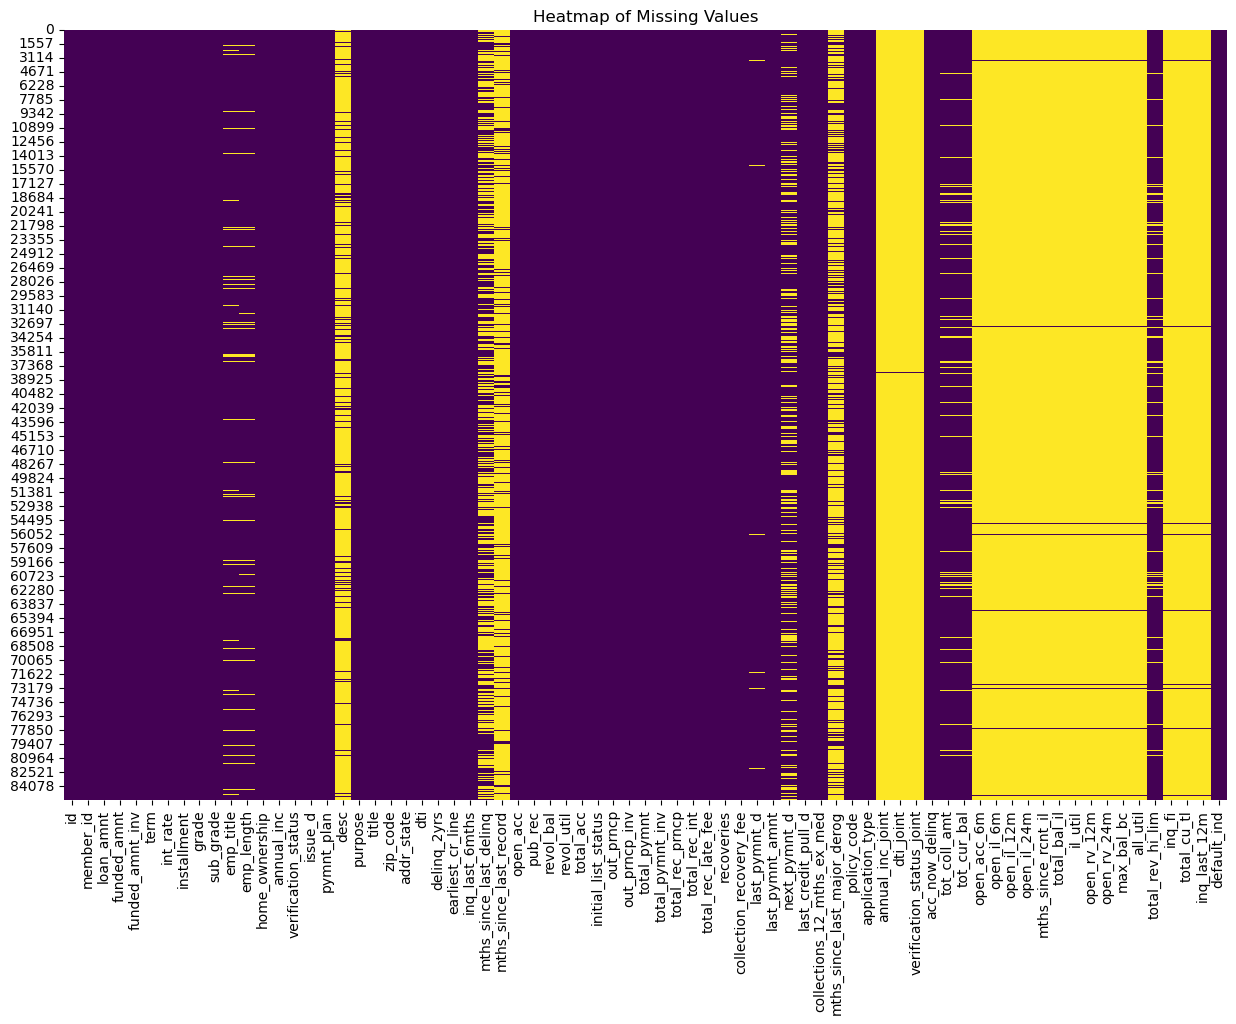

In [11]:
# Missing values per column
null_counts = df1.isnull().sum()
print("Columns with null values:\n")
print(null_counts[null_counts > 0])

# Visualization of missing values
plt.figure(figsize=(15, 10))
sns.heatmap(df1.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()


Assessing the null values allows us to understand which columns can be dropped,and which require filling in the nulls. 

In [12]:
import pandas as pd

# Calculate the percentage of null values in each column
null_percentage = df1.isnull().mean() * 100

# Identify columns with more than 75% null values
columns_to_drop_null = null_percentage[null_percentage >= 75].index

# Identify columns with only one unique value
columns_to_drop_unique = [col for col in df1.columns if df1[col].nunique() == 1]

# Combine the two sets of columns to drop
columns_to_drop = set(columns_to_drop_null).union(set(columns_to_drop_unique))

# Drop these columns from the DataFrame and store the result in df2
df2 = df1.drop(columns=columns_to_drop)

# Display the remaining columns in df2
print("Remaining columns after dropping those with more than 75% null values and only one unique value:")
print(df2.columns)


Remaining columns after dropping those with more than 75% null values and only one unique value:
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'default_ind'],
      d

Note: df2 is df1 minus the columns that have more than 75% of their values as null.

Columns with null values:

emp_title                      4949
emp_length                     4314
title                             3
mths_since_last_delinq        43991
revol_util                       43
last_pymnt_d                    894
next_pymnt_d                  25192
last_credit_pull_d                3
collections_12_mths_ex_med        3
tot_coll_amt                   6581
tot_cur_bal                    6581
total_rev_hi_lim               6581
dtype: int64


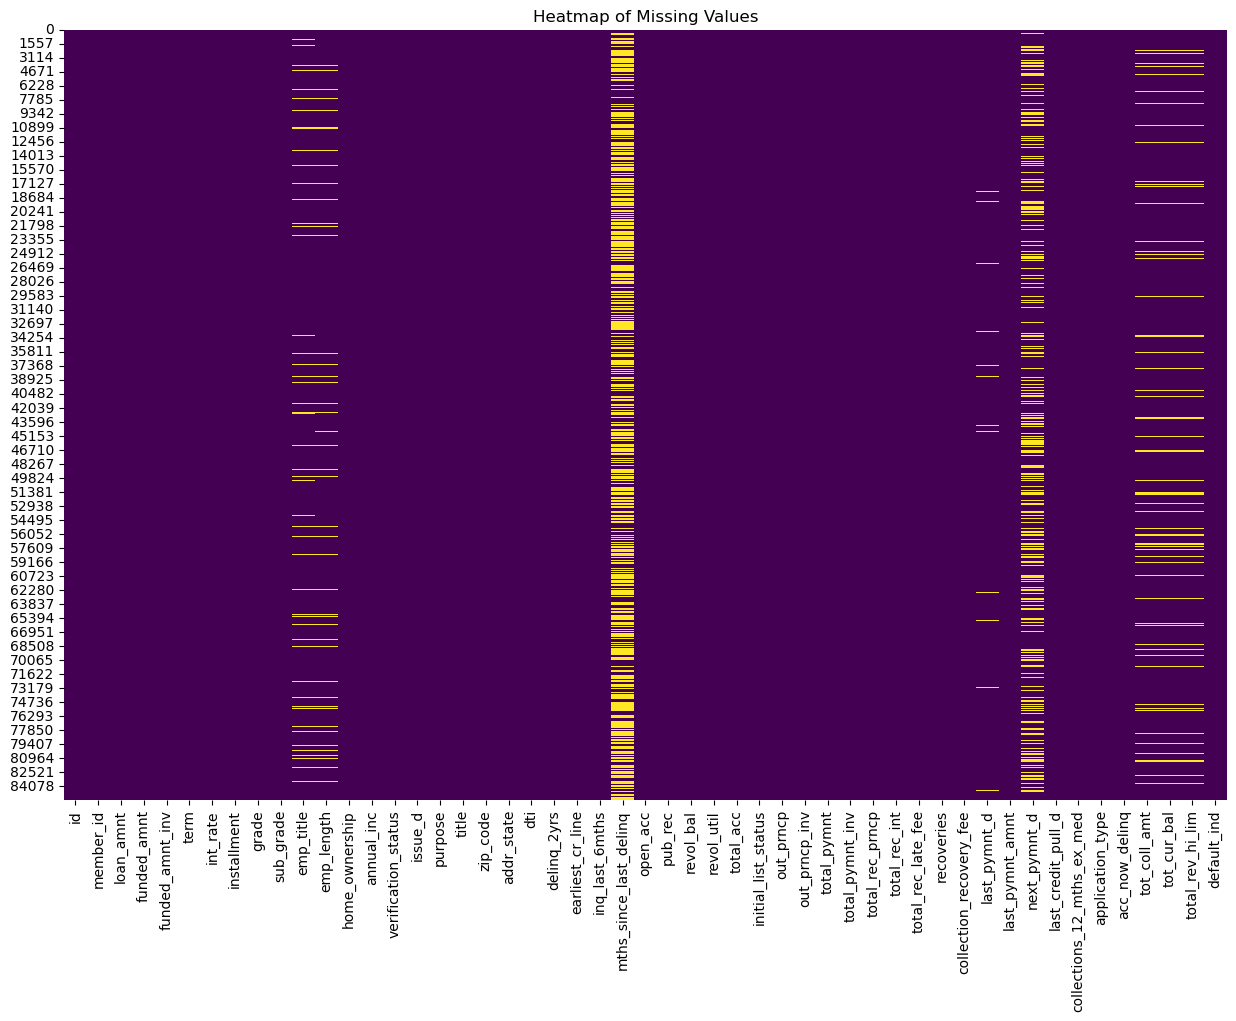

In [13]:
# Missing values per column
null_counts = df2.isnull().sum()
print("Columns with null values:\n")
print(null_counts[null_counts > 0])

# Visualization of missing values
plt.figure(figsize=(15, 10))
sns.heatmap(df2.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

# EDA of Selected Numerical Features


Distribution of Numerical Feature by Target Variable:


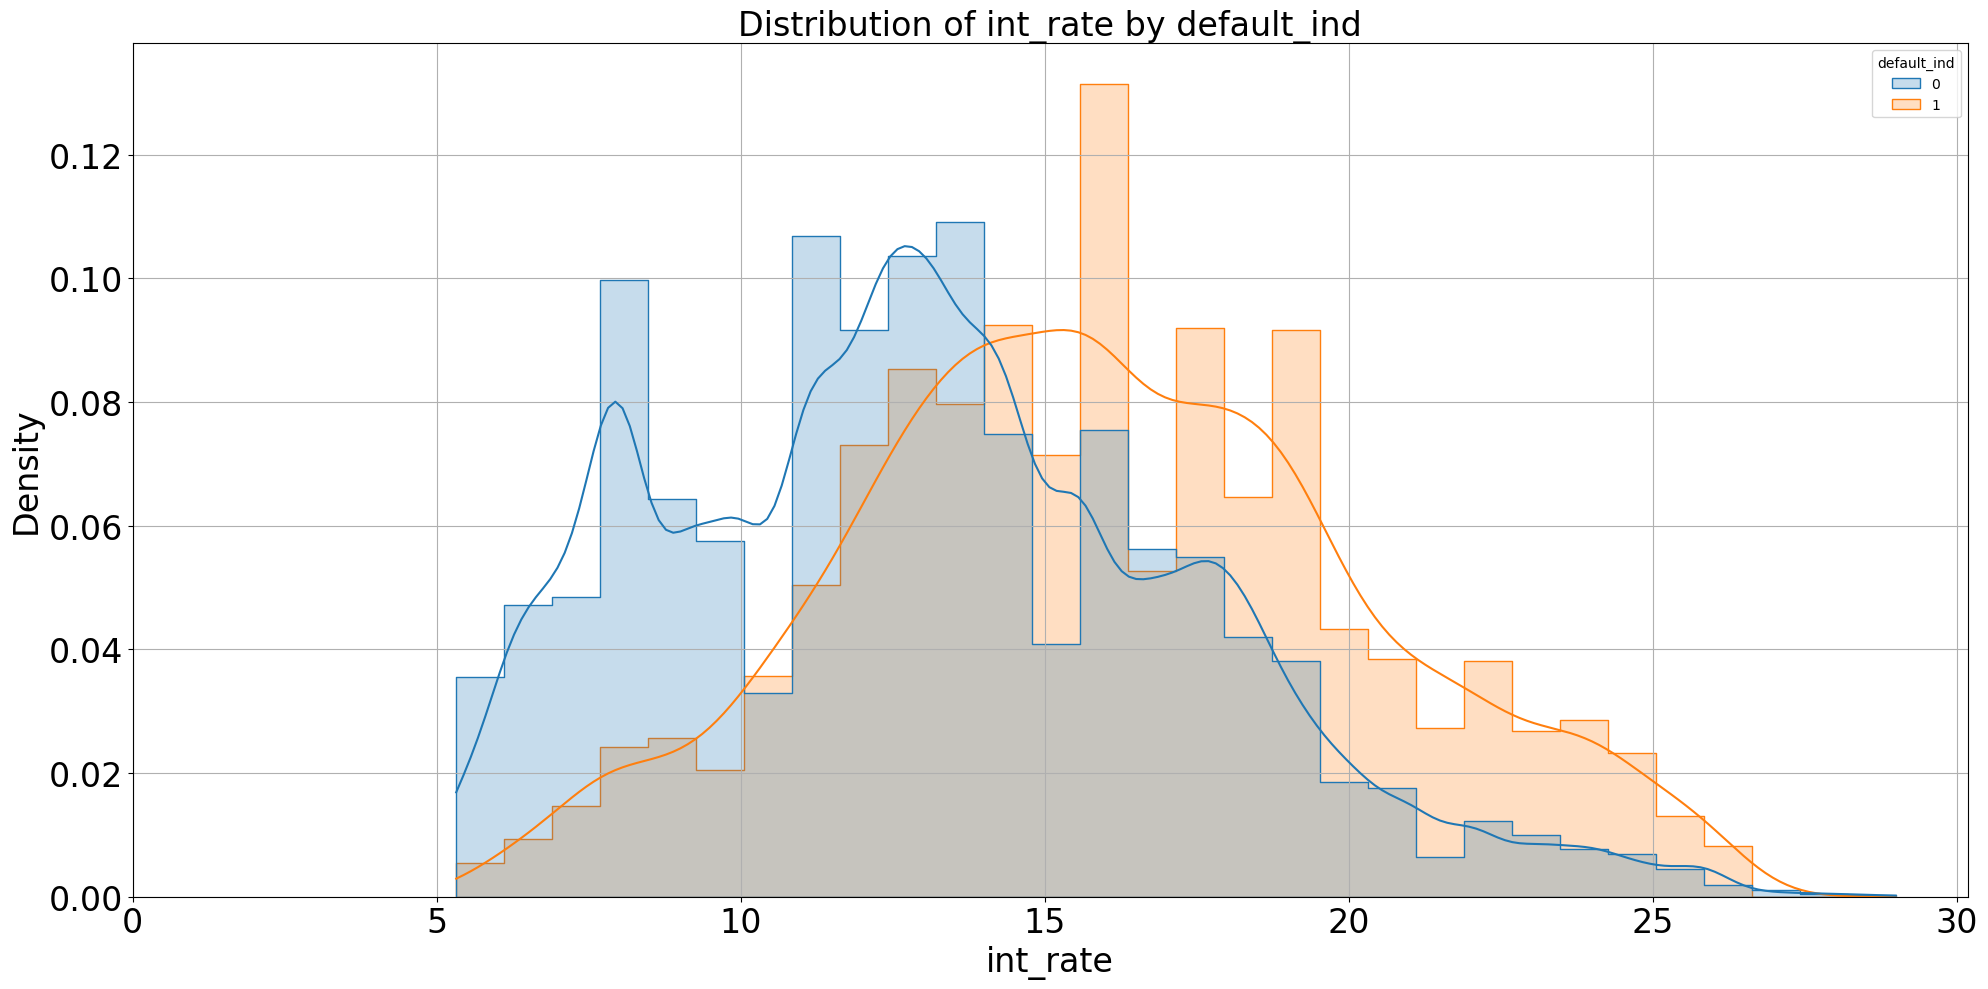

In [14]:
# Select the numerical feature and the target variable
numerical_feature = 'int_rate'
target_variable = 'default_ind'

# Plot the distribution of the selected numerical feature separated by the target variable
print("\nDistribution of Numerical Feature by Target Variable:")
fig, ax = plt.subplots(figsize=(20, 10))  # Adjusted the figure size for a single plot
sns.histplot(data=df2, x=numerical_feature, hue=target_variable, bins=30, kde=True, element="step", stat="density", common_norm=False, ax=ax)
ax.set_title(f'Distribution of {numerical_feature} by {target_variable}', fontsize=24)
ax.set_xlabel(numerical_feature, fontsize=24)
ax.set_ylabel('Density', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=24)

# Ensure the x-axis and y-axis start at 0
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

# Draw the grid to better visualize the alignment
ax.grid(True)

plt.tight_layout()
plt.show()

When the interest rate is between 5% and 14%, non-defaults' density is higher than that of defaults. This suggests that loans with lower interest rates are more likely to be repaid (non-default).

When the interest rate is between 14% and 30%, the density of defaults surpasses that of non-defaults. This indicates that loans with higher interest rates are more likely to default.


Distribution of Numerical Feature by Target Variable:


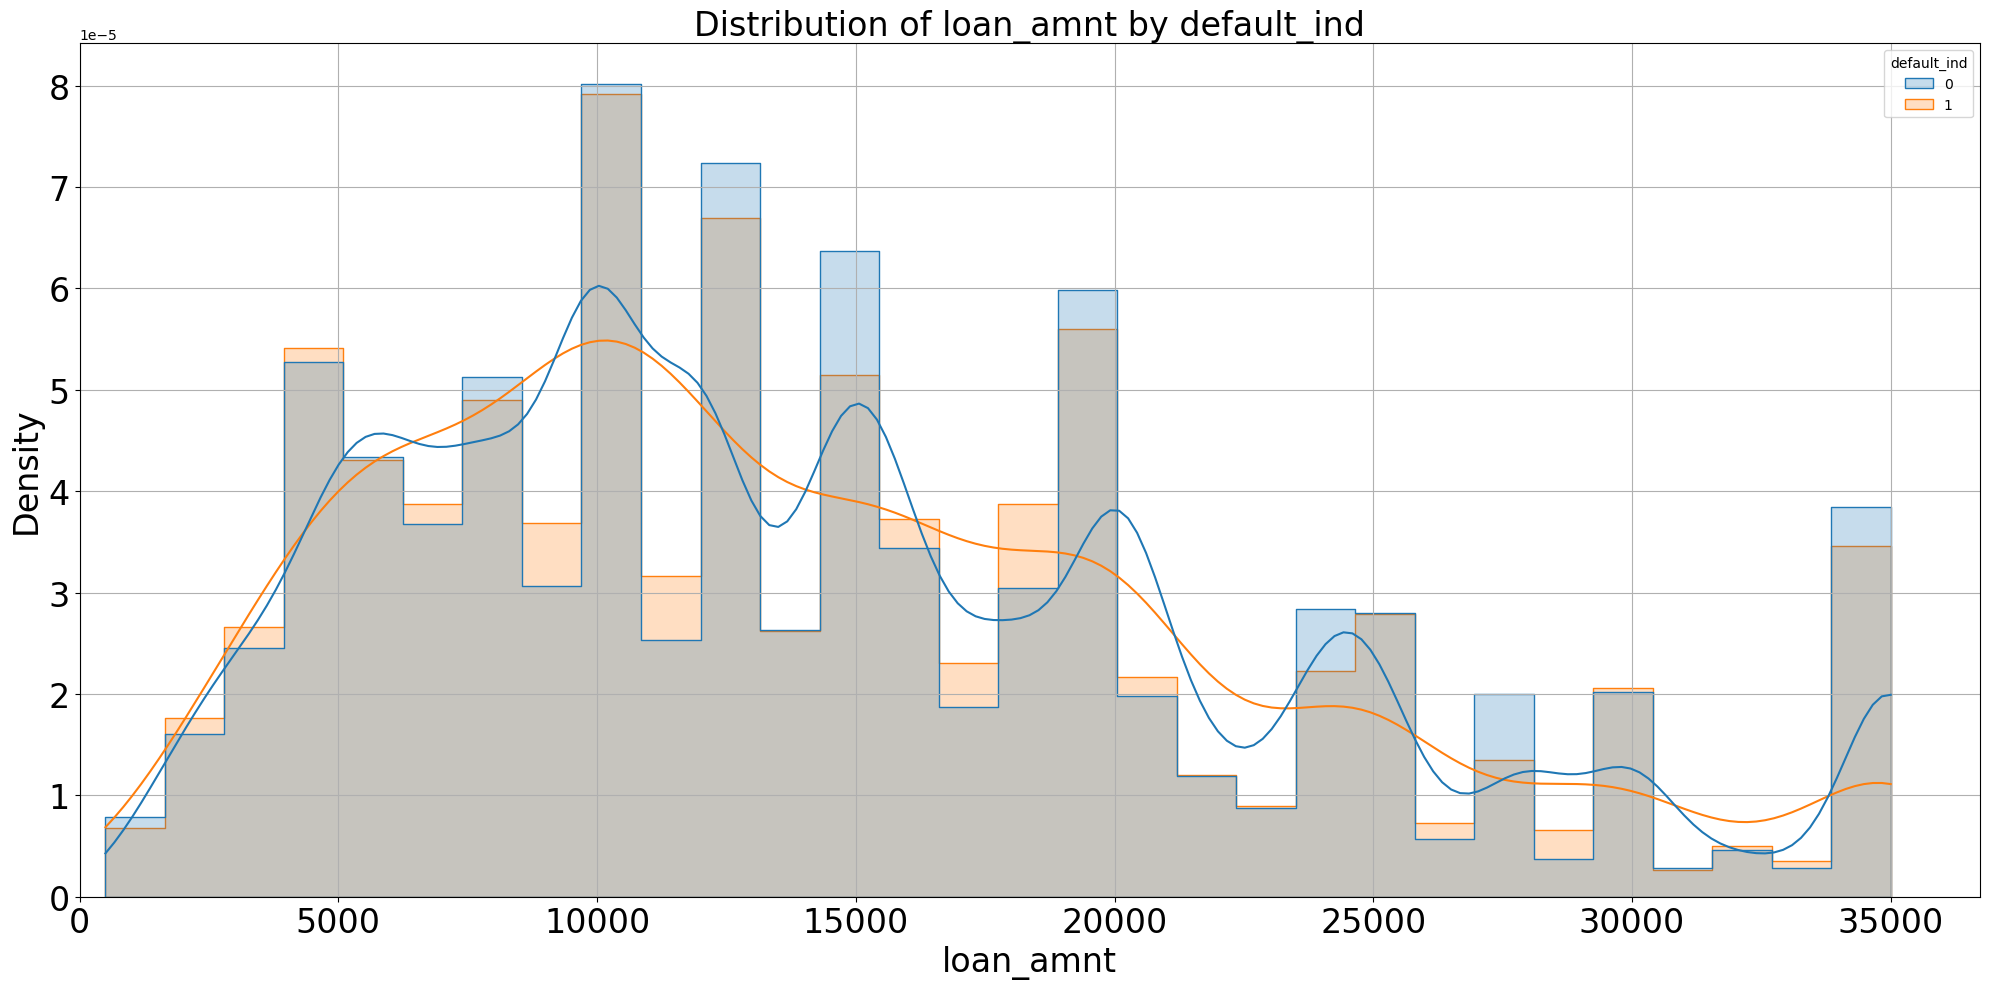

In [15]:
# Select the numerical feature and the target variable
numerical_feature = 'loan_amnt'
target_variable = 'default_ind'

# Plot the distribution of the selected numerical feature separated by the target variable
print("\nDistribution of Numerical Feature by Target Variable:")
fig, ax = plt.subplots(figsize=(20, 10))  # Adjusted the figure size for a single plot
sns.histplot(data=df2, x=numerical_feature, hue=target_variable, bins=30, kde=True, element="step", stat="density", common_norm=False, ax=ax)
ax.set_title(f'Distribution of {numerical_feature} by {target_variable}', fontsize=24)
ax.set_xlabel(numerical_feature, fontsize=24)
ax.set_ylabel('Density', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=24)

# Ensure the x-axis and y-axis start at 0
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

# Draw the grid to better visualize the alignment
ax.grid(True)

plt.tight_layout()
plt.show()

It might be easy to hypothesize that with larger loan amounts, the incidence of default may be higher. Still, the distribution suggests that default risk is not solely dependent on the loan amount, 
as there is considerable overlap between defaulted and non-defaulted loans across most loan amounts.


Distribution of Numerical Feature by Target Variable:


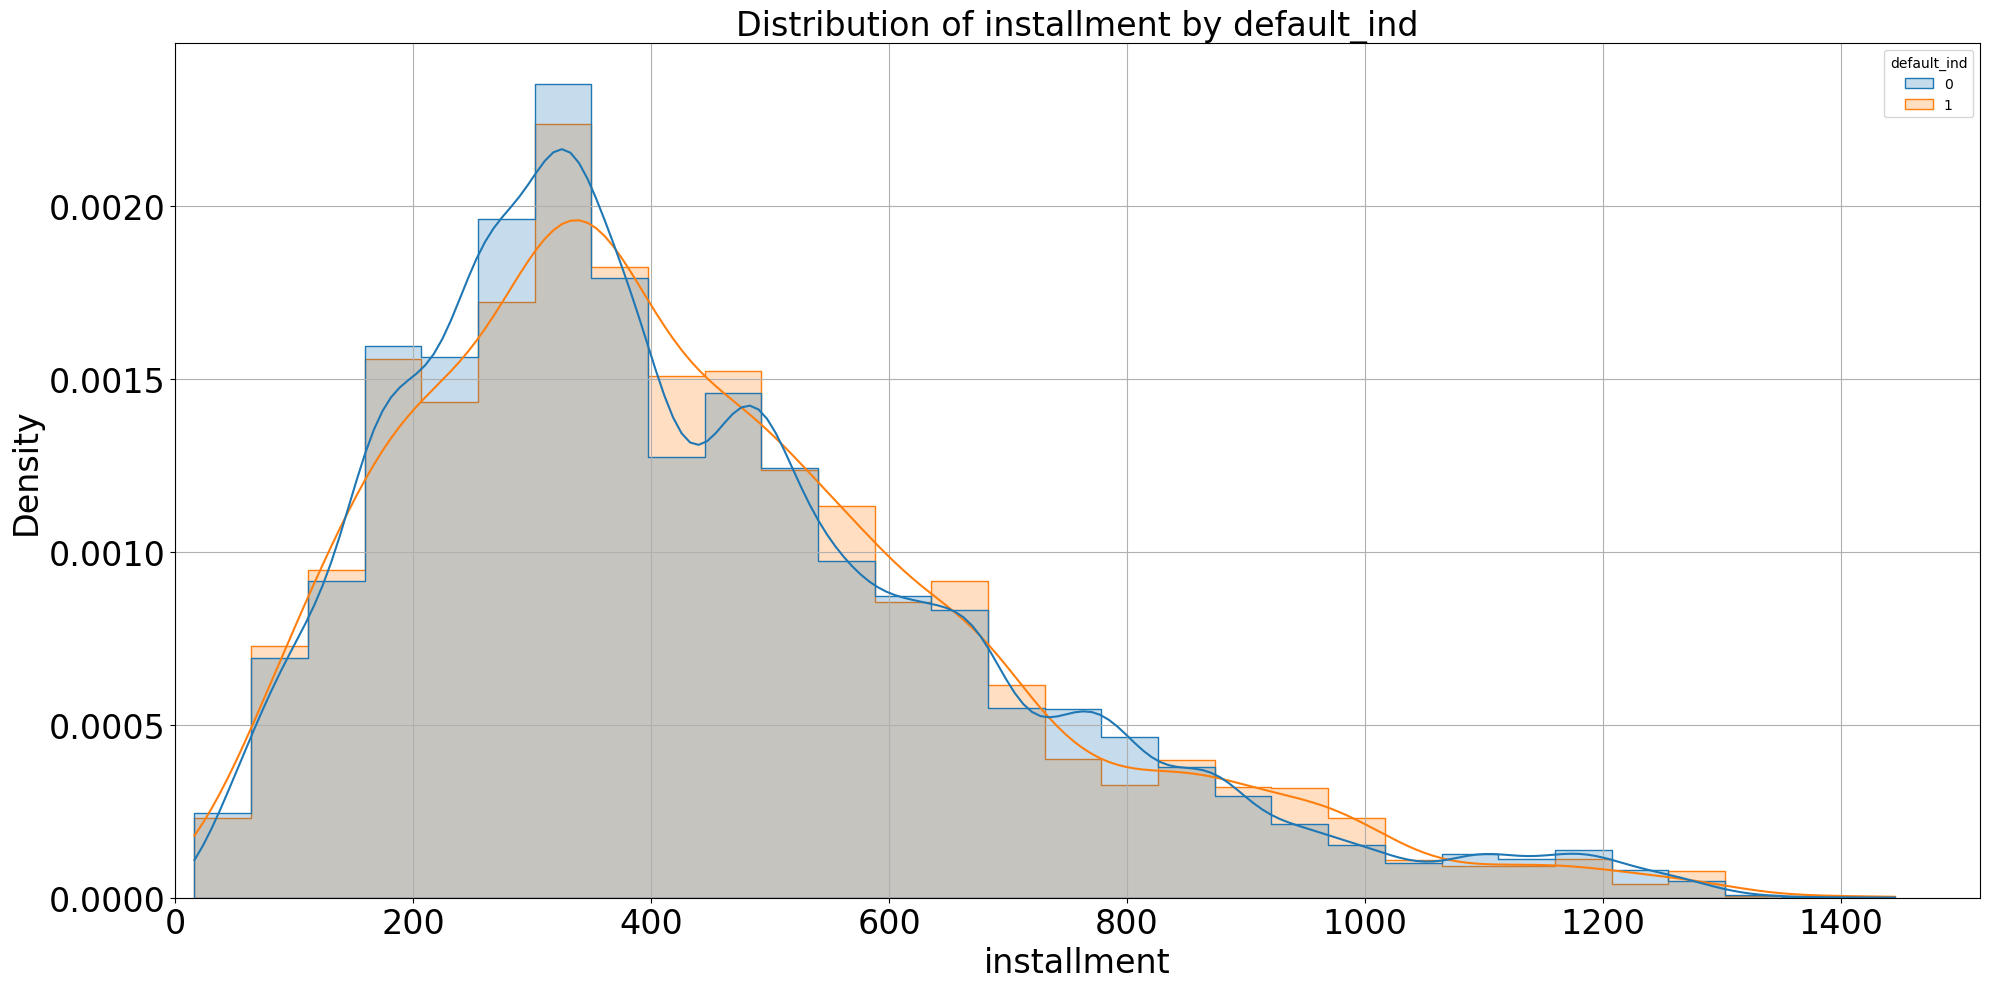

In [16]:
# Select the numerical feature and the target variable
numerical_feature = 'installment'
target_variable = 'default_ind'

# Plot the distribution of the selected numerical feature separated by the target variable
print("\nDistribution of Numerical Feature by Target Variable:")
fig, ax = plt.subplots(figsize=(20, 10))  # Adjusted the figure size for a single plot
sns.histplot(data=df2, x=numerical_feature, hue=target_variable, bins=30, kde=True, element="step", stat="density", common_norm=False, ax=ax)
ax.set_title(f'Distribution of {numerical_feature} by {target_variable}', fontsize=24)
ax.set_xlabel(numerical_feature, fontsize=24)
ax.set_ylabel('Density', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=24)

# Ensure the x-axis and y-axis start at 0
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

# Draw the grid to better visualize the alignment
ax.grid(True)

plt.tight_layout()
plt.show()

Similar to loan amount, the same logic may apply for installments. With larger installments, repayment may be expected to be harder on the borrower i.e. the risk of default is expected to be higher, but the distribution suggests that default risk is not solely dependent on the installment amount, 
as there is considerable overlap between defaulted and non-defaulted loans across most installment amounts.



Distribution of Numerical Feature by Target Variable:


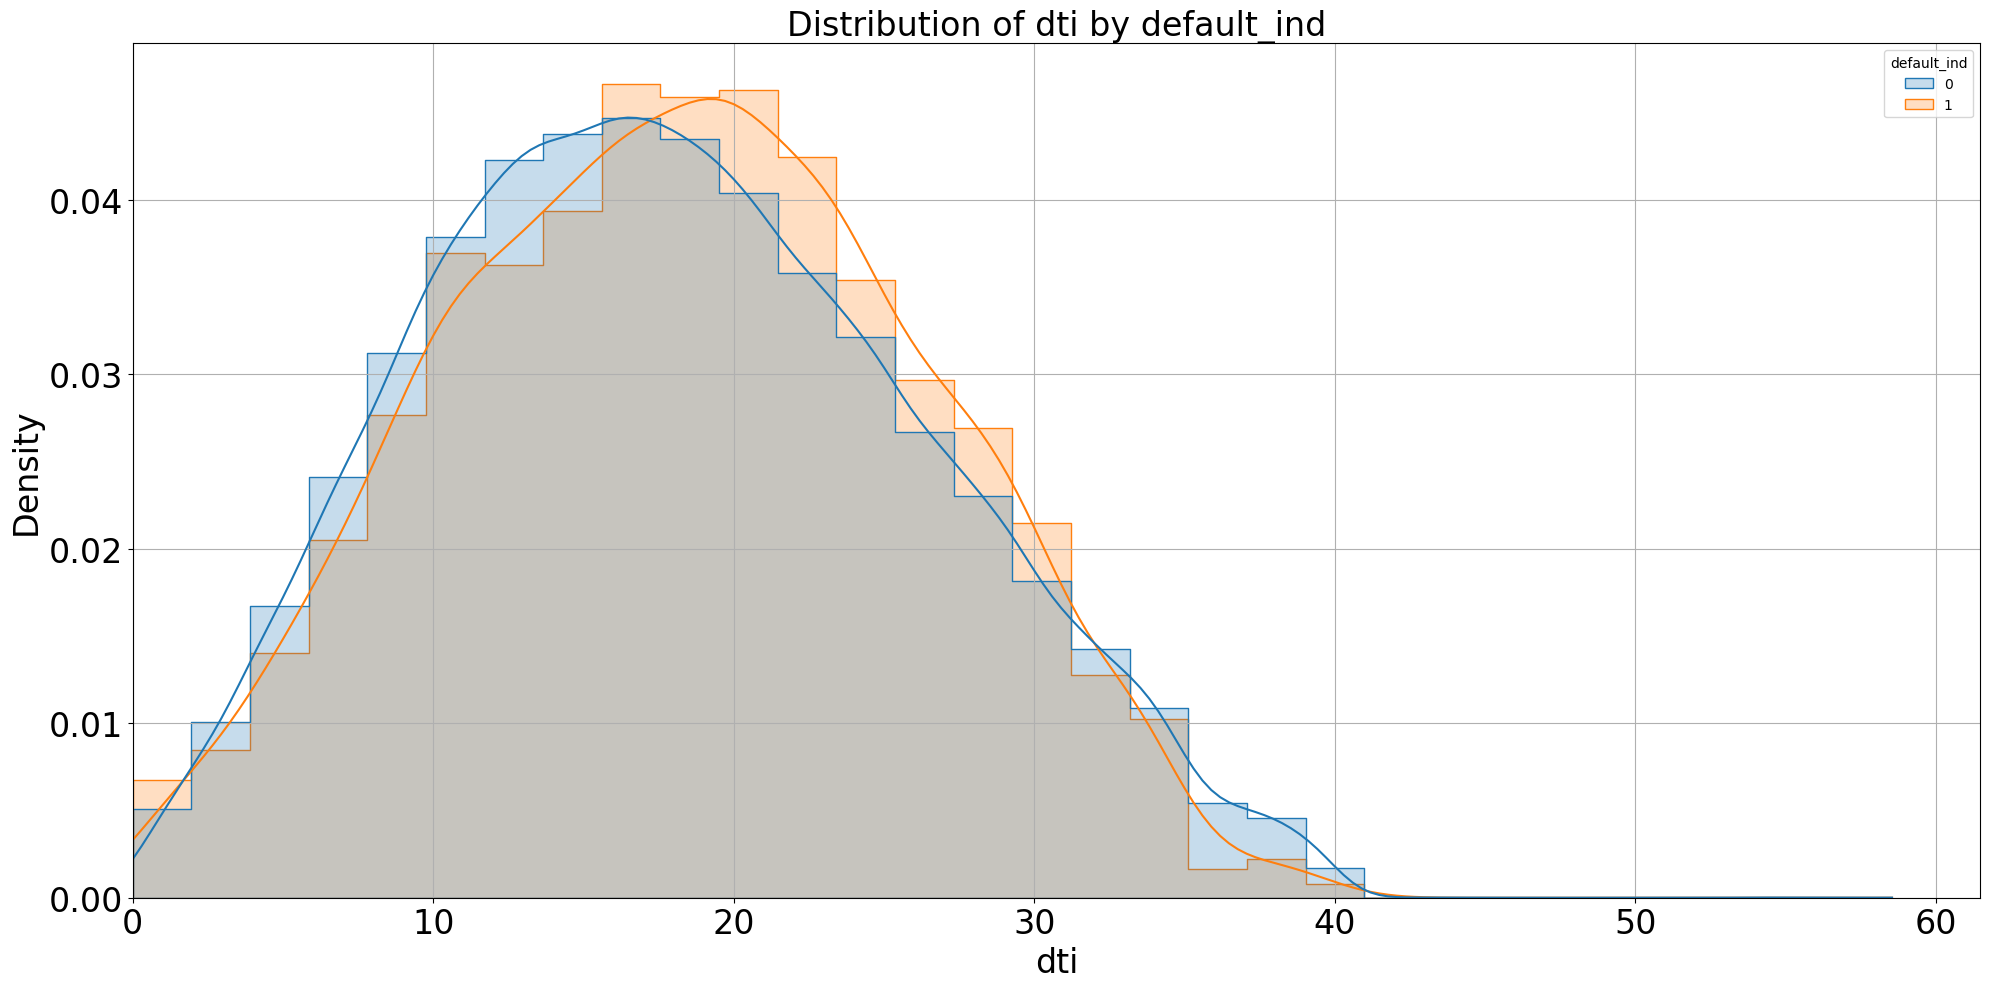

In [17]:
# Select the numerical feature and the target variable
numerical_feature = 'dti'
target_variable = 'default_ind'

# Plot the distribution of the selected numerical feature separated by the target variable
print("\nDistribution of Numerical Feature by Target Variable:")
fig, ax = plt.subplots(figsize=(20, 10))  # Adjusted the figure size for a single plot
sns.histplot(data=df2, x=numerical_feature, hue=target_variable, bins=30, kde=True, element="step", stat="density", common_norm=False, ax=ax)
ax.set_title(f'Distribution of {numerical_feature} by {target_variable}', fontsize=24)
ax.set_xlabel(numerical_feature, fontsize=24)
ax.set_ylabel('Density', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=24)

# Ensure the x-axis and y-axis start at 0
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

# Draw the grid to better visualize the alignment
ax.grid(True)

plt.tight_layout()
plt.show()

dti: The debt-to-income ratio of the borrower.

Normally, the increase in dti signals a riskier position for the borrower.
The distribution of debt to income ratio shows a significant overlap between default and non-default.
Still, it is worth noting that for dti less than ~ 18 the non-default cases seem to have a slightly higher presentation than defaults. Conversely, the default cases are higher with dti above ~ 20 through ~ 32.
It is surprising to have more non-defaults than defaults above ~ 32.

This is an indicator that dti is not a sole indicator of default. Considering the slight difference in
distribution, it could be a value of interest.


Distribution of Numerical Feature by Target Variable:


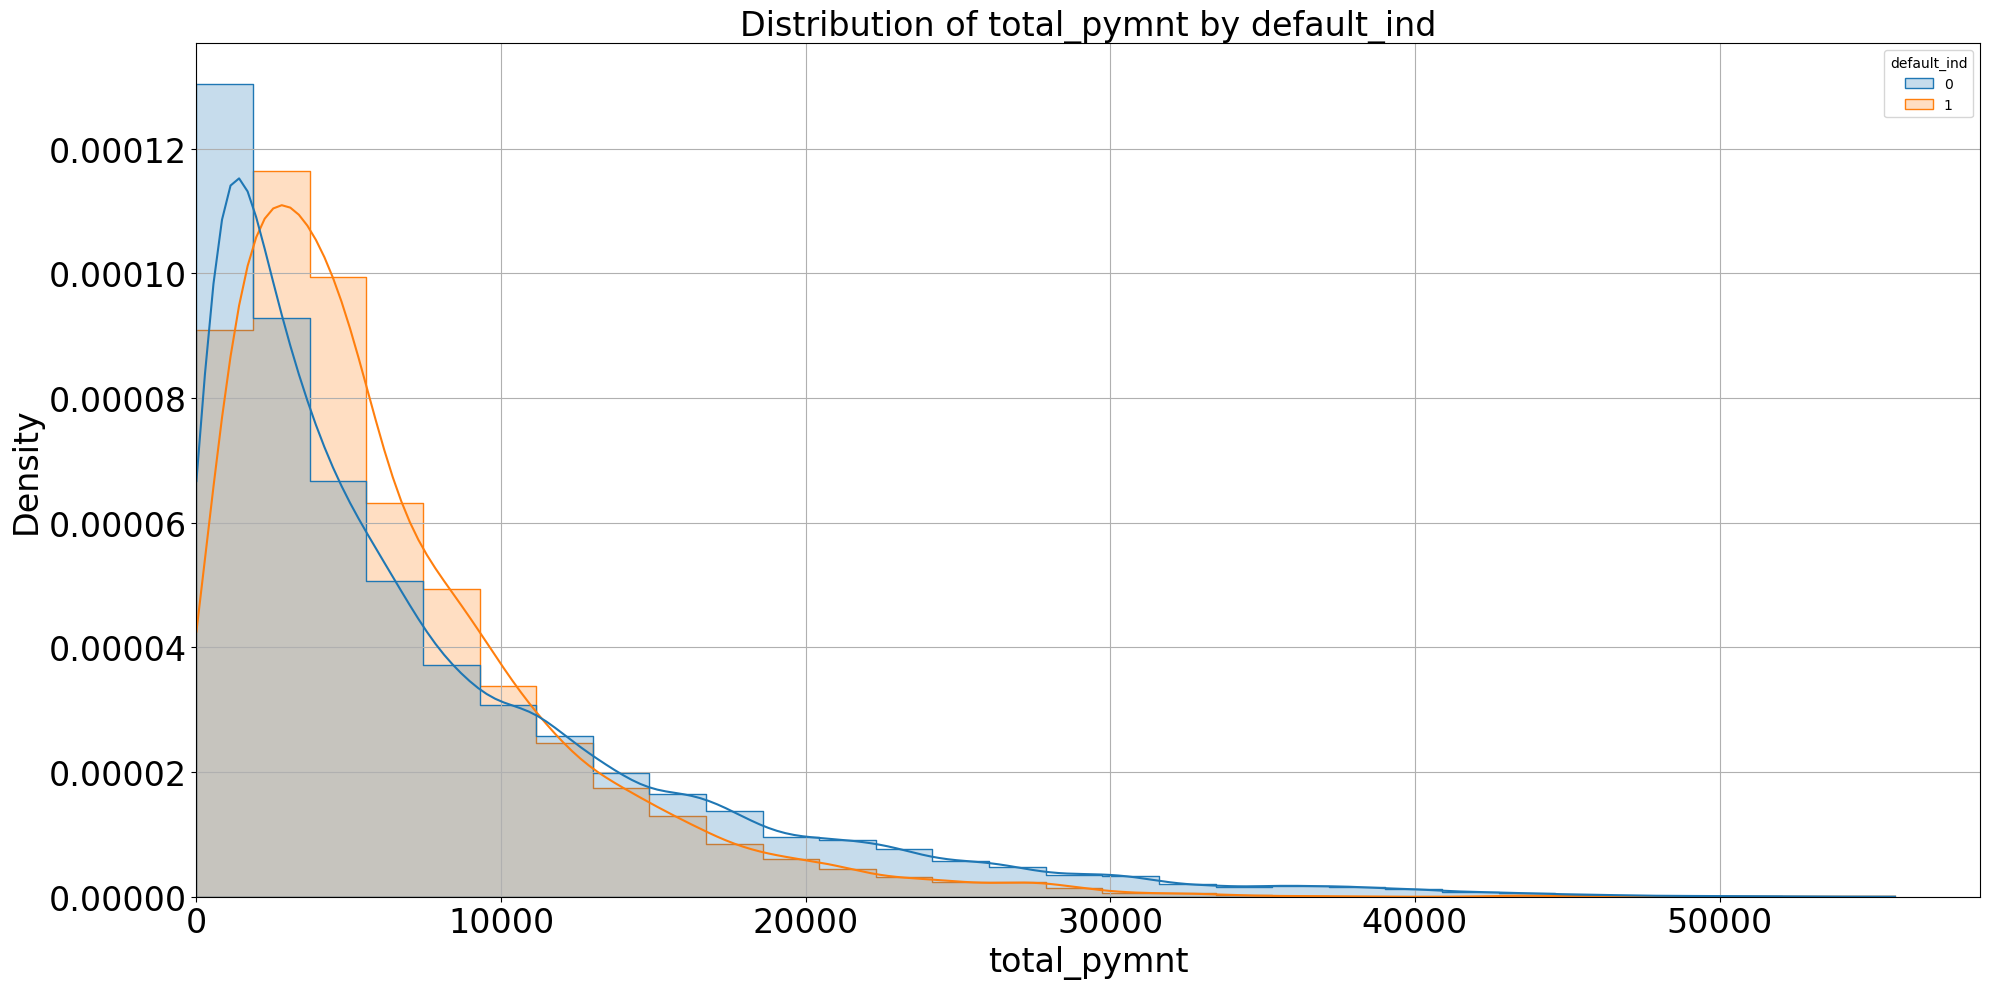

In [18]:
# Select the numerical feature and the target variable
numerical_feature = 'total_pymnt'
target_variable = 'default_ind'

# Plot the distribution of the selected numerical feature separated by the target variable
print("\nDistribution of Numerical Feature by Target Variable:")
fig, ax = plt.subplots(figsize=(20, 10))  # Adjusted the figure size for a single plot
sns.histplot(data=df2, x=numerical_feature, hue=target_variable, bins=30, kde=True, element="step", stat="density", common_norm=False, ax=ax)
ax.set_title(f'Distribution of {numerical_feature} by {target_variable}', fontsize=24)
ax.set_xlabel(numerical_feature, fontsize=24)
ax.set_ylabel('Density', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=24)

# Ensure the x-axis and y-axis start at 0
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

# Draw the grid to better visualize the alignment
ax.grid(True)

plt.tight_layout()
plt.show()

The distribution of total payments to date is right skewed. this implies that less loans have higher payments than loans of lower payments, which is logically expected.

The question whether the right skewness of total payment is correlated with the right skewness of the loan amount can further be investigated in a separate exercise.


Pair Plot of Numerical Features by Target Variable:


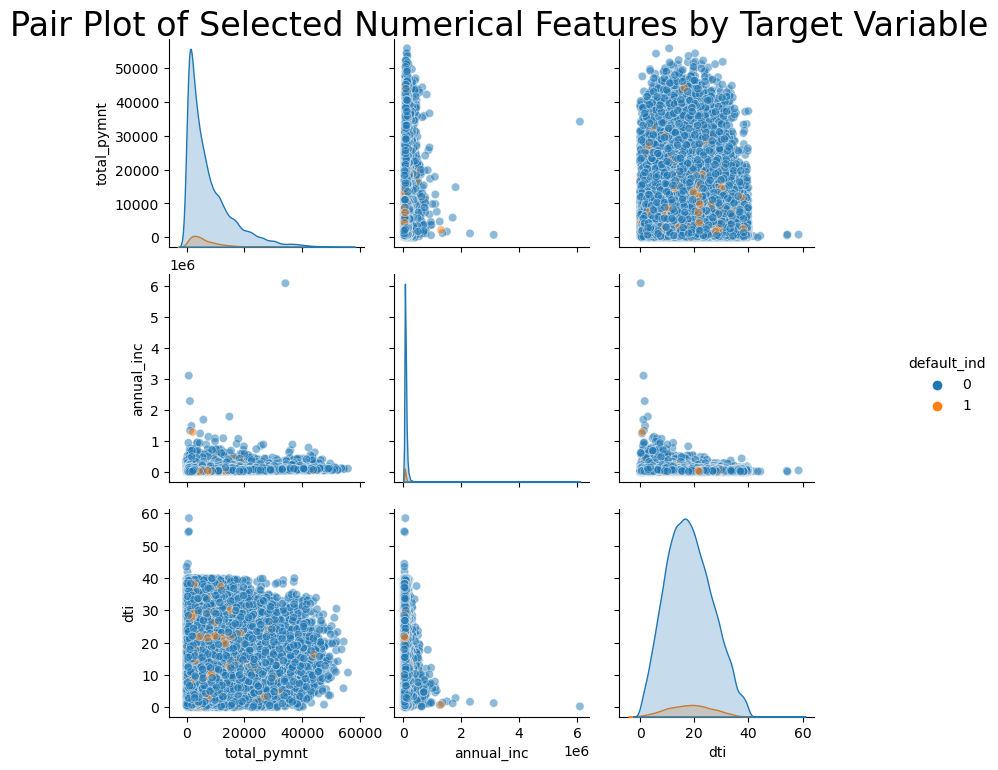

In [19]:
# Select multiple numerical features and the target variable
features = ['total_pymnt', 'annual_inc', 'dti']
target_variable = 'default_ind'

# Plot the pair plot for the selected numerical features with hue
print("\nPair Plot of Numerical Features by Target Variable:")
sns.pairplot(df2[features + [target_variable]], diag_kind='kde', hue=target_variable, plot_kws={'alpha':0.5})
plt.suptitle('Pair Plot of Selected Numerical Features by Target Variable', fontsize=24, y=1.02)
plt.show()

* Total Payment to Annual Income: most borrowers have lower annual incomes and lower total payments on their loans.
There isn't a distinct pattern or region in the scatter plot where defaulted loans are significantly different from non-defaulted loans based on these two features alone.
* Total Payment to dti: DTIs and total payments are wide spread, with more dense total payments at the left side.
* Annual Income to dti: Most data points are concentrated at lower annual incomes.

Overall, the Pair plot does not indicate relations that need further analysis. 



Correlation Heatmap:


/var/folders/vg/tpjx1nws7cz7gpw5xfhk_l2r0000gn/T/ipykernel_1056/3660814754.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df2_no_ids.corr()


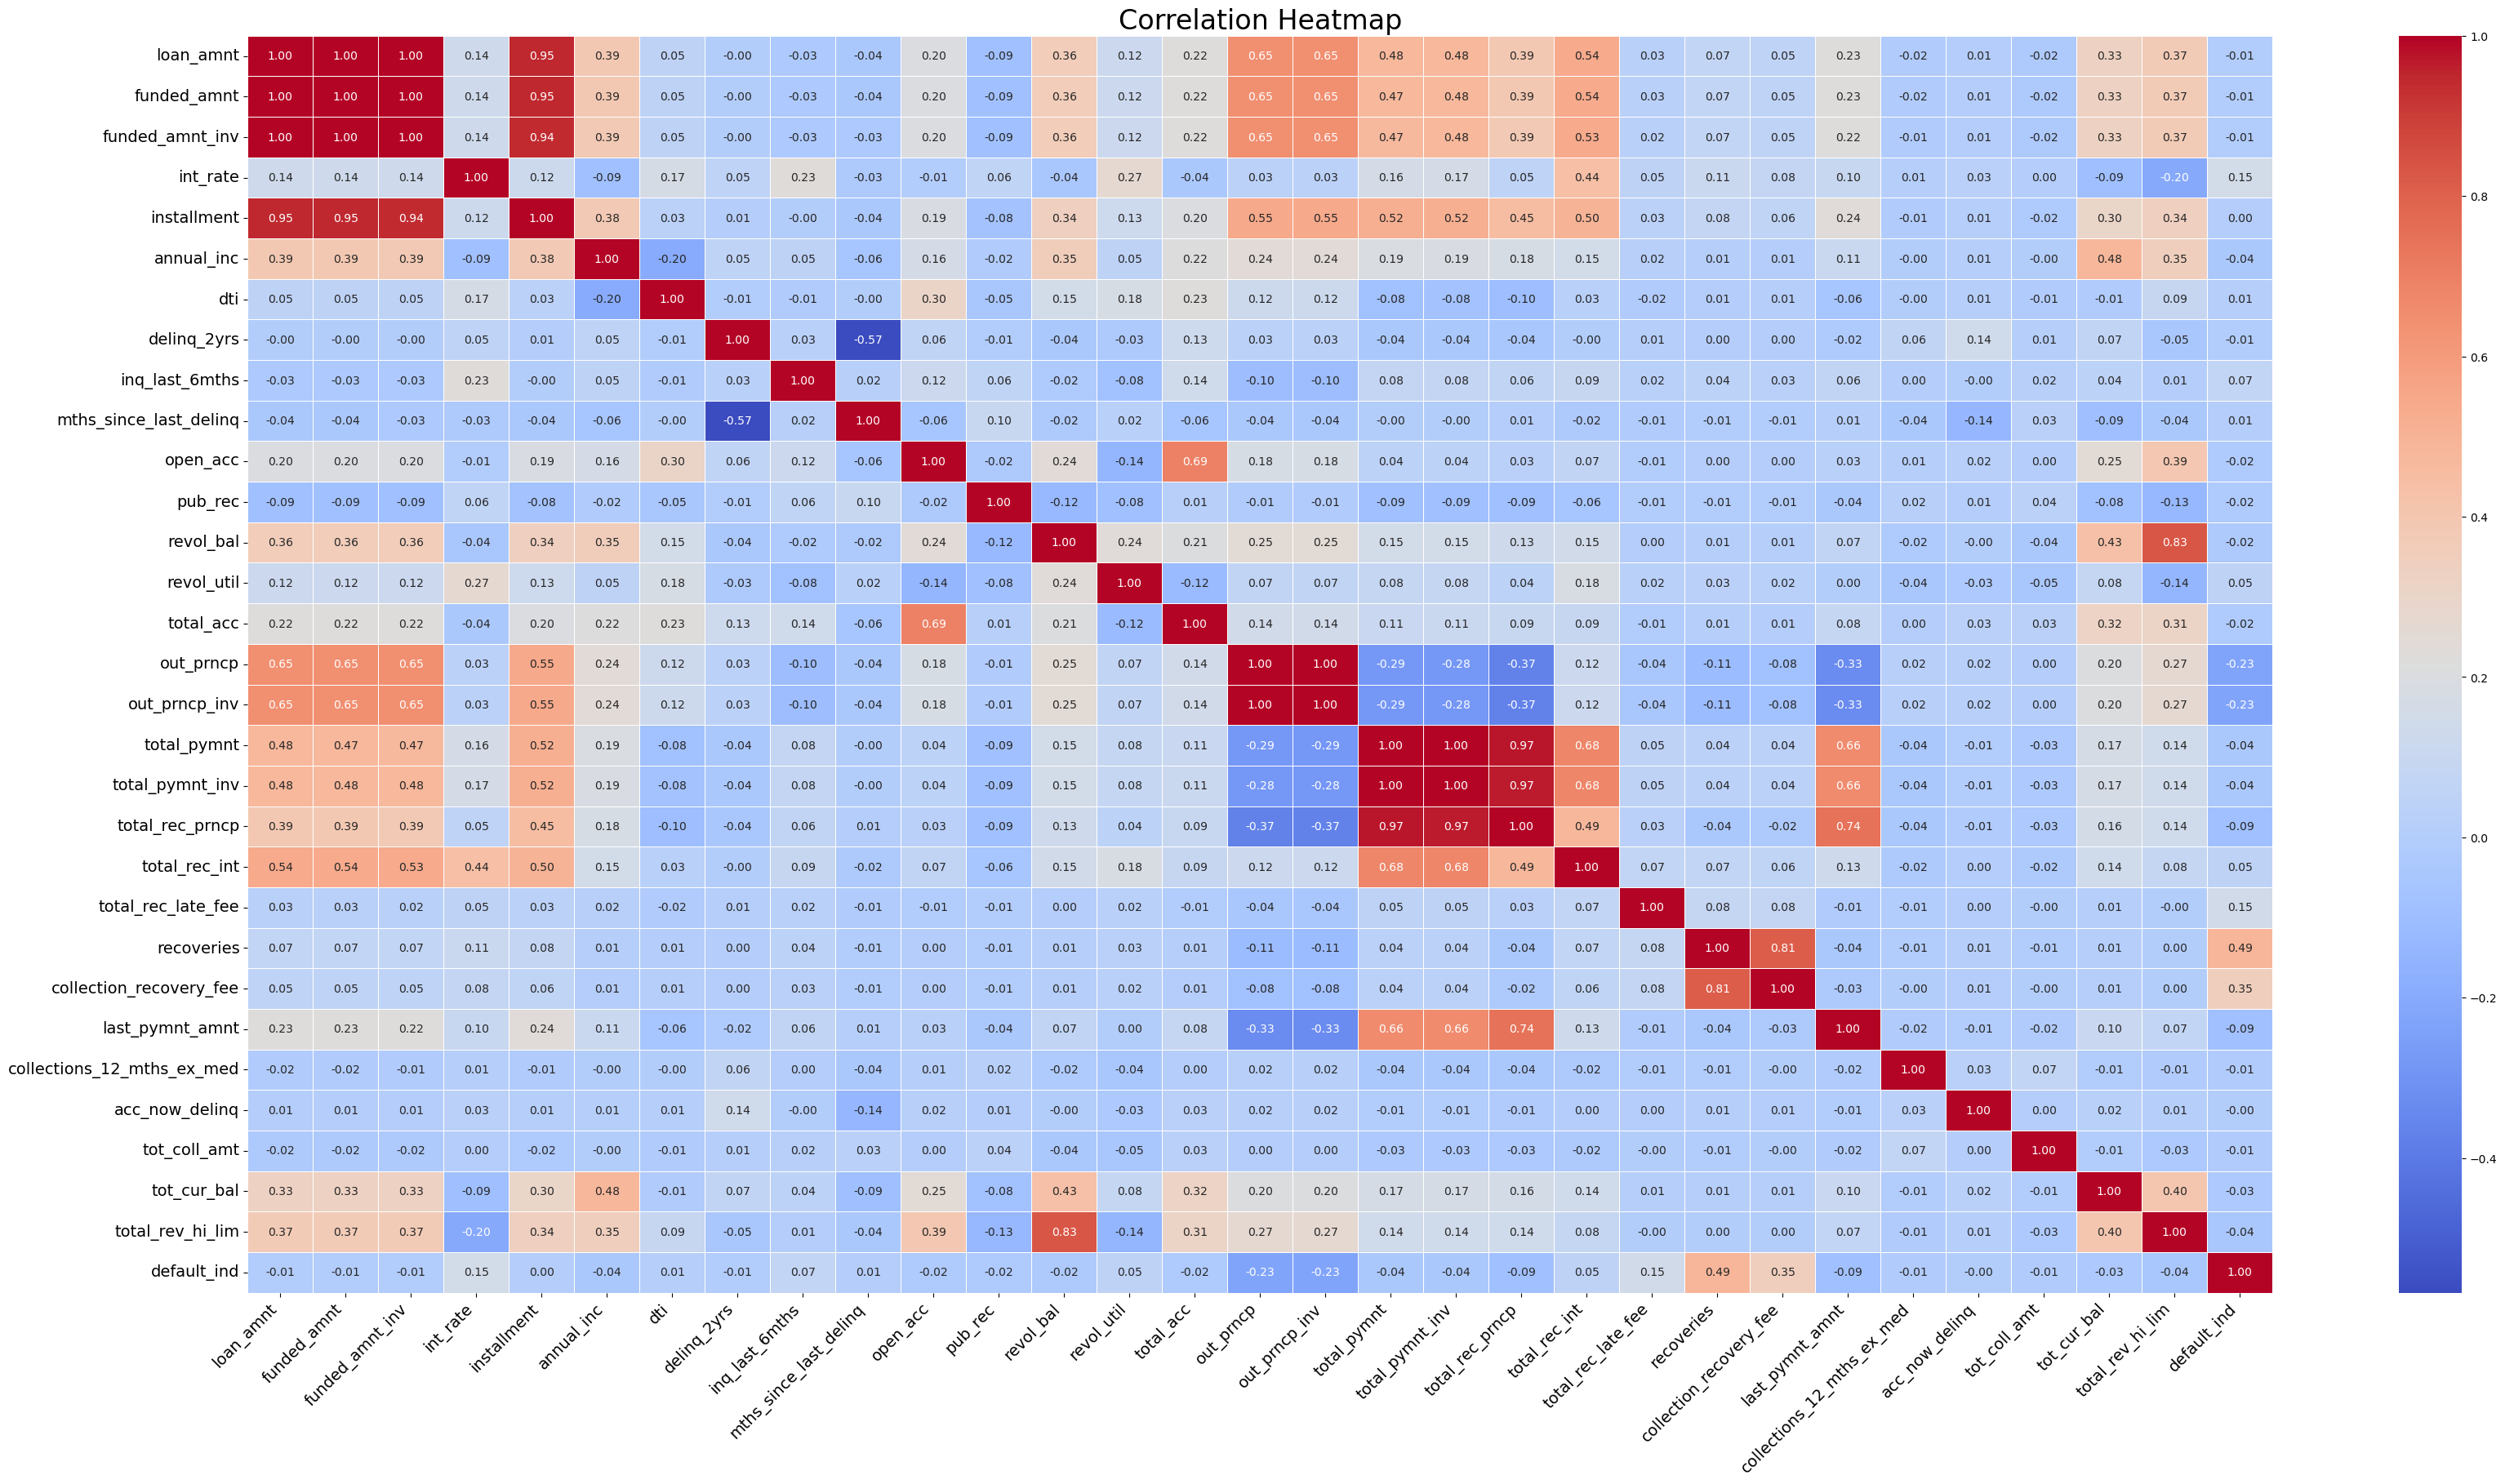

In [20]:
# Drop 'id' and 'member_id' from the correlation matrix calculation
df2_no_ids = df2.drop(columns=['id', 'member_id'])

# Correlation heatmap for numerical features
print("\nCorrelation Heatmap:")
plt.figure(figsize=(40, 20))
correlation_matrix = df2_no_ids.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap', fontsize=24)
plt.xticks(fontsize=14, rotation=45, ha='right')
plt.yticks(fontsize=14)
plt.show()

#The correlation heatmap plays a critical role in our feature selection as it indicates which columns have strong correlations.

loan amount, founded amount and funded_amount_inv have a correlation equal to one, so loan_amount was kept, and funded_amnt and funded_amnt_inv to be deleted to reduce the dimensions of our data

out_prncp and out_prncp_inv have a correlation of one, so out_prncp_inv was deleted for the same reason.

total_pymnt, total_pymnt_inv and total_rec_prncp have a correlation equal to one, so total_pymnt_inv and total_rec_prncp were deleted.

In [21]:
# Identify features with high correlation
correlation_threshold = 0.95
high_corr_var = np.where(np.abs(correlation_matrix) > correlation_threshold)
high_corr_var = [(correlation_matrix.columns[x], correlation_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]

# Create a set to hold the features to be dropped
features_to_drop = set()

# Loop through the highly correlated pairs and add one of each pair to the drop set
for x, y in high_corr_var:
    features_to_drop.add(y)

# Drop the identified highly correlated features from df2 to create df3
df3 = df2_no_ids.drop(columns=list(features_to_drop))

# Print the list of excluded columns
print("Excluded columns due to high correlation:")
print(list(features_to_drop))

# Display the remaining columns in df3
print("Remaining columns after dropping highly correlated features:")
print(df3.columns)

Excluded columns due to high correlation:
['total_pymnt_inv', 'out_prncp_inv', 'total_rec_prncp', 'funded_amnt_inv', 'funded_amnt']
Remaining columns after dropping highly correlated features:
Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'total_pymnt', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'default_ind'],
      dtype='object')



Correlation Heatmap for df3:


/var/folders/vg/tpjx1nws7cz7gpw5xfhk_l2r0000gn/T/ipykernel_1056/177402504.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_df3 = df3.corr()


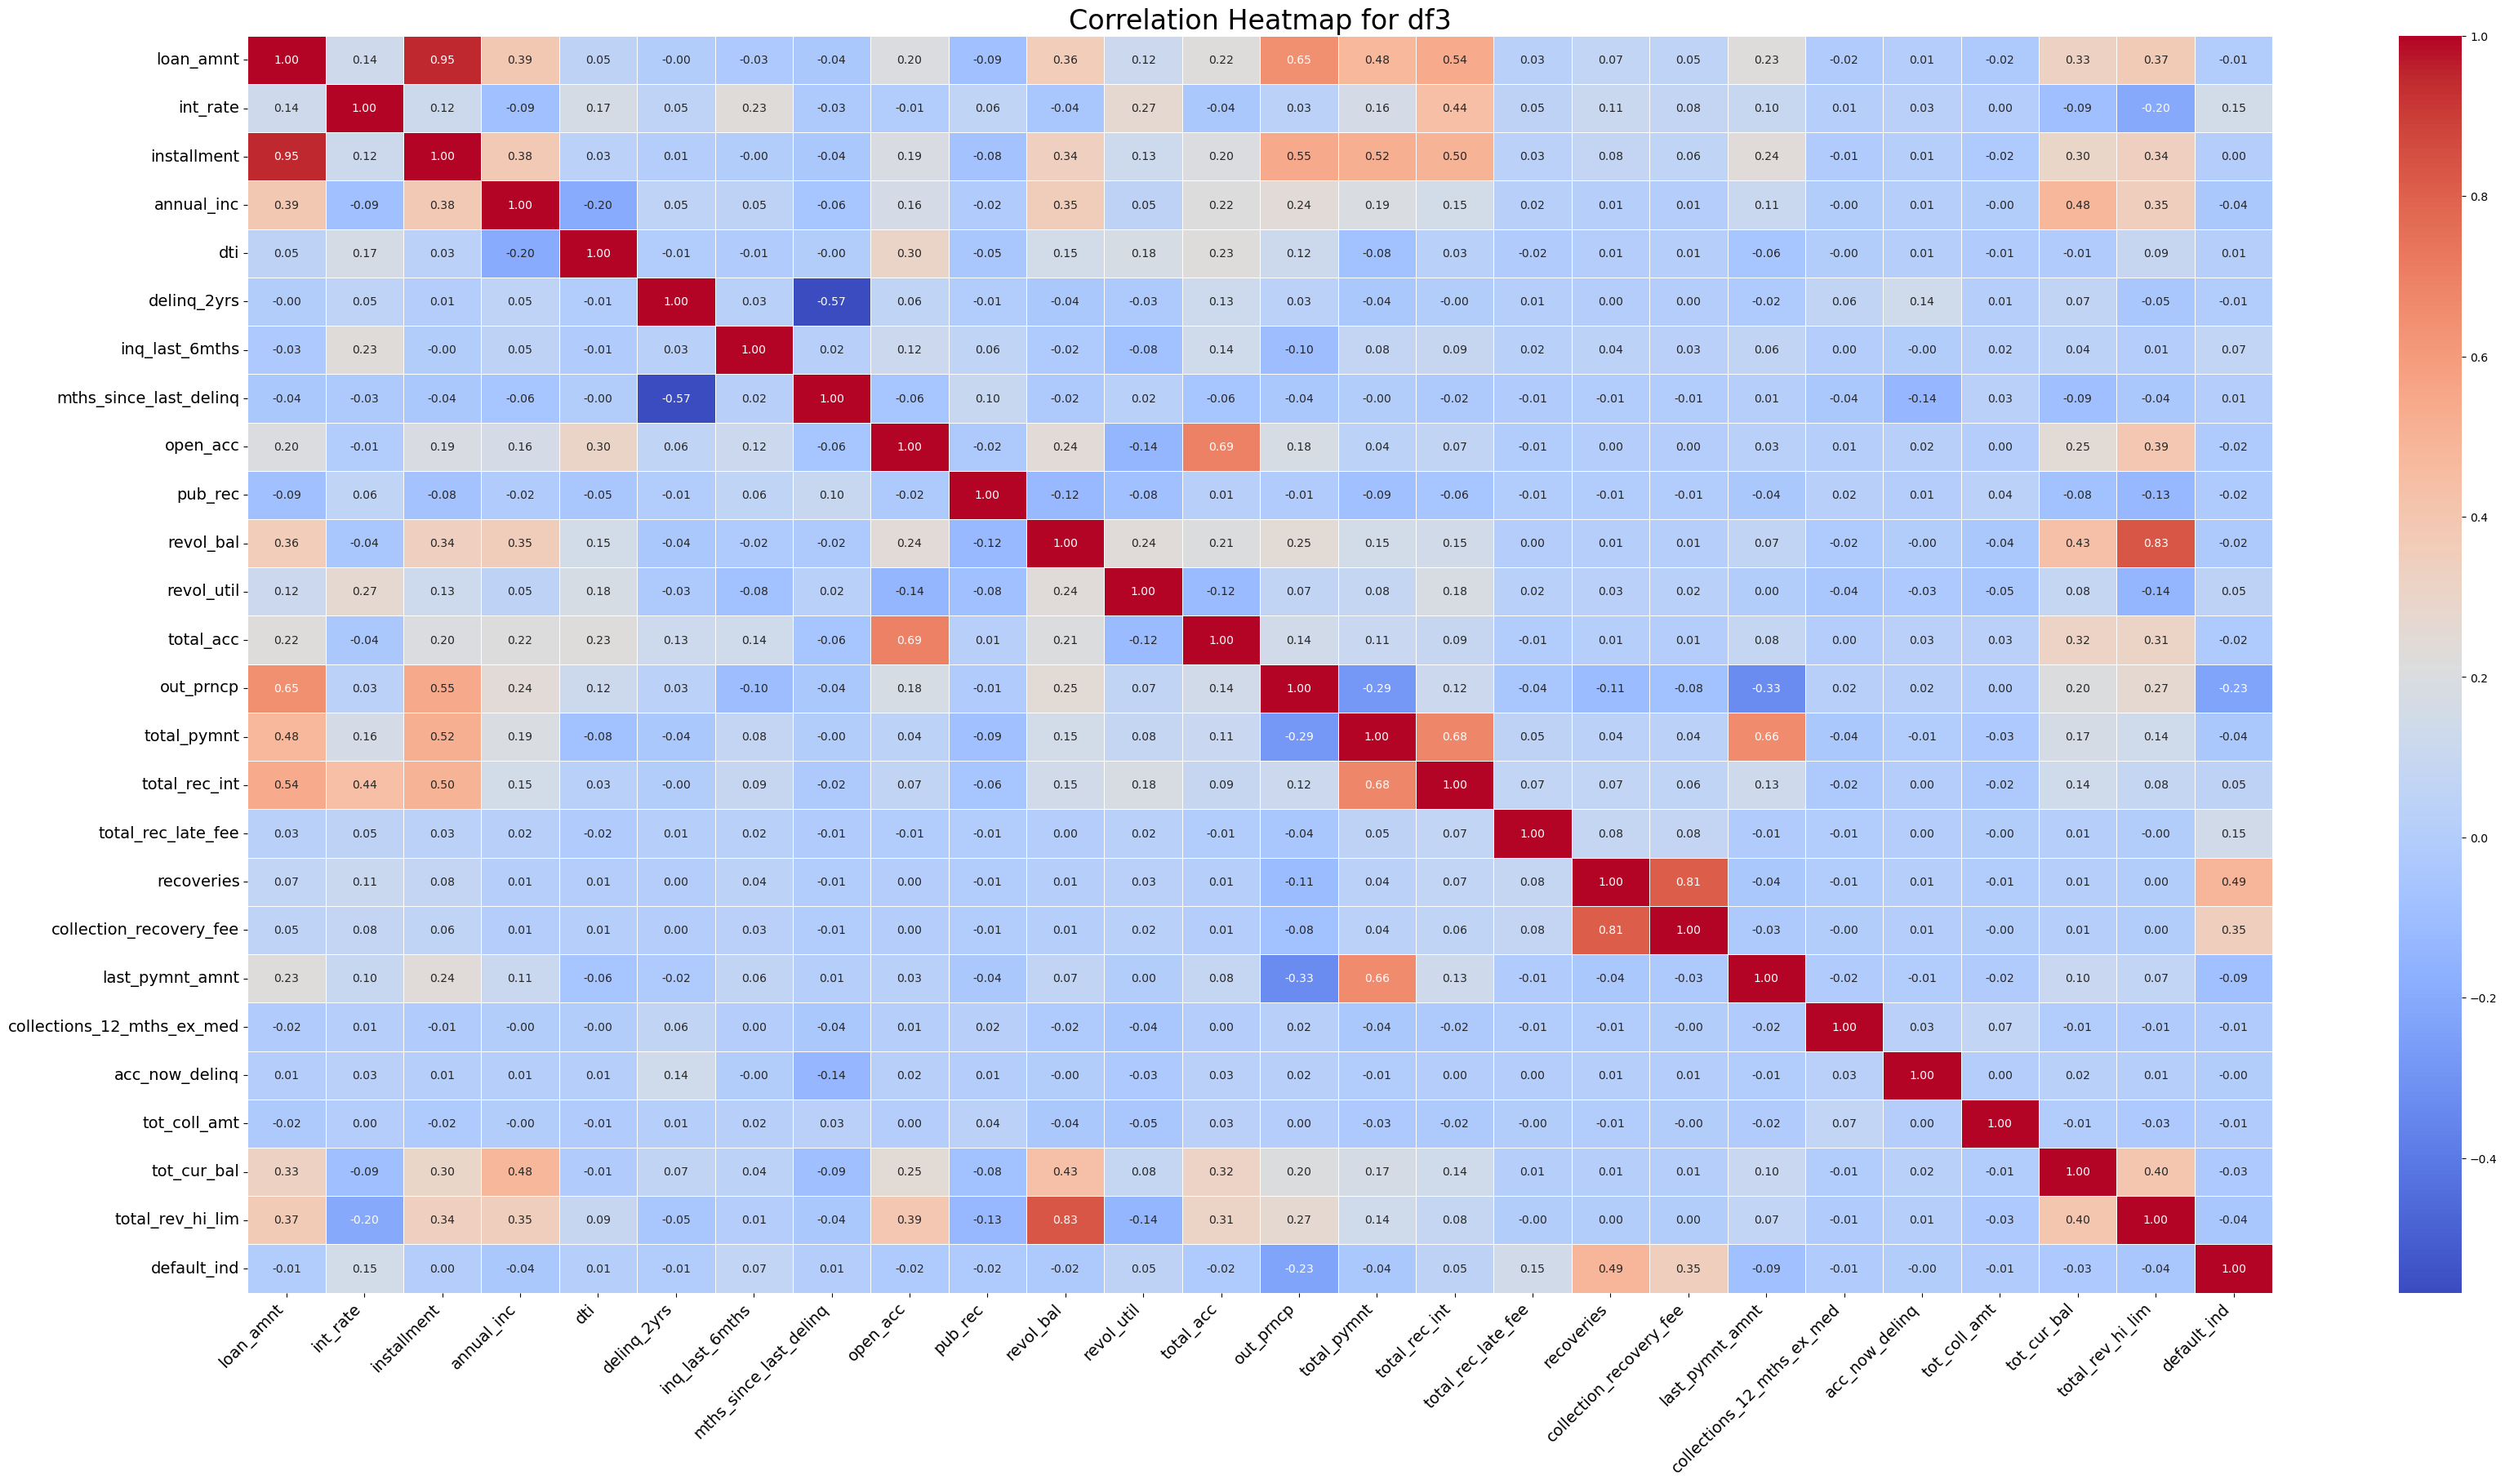

In [22]:
# Correlation heatmap for numerical features in df3
print("\nCorrelation Heatmap for df3:")
plt.figure(figsize=(40, 20))
correlation_matrix_df3 = df3.corr()
sns.heatmap(correlation_matrix_df3, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for df3', fontsize=24)
plt.xticks(fontsize=14, rotation=45, ha='right')
plt.yticks(fontsize=14)
plt.show()

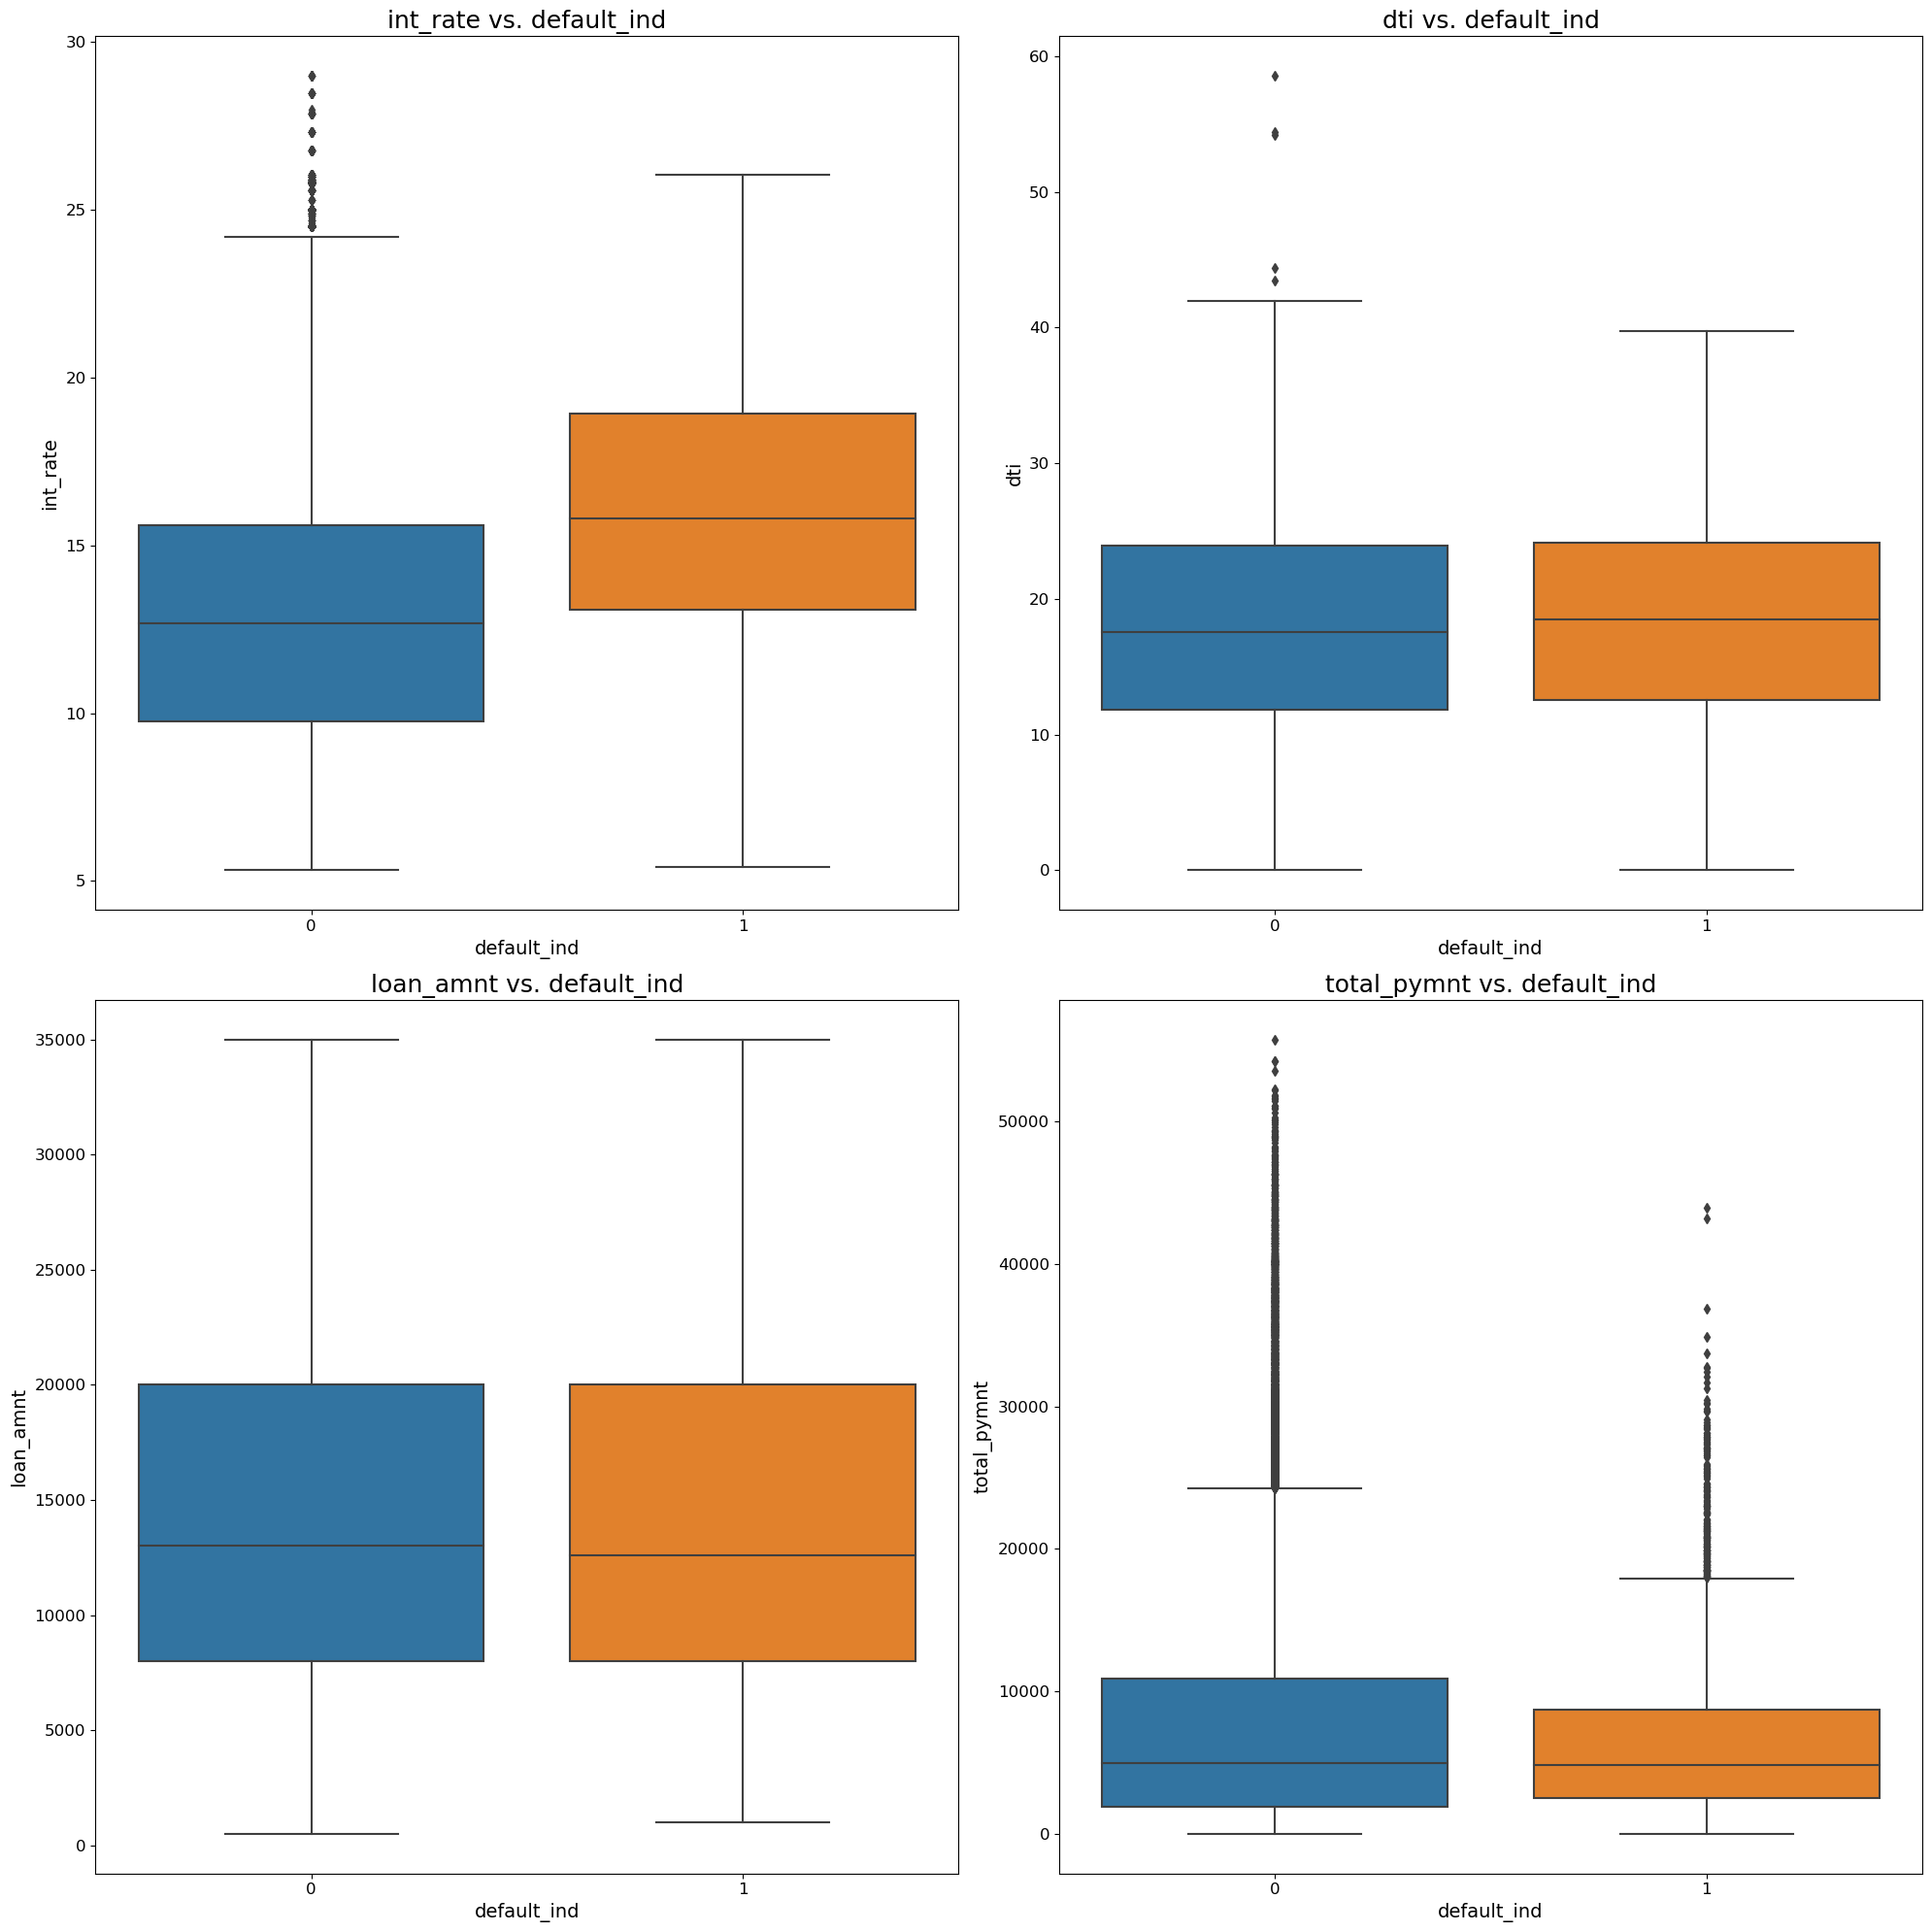

In [23]:
# List of selected numerical features for the boxplots
selected_numerical_features = ['int_rate', 'dti', 'loan_amnt','total_pymnt']

# Target variable
target_variable = 'default_ind'

# Number of rows and columns for the subplot
n_features = len(selected_numerical_features)
n_cols = 2
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Flatten axes array if it is 2D
if n_rows > 1:
    axes = axes.flatten()
else:
    axes = np.array([axes]).flatten()

# Create boxplots for selected numerical features vs. target variable
if target_variable in df3.columns:
    for idx, feature in enumerate(selected_numerical_features):
        sns.boxplot(x=df3[target_variable], y=df3[feature], ax=axes[idx])
        axes[idx].set_title(f'{feature} vs. {target_variable}', fontsize=18)
        axes[idx].set_xlabel(target_variable, fontsize=14)
        axes[idx].set_ylabel(feature, fontsize=14)
        axes[idx].tick_params(axis='both', which='major', labelsize=12)

# Hide any remaining empty subplots
for idx in range(n_features, n_rows * n_cols):
    if idx >= n_features:
        fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

#### Int_rate vs default_ind:
The median interest rate for defaulted loans is higher than that for non-defaulted loans, suggesting that borrowers with higher interest rates are more likely to default. 
Considering the significant difference, the interest rate could be of high interest when predicting default.

#### dti vs default_ind:
The difference between the levels of the boxplot accross default and non-default is slight, indicating that debt-to-income ratio of the borrower (dti) may not be a significant predictor for default detection, contrary to what is expected.

#### loan_amnt vs default_ind:
The difference between the levels of the boxplot accross default and non-default is slight, indicating that loan amount may not be a significant predictor for default detection.

#### total_pymnt vs default_ind:
The spread (IQR) is wider for the non-default group, suggesting that the payments made by non-defaulters vary more than those made by defaulters. The difference in central tendency and spread suggests that total_pymnt could be a useful feature for predicting defaults.

# EDA of Selected Categorical Features

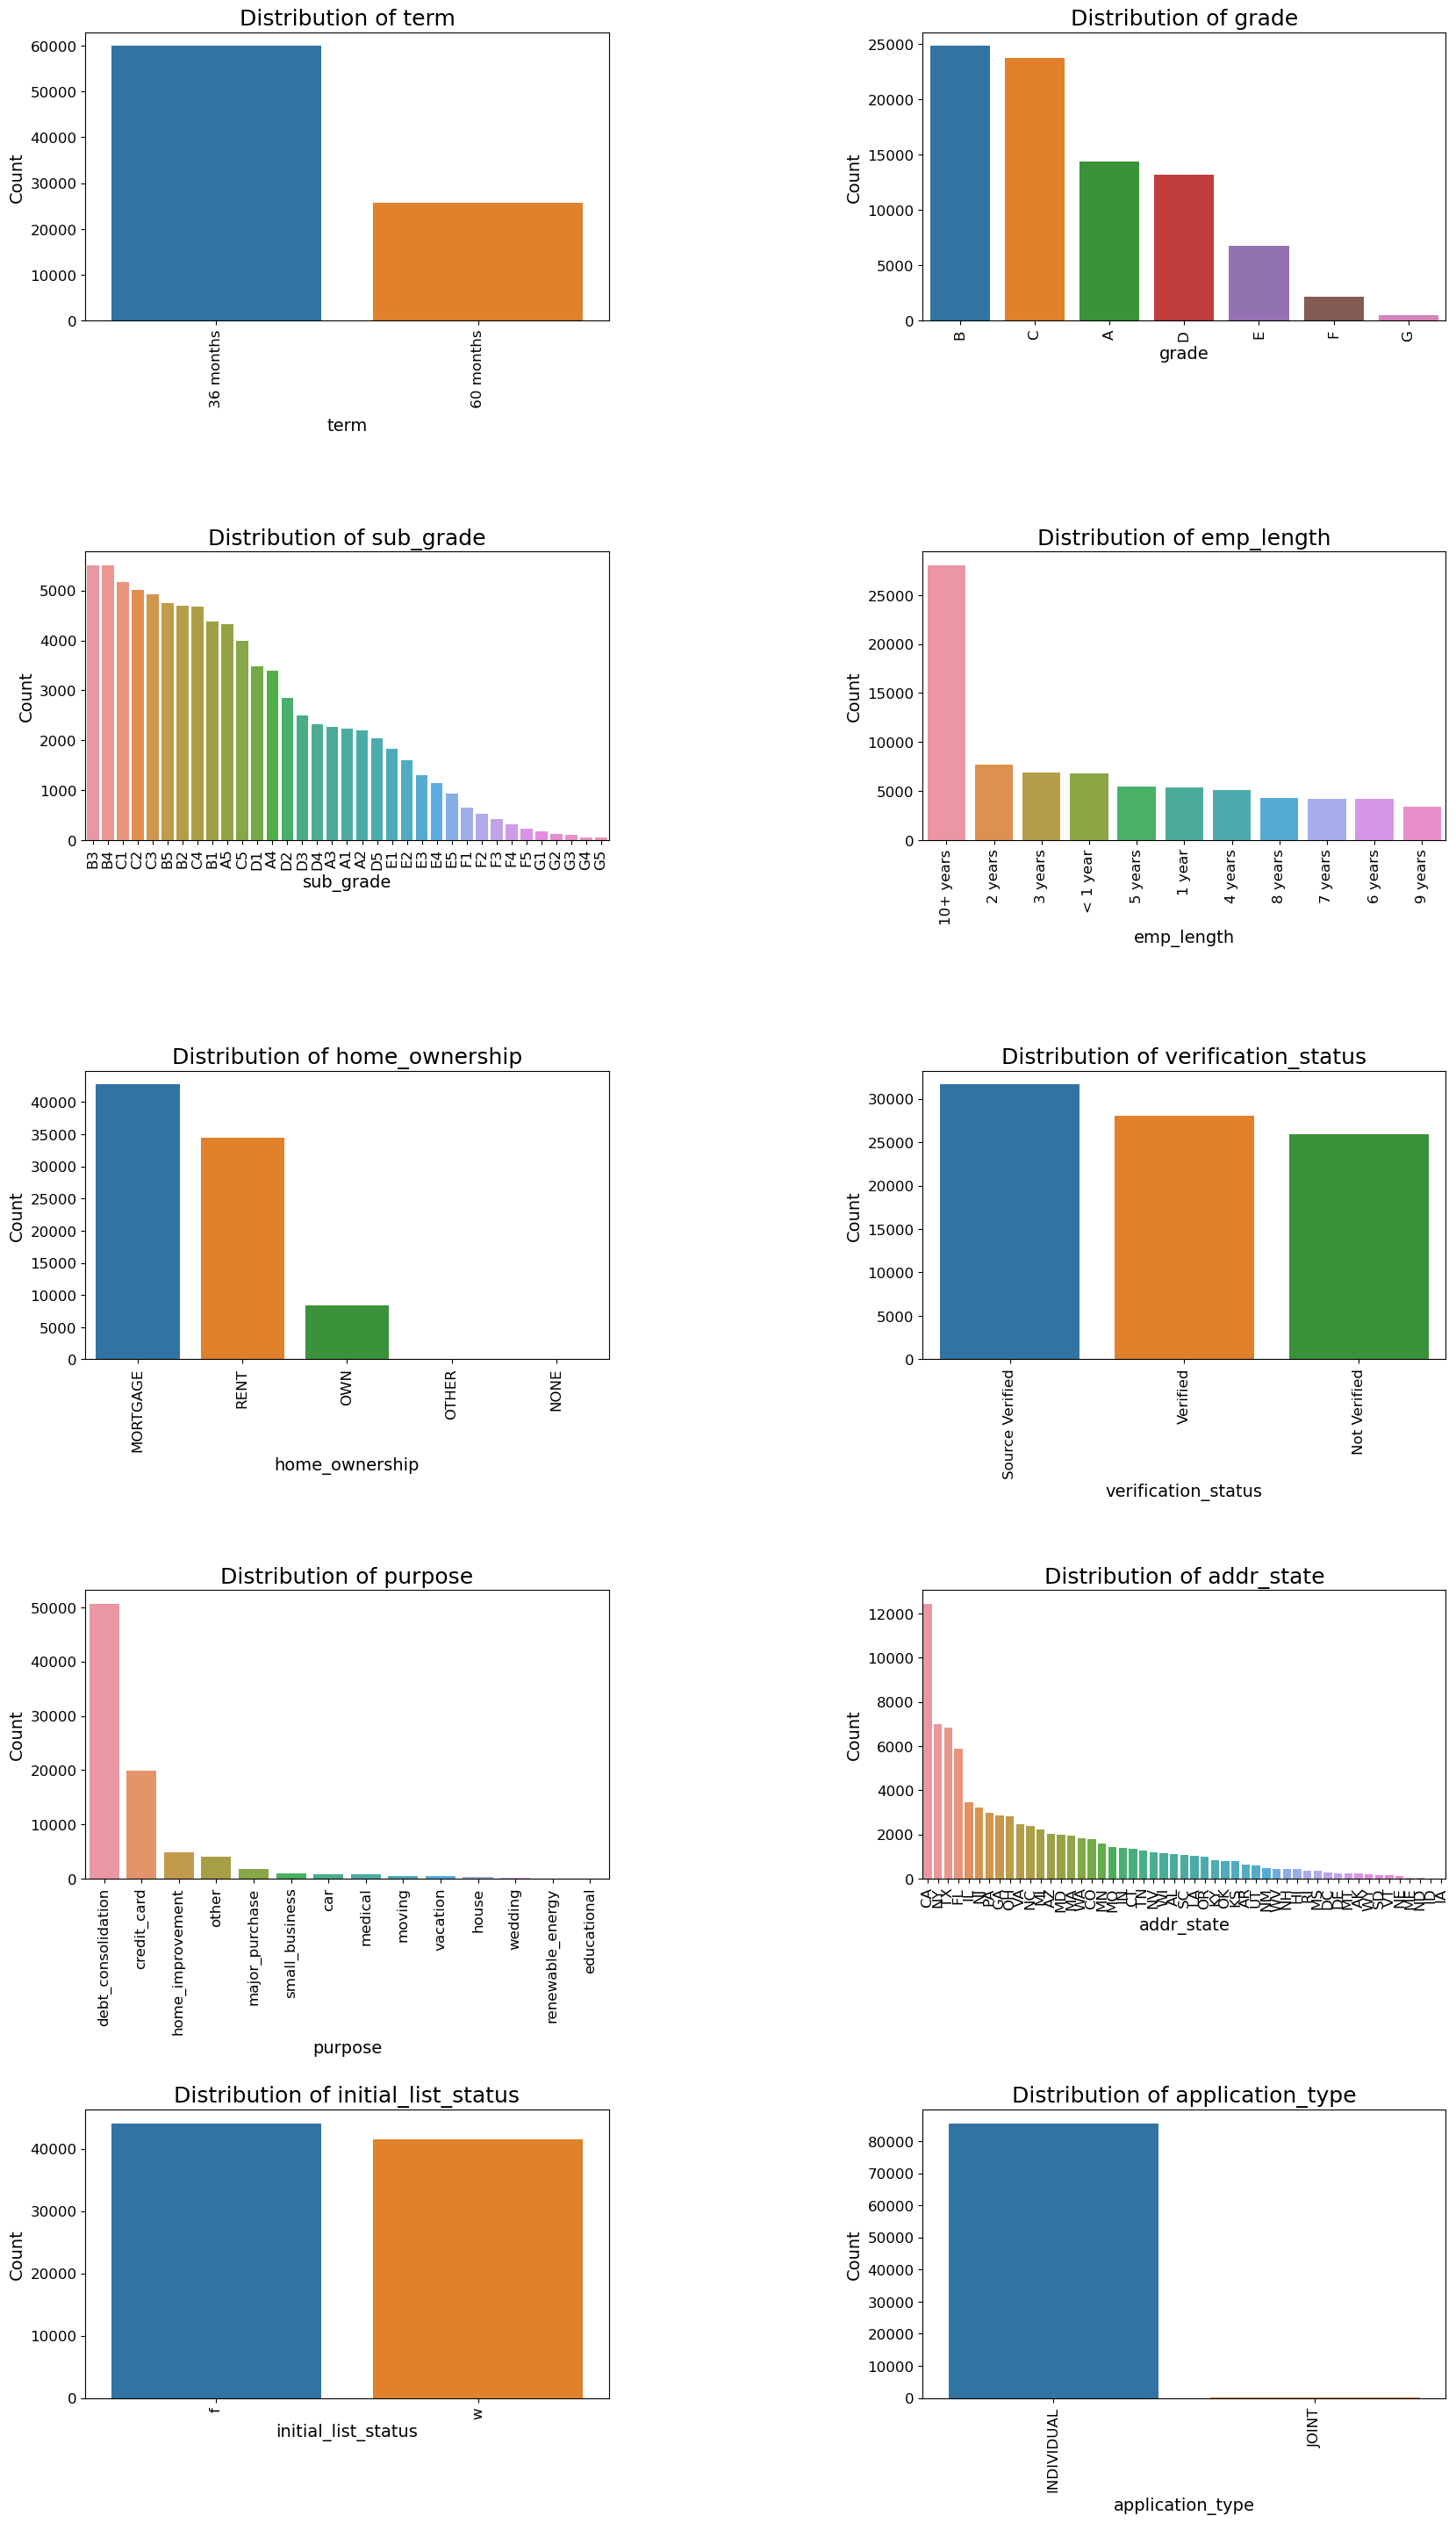

In [24]:
# Function to sanitize text
def sanitize_text(text):
    return text.replace('$', '').replace('{', '').replace('}', '').replace('^', '').replace('#', '')

# List of features to exclude
exclude_features = ['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line', 'zip_code', 'emp_title', 'title']

# Distribution of categorical features excluding specified features
categorical_features = df2.select_dtypes(include=['object', 'category']).columns
categorical_features = [feature for feature in categorical_features if feature not in exclude_features]

# Sanitize the categorical features
for feature in categorical_features:
    df2[feature] = df2[feature].apply(lambda x: sanitize_text(x) if isinstance(x, str) else x)

# Determine the number of rows needed based on the number of categorical features
n_features = len(categorical_features)
n_cols = 2
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 7))
fig.subplots_adjust(hspace=0.8, wspace=0.6)

for idx, feature in enumerate(categorical_features):
    row = idx // n_cols
    col = idx % n_cols
    ax = axes[row, col]
    sns.countplot(data=df2, x=feature, order=df2[feature].value_counts().index, ax=ax)
    ax.set_title(f'Distribution of {feature}', fontsize=18)
    ax.set_xlabel(feature, fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

# If the number of features is odd, remove the last empty subplot
if n_features % n_cols != 0:
    fig.delaxes(axes[-1, -1])

plt.show()

#### Distribution of term:
36 months loan term are way more than 60 months term loans. Shorter loan terms may be more attractive to borrowers, or lenders might prefer them due to lower default risk.

#### Distribution of Grade:
A majority of loans being in grades B and C suggests that most borrowers have moderate creditworthiness.

#### Distribution of emp_length:
Longer employment lengths are associated with higher loan approval, which could imply that job stability is a significant factor in lending decisions.

#### Distribution of home_ownership:
High portion of the loans are taken for the purpose of buying a residental property.

#### Distribution of verification_status:
The similar counts of verified and source-verified loans suggest a robust process for income verification, which could be enhancing loan portfolio quality.

#### Distribution of purpose:

* Debt consolidation: Combining multiple debts to achieve a lower interest rate
* Debt consolidation is the primary reason for loans, indicating a common borrower need to manage or reduce existing debt.

#### Distribution of initial list status:

* f: listed in advance for potential investors to review and fund.
* w: This could imply that the loan was listed as a whole loan, available for a single investor to fund entirely

#### Distribution of application type:
Almost all instances are of individual application_type, indicating that this variable is not useful for predicting default, and to be further droped.

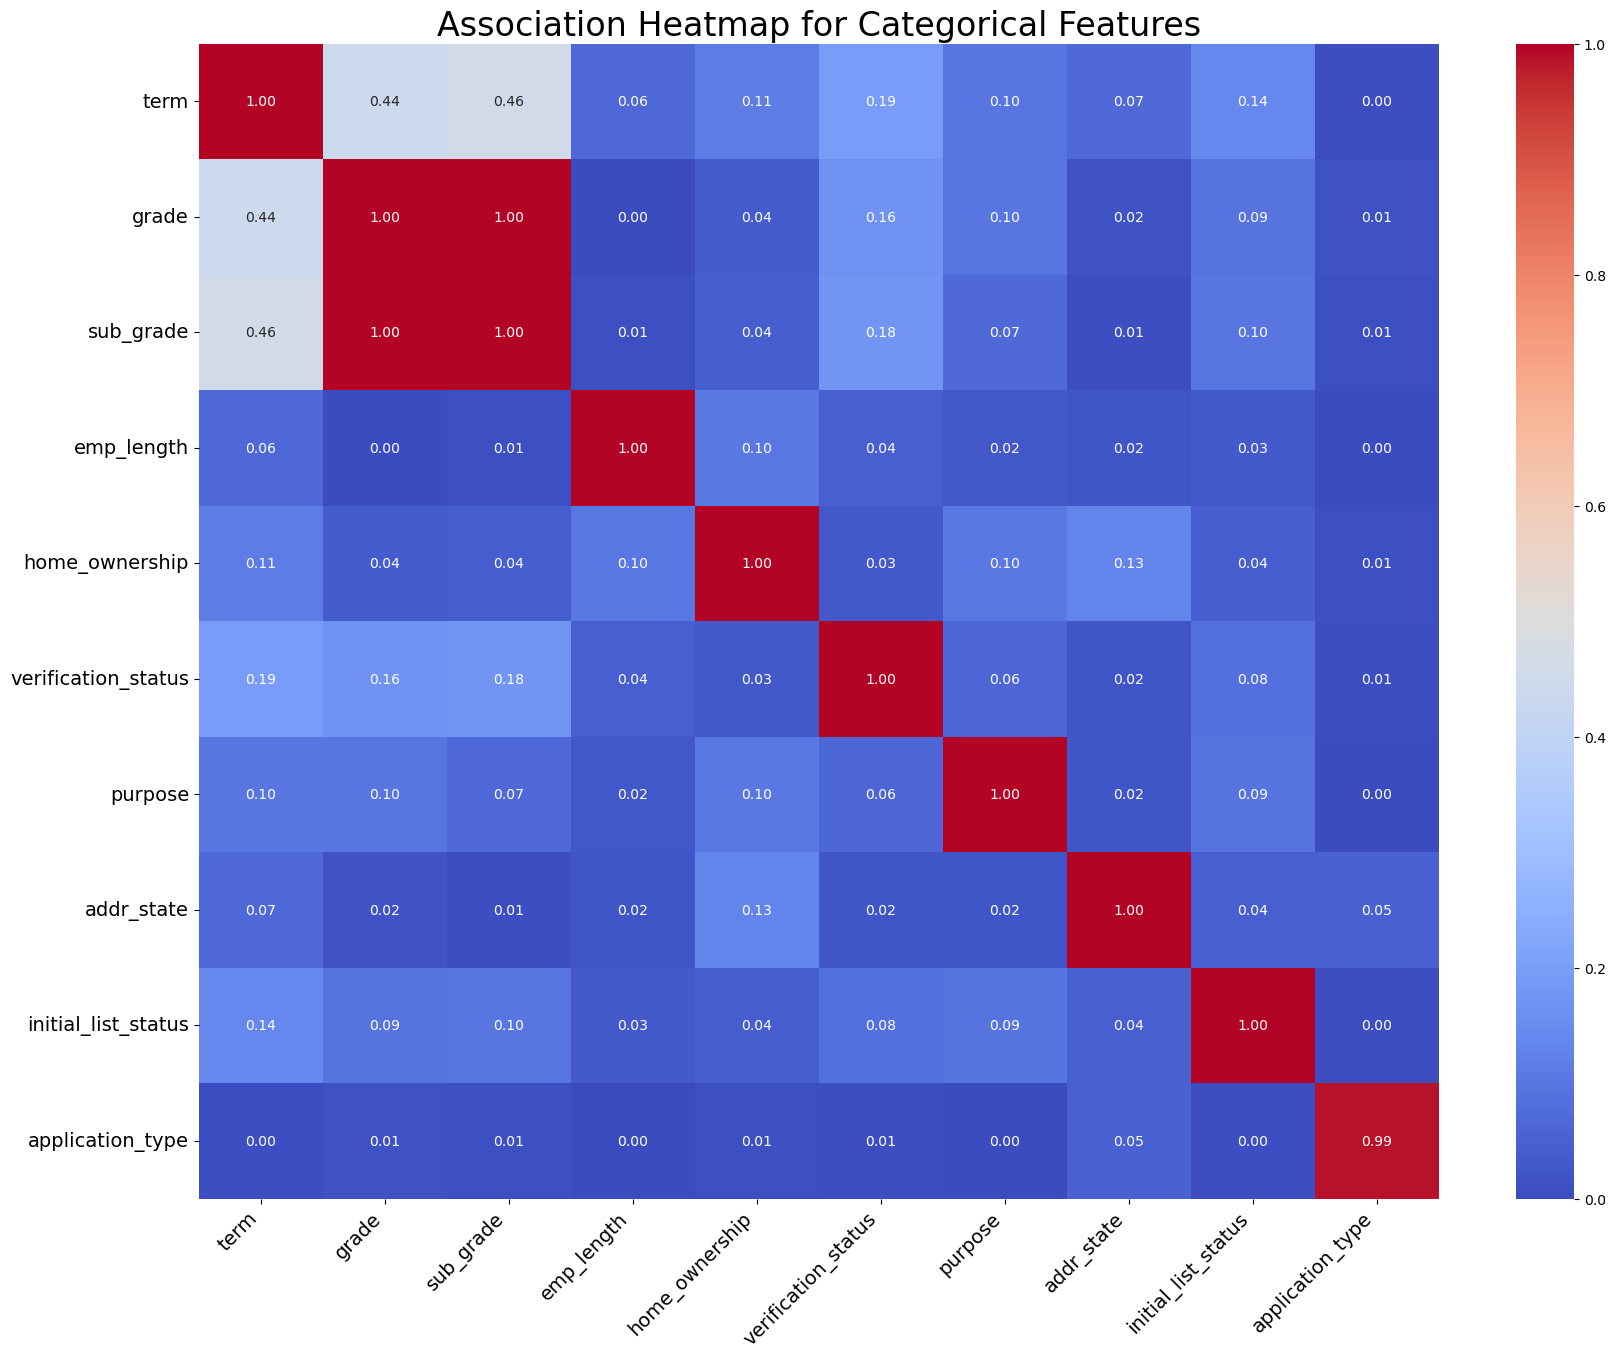

In [25]:
# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# List of categorical features to include in the association matrix
categorical_features = df3.select_dtypes(include=['object', 'category']).columns
excluded_features = ['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'zip_code', 'emp_title', 'title']
categorical_features = [feature for feature in categorical_features if feature not in excluded_features]

# Create an empty dataframe for the association matrix
association_matrix = pd.DataFrame(index=categorical_features, columns=categorical_features)

# Calculate Cramér's V for each pair of categorical features
for col1 in categorical_features:
    for col2 in categorical_features:
        association_matrix.loc[col1, col2] = cramers_v(df3[col1], df3[col2])

# Convert the association matrix to numeric values
association_matrix = association_matrix.astype(float)

# Plot the association heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(association_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Association Heatmap for Categorical Features', fontsize=24)
plt.xticks(fontsize=14, rotation=45, ha='right')
plt.yticks(fontsize=14)
plt.show()


As grade and sub_grade are perfectly correlated, sub_grade column will be removed.

In [26]:
# Identify columns to drop based on high association (above 0.95)
to_drop = set()
for col1 in association_matrix.columns:
    for col2 in association_matrix.columns:
        if col1 != col2 and association_matrix.loc[col1, col2] > 0.95:
            if col2 not in to_drop and col1 not in to_drop:
                to_drop.add(col2)  # Add only one column from each pair

# Create df4 by dropping highly associated categorical features
df4 = df3.drop(columns=list(to_drop))

# Display the columns that were dropped
print("Columns dropped due to high association (>0.99):")
print(list(to_drop))

# Display the remaining columns in df4
print("Remaining columns in df4:")
print(df4.columns)

Columns dropped due to high association (>0.99):
['sub_grade']
Remaining columns in df4:
Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'total_pymnt', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'default_ind'],
      dtype='object')


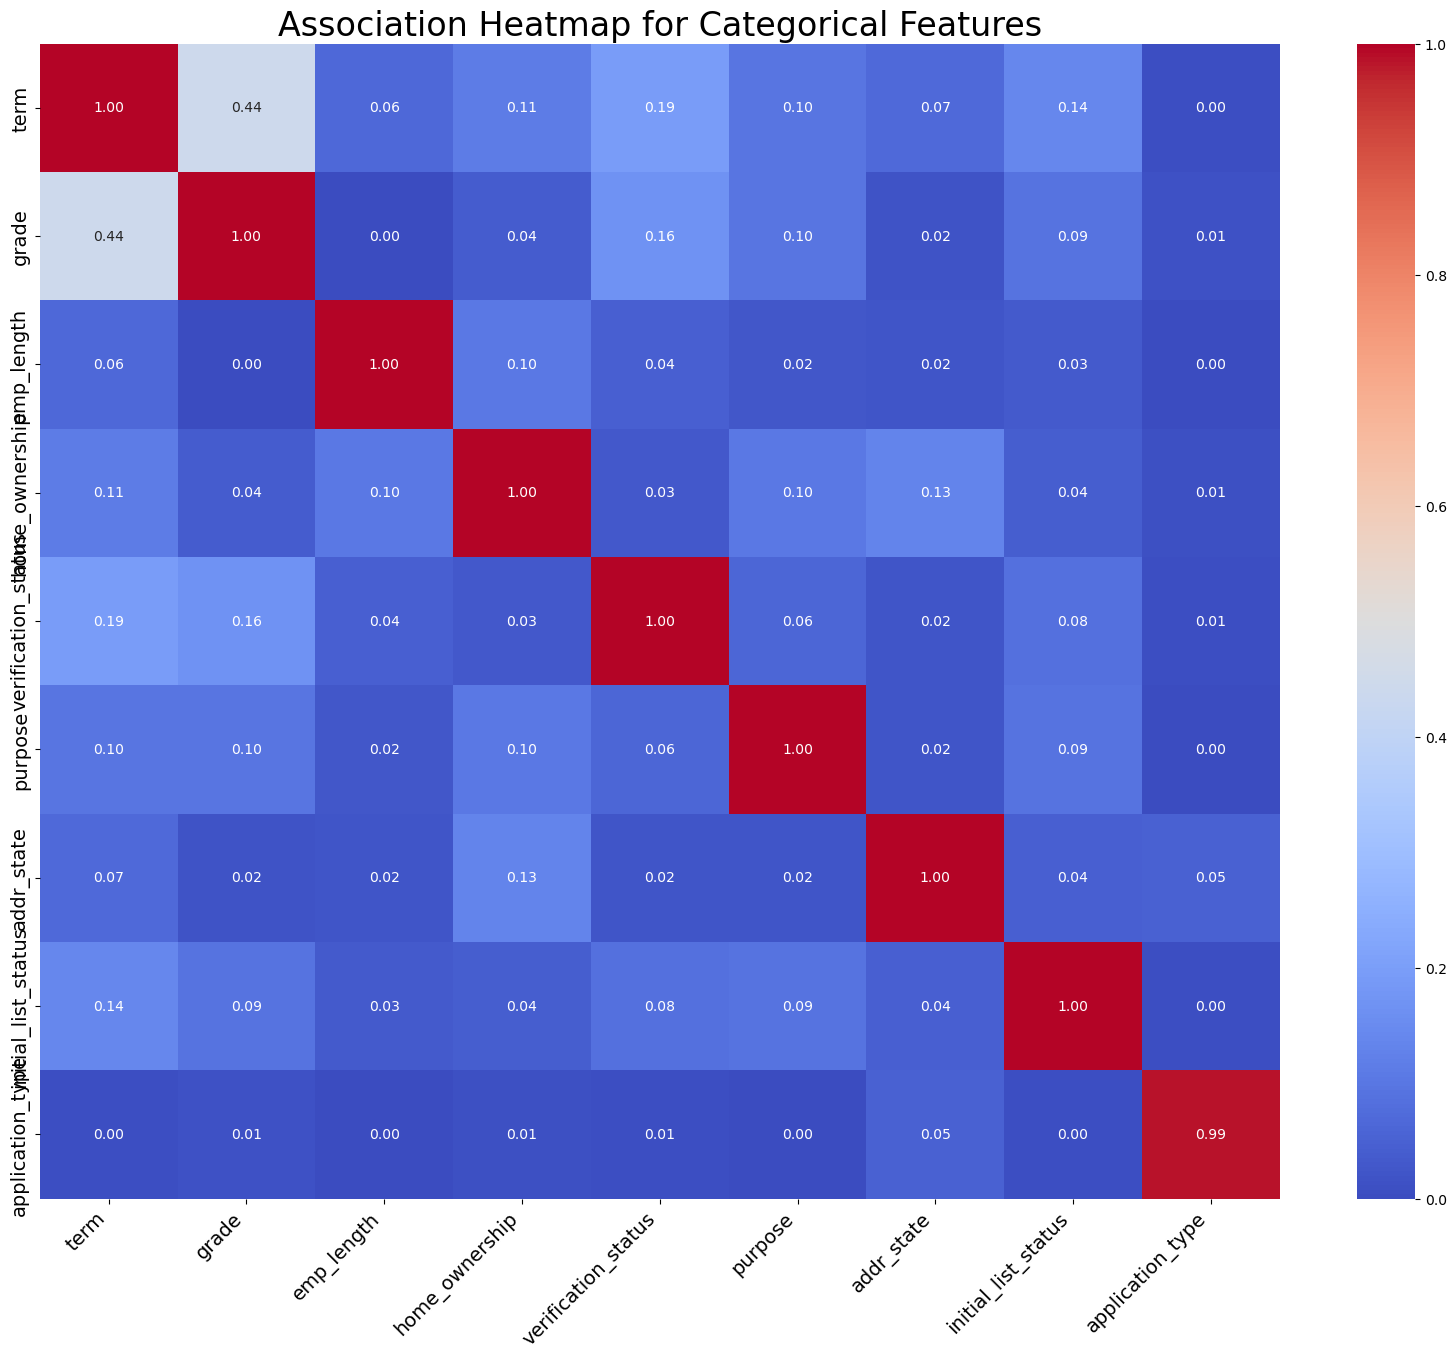

In [27]:
# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# List of categorical features to include in the association matrix
categorical_features = df4.select_dtypes(include=['object', 'category']).columns
excluded_features = ['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'zip_code', 'emp_title', 'title']
categorical_features = [feature for feature in categorical_features if feature not in excluded_features]

# Create an empty dataframe for the association matrix
association_matrix = pd.DataFrame(index=categorical_features, columns=categorical_features)

# Calculate Cramér's V for each pair of categorical features
for col1 in categorical_features:
    for col2 in categorical_features:
        association_matrix.loc[col1, col2] = cramers_v(df4[col1], df4[col2])

# Convert the association matrix to numeric values
association_matrix = association_matrix.astype(float)

# Plot the association heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(association_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Association Heatmap for Categorical Features', fontsize=24)
plt.xticks(fontsize=14, rotation=45, ha='right')
plt.yticks(fontsize=14)
plt.show()


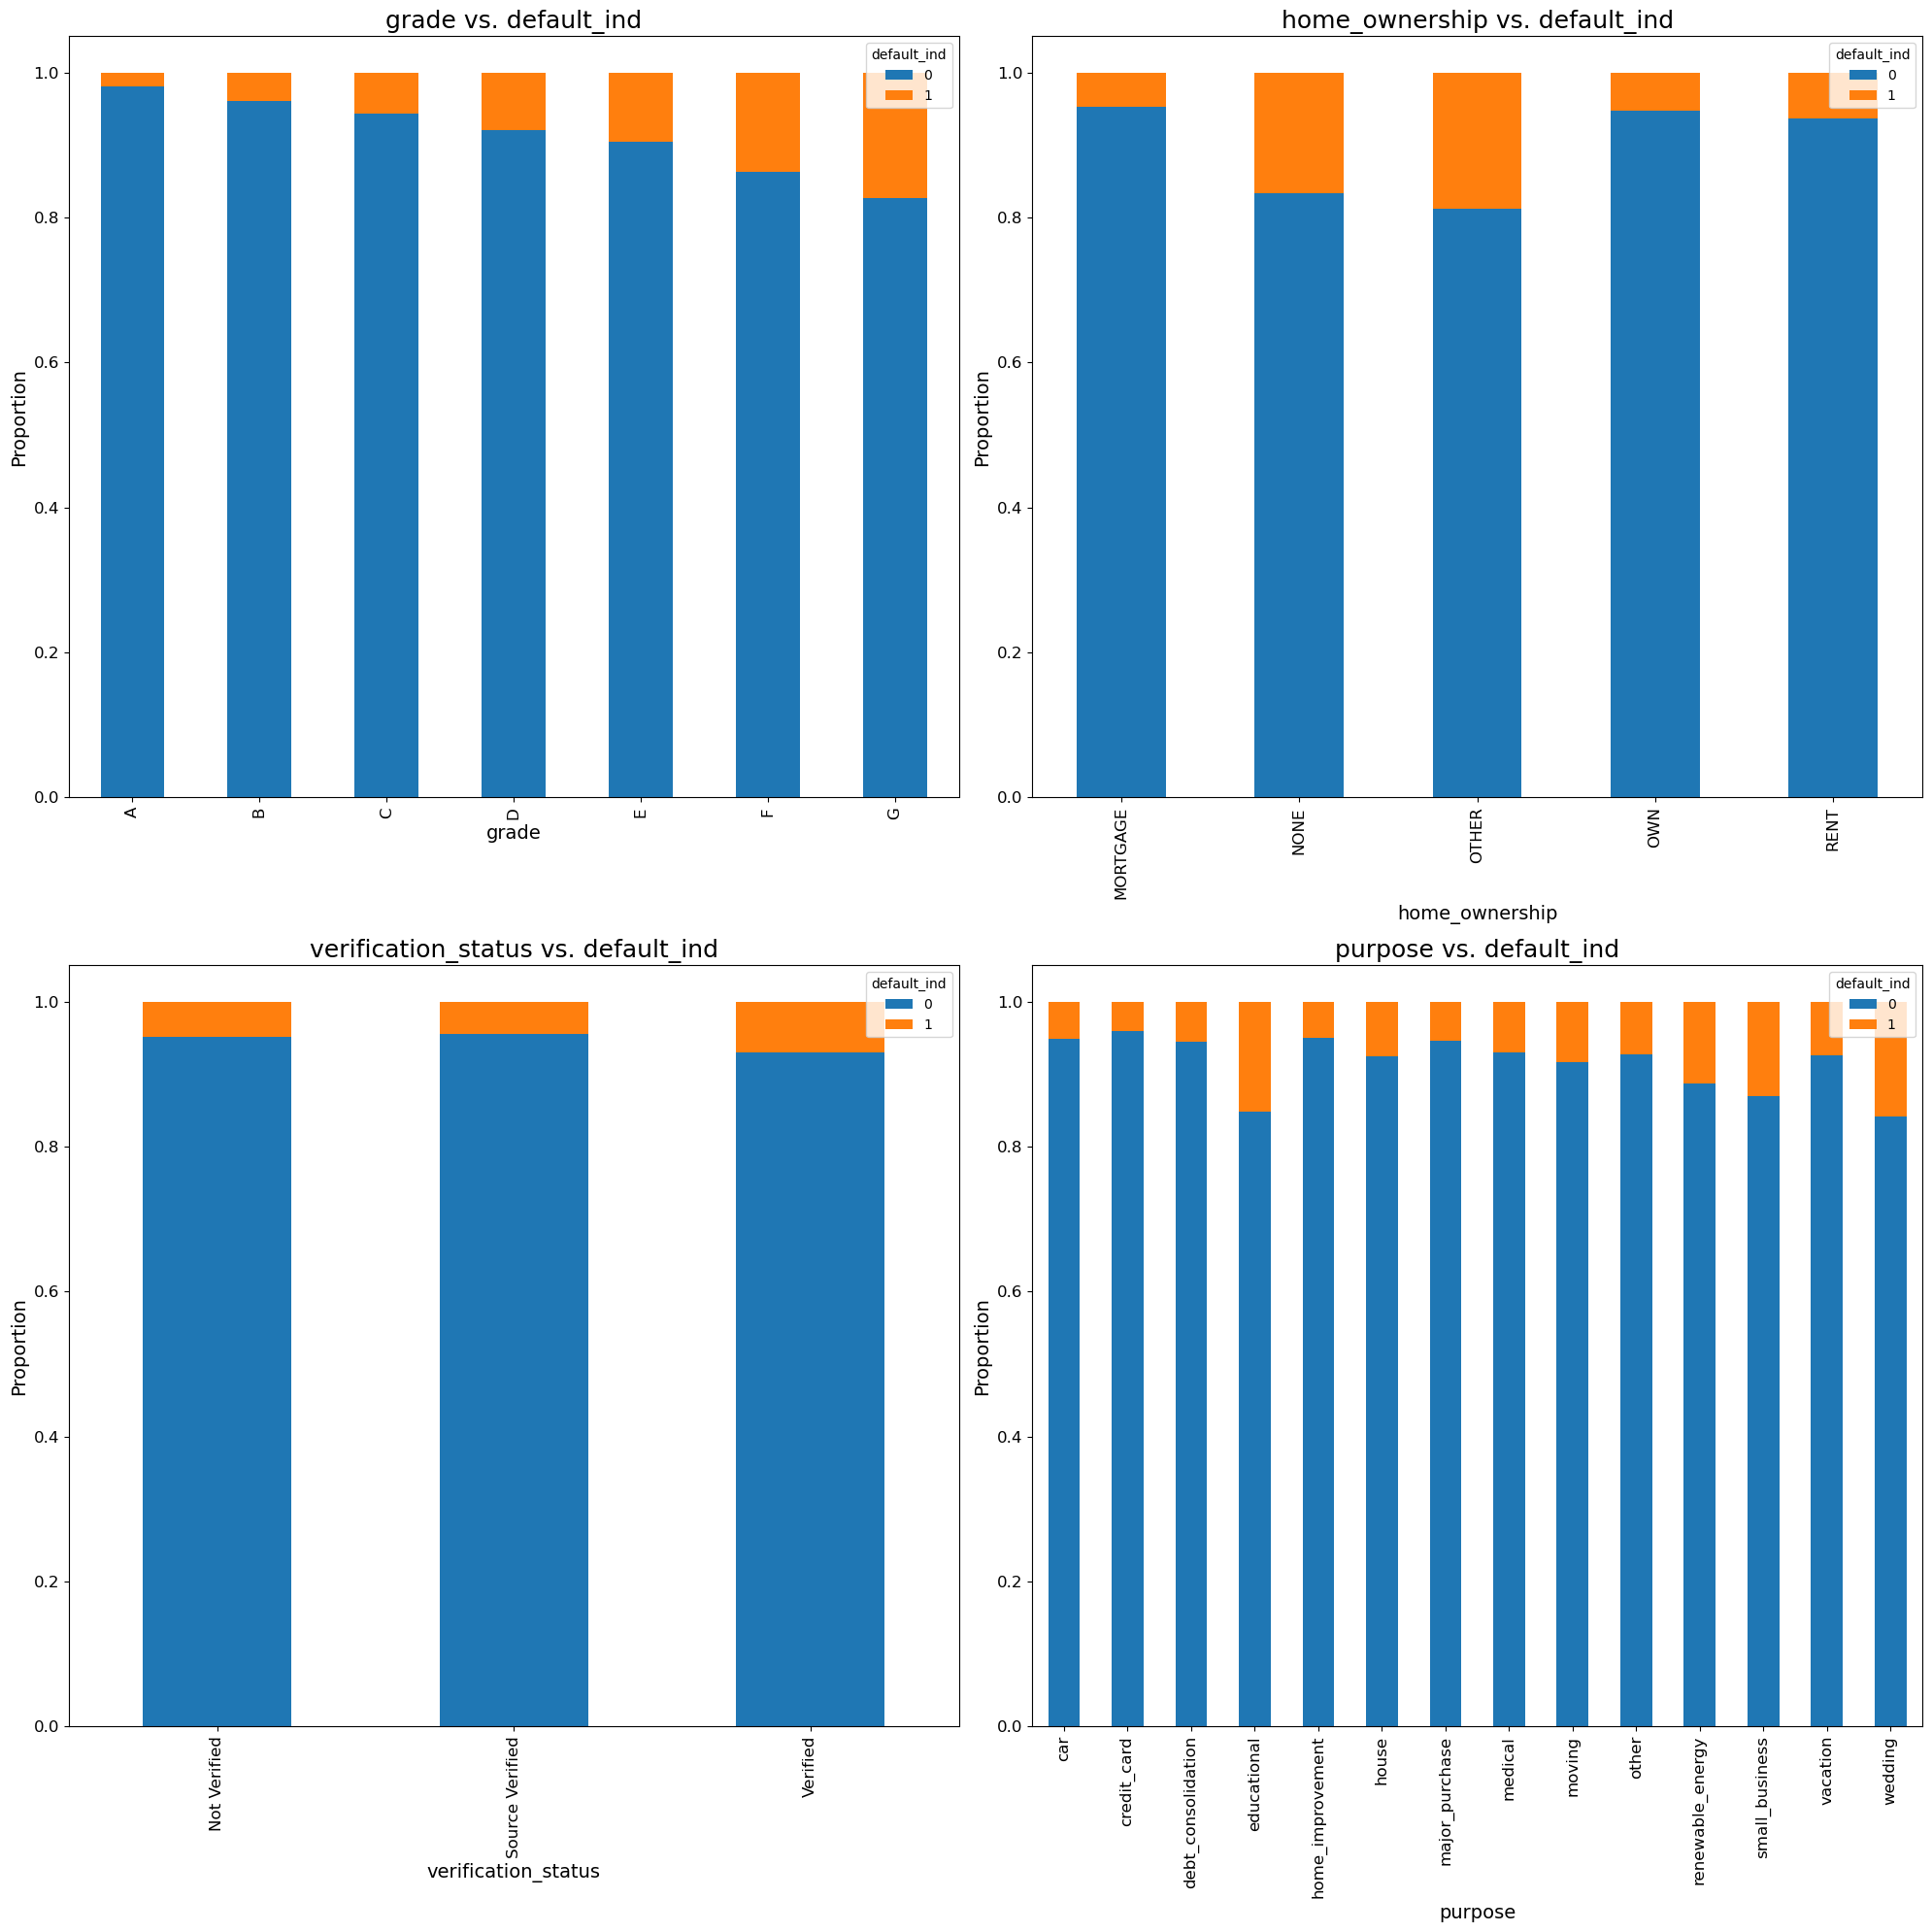

In [28]:
# List of selected categorical features for the stacked bar charts
selected_categorical_features = ['grade', 'home_ownership', 'verification_status', 'purpose']

# Target variable
target_variable = 'default_ind'

# Number of rows and columns for the subplot
n_features = len(selected_categorical_features)
n_cols = 2
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Flatten axes array if it is 2D
if n_rows > 1:
    axes = axes.flatten()
else:
    axes = np.array([axes]).flatten()

# Create stacked bar charts for selected categorical features vs. target variable
if target_variable in df4.columns:
    for idx, feature in enumerate(selected_categorical_features):
        # Calculate proportions
        prop_df = (df4.groupby([feature, target_variable]).size() / df4.groupby(feature).size()).unstack()
        prop_df.plot(kind='bar', stacked=True, ax=axes[idx], color=['#1f77b4', '#ff7f0e'])

        axes[idx].set_title(f'{feature} vs. {target_variable}', fontsize=18)
        axes[idx].set_xlabel(feature, fontsize=14)
        axes[idx].set_ylabel('Proportion', fontsize=14)
        axes[idx].tick_params(axis='both', which='major', labelsize=12)

# Hide any remaining empty subplots
for idx in range(n_features, n_rows * n_cols):
    if idx >= n_features:
        fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


#### Some Insights:

1. As the grade of a customer decreases the propability to default increases.   
2. loans for wedding and educational purposes has higher probabilty for being defaulted than other purposes.
3. home ownership cases (other or none) recorded higher default cases.

# EDA of Time Series Data

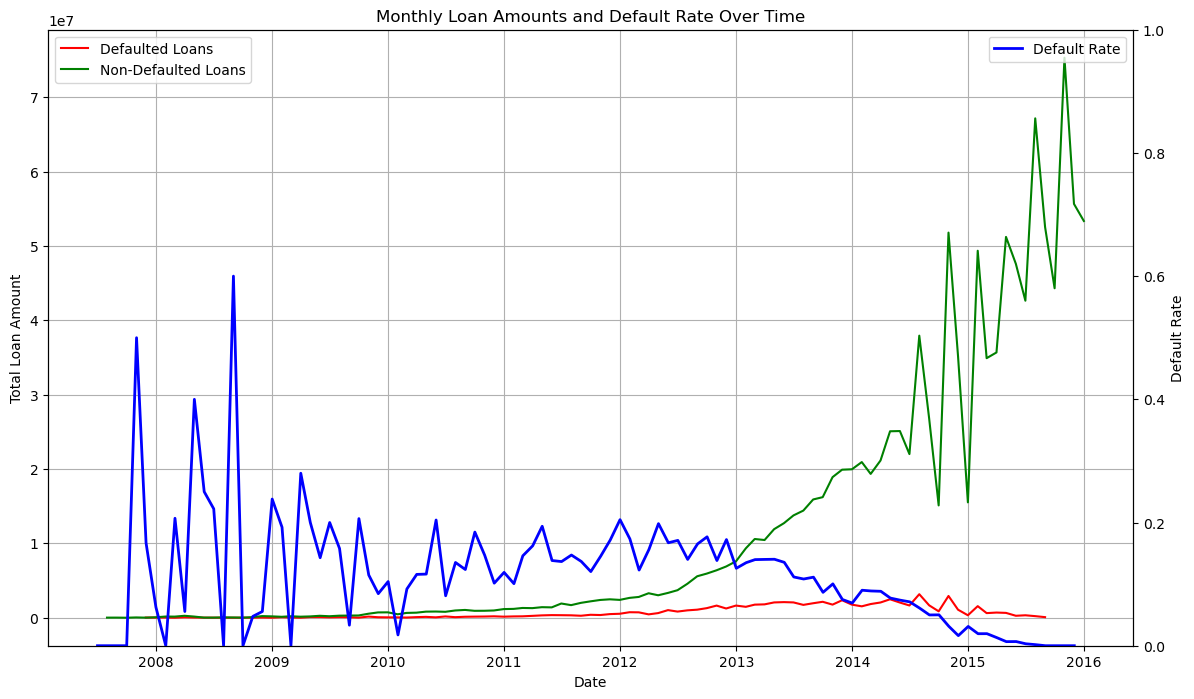

In [29]:
# Ensure issue_d is the index for resampling
df4_resampled = df4.set_index(pd.to_datetime(df4['issue_d']))

# Separate the data based on the target variable
df_defaulted = df4_resampled[df4_resampled['default_ind'] == 1]
df_non_defaulted = df4_resampled[df4_resampled['default_ind'] == 0]

# Aggregate loan amounts by month for defaulted and non-defaulted loans
monthly_loan_amnt_defaulted = df_defaulted['loan_amnt'].resample('M').sum()
monthly_loan_amnt_non_defaulted = df_non_defaulted['loan_amnt'].resample('M').sum()

# Calculate the default rate by month
df4_resampled['issue_year_month'] = df4_resampled.index.to_period('M')
default_rate_by_month = df4_resampled.groupby('issue_year_month')['default_ind'].mean()

# Convert Period index to Datetime index for plotting
default_rate_by_month.index = default_rate_by_month.index.to_timestamp()

# Plot the aggregated loan amounts and default rate on one plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot loan amounts
ax1.plot(monthly_loan_amnt_defaulted, label='Defaulted Loans', color='red')
ax1.plot(monthly_loan_amnt_non_defaulted, label='Non-Defaulted Loans', color='green')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Loan Amount')
ax1.set_title('Monthly Loan Amounts and Default Rate Over Time')
ax1.legend(loc='upper left')

# Create a second y-axis for the default rate
ax2 = ax1.twinx()
ax2.plot(default_rate_by_month, label='Default Rate', color='blue', linestyle='-', linewidth=2)
ax2.set_ylabel('Default Rate')
ax2.set_ylim(0, 1)  # Adjust the scale of the secondary y-axis if necessary
ax2.legend(loc='upper right')

# Add grid lines
ax1.grid(True)

plt.show()


For the period extending between 2008 and 2016,

the default loans show a consistent frequency with a slight increment between 2012 and 2014, followed by a slight decrease to the original level in 2015 and 2016.
With respect to the default rate, on the other hand, it experienced a considerable amount of fluctuation over the years, reaching a maximum of 60 % between 2008 and 2009. This is attributed mainly to the low number of non-defaulted loans, which increased exponentially beyond year 2012. With such increase, the default rate decreased to its minimum in 2016.

# Data Preprocessing in Preparation for Modeling

In [30]:
# List of columns to drop
columns_to_drop = ['emp_title', 'title', 'zip_code', 'earliest_cr_line', 'next_pymnt_d',
                  'issue_d','last_pymnt_d','last_credit_pull_d']

# Create df5 by dropping the specified columns
df5 = df4.drop(columns=columns_to_drop)

# Display the remaining columns in df5
print("Dropped columns from df4:")
print(columns_to_drop)
print("Remaining columns in df5:")
print(df5.columns)

Dropped columns from df4:
['emp_title', 'title', 'zip_code', 'earliest_cr_line', 'next_pymnt_d', 'issue_d', 'last_pymnt_d', 'last_credit_pull_d']
Remaining columns in df5:
Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'total_pymnt', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'default_ind'],
      dtype='object')


In [31]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85597 entries, 0 to 85596
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   loan_amnt                   85597 non-null  int32   
 1   term                        85597 non-null  category
 2   int_rate                    85597 non-null  float32 
 3   installment                 85597 non-null  float32 
 4   grade                       85597 non-null  category
 5   emp_length                  81283 non-null  category
 6   home_ownership              85597 non-null  category
 7   annual_inc                  85597 non-null  float64 
 8   verification_status         85597 non-null  category
 9   purpose                     85597 non-null  category
 10  addr_state                  85597 non-null  category
 11  dti                         85597 non-null  float32 
 12  delinq_2yrs                 85597 non-null  int8    
 13  inq_last_6mths  

In [32]:
df5.shape

(85597, 35)

# Data Split

In [33]:
# Encode categorical variables
df5_encoded = df5.copy()

label_encoders = {}

for column in df5_encoded.select_dtypes(include=['category']).columns:
    label_encoders[column] = LabelEncoder()
    df5_encoded[column] = label_encoders[column].fit_transform(df5_encoded[column])

# Define features and target
X = df5_encoded.drop(columns=['default_ind'])
y = df5_encoded['default_ind']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)


# Handling Missing Values and Outliers

In [34]:
# Handle missing values after splitting
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Separate numerical and categorical columns
numerical_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 
                  'delinq_2yrs', 'inq_last_6mths','mths_since_last_delinq', 'open_acc', 
                  'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 
                  'total_pymnt', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 
                  'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 
                  'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

categorical_cols = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 
                    'purpose', 'addr_state', 'initial_list_status', 'application_type']

# Apply imputer to numerical columns
X_train[numerical_cols] = numerical_imputer.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = numerical_imputer.transform(X_test[numerical_cols])

# Apply imputer to categorical columns
X_train[categorical_cols] = categorical_imputer.fit_transform(X_train[categorical_cols])
X_test[categorical_cols] = categorical_imputer.transform(X_test[categorical_cols])

# Using Robust Scaler to handle outliers
scaler = RobustScaler()

# Apply the scaler to the numerical columns
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Modeling for Feature Importance

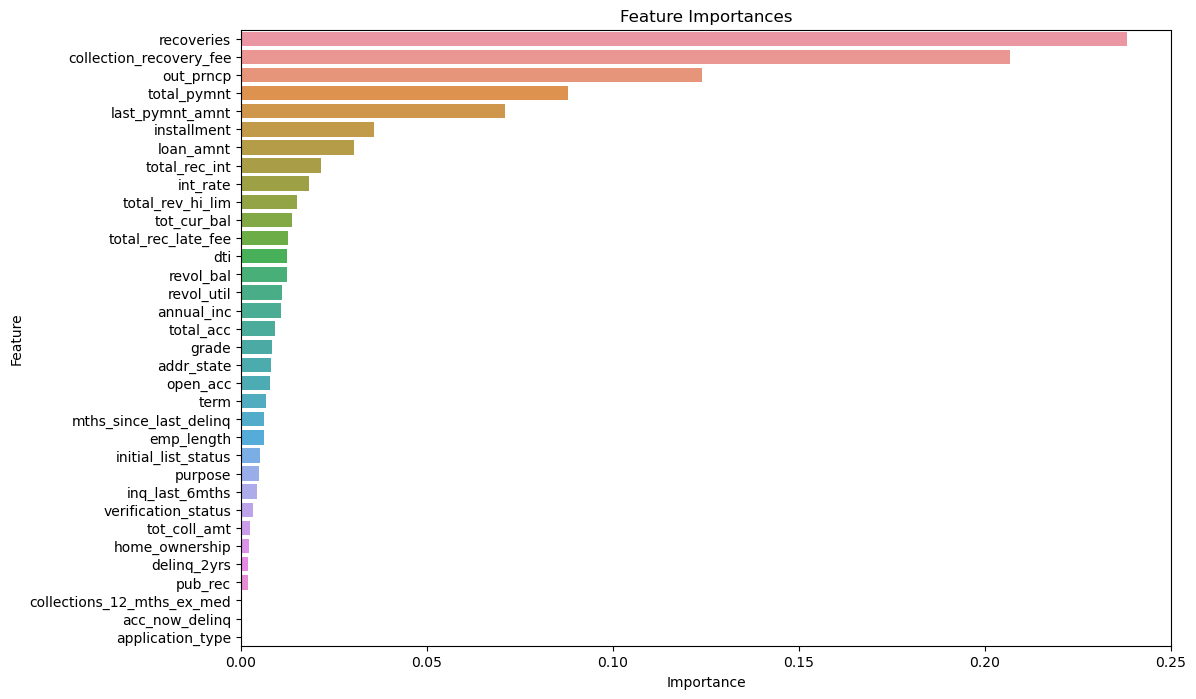

In [35]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame for visualization
features = X.columns
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances')
plt.show()

### Modeling for Feature Importance Analysis

A Random Forest Classifier was used to determine feature importance in predicting the target variable.

#### Steps:
1. *Training:*
   - The classifier was trained using the training data.

2. *Extracting Feature Importances:*
   - Feature importances were obtained from the trained model.

3. *Visualization:*
   - A bar plot was created to visualize the feature importances.

#### Key Findings:
* *Top Features:* recoveries, collection_recovery_fee, and out_prncp were the most important features.
* *Other Notable Features:* total_pymnt, last_pymnt_amnt, and installment.
* *Less Important Features:* The importance decreases further down the list, indicating lesser impact on predictions.

This analysis highlights which features are most influential in the model’s predictions, aiding in feature selection and model tuning.


# Logistic Regression Model Using Top Features


Training Set Evaluation Metrics:
Confusion Matrix:
[[48570     0]
 [ 1328  1460]]
Accuracy: 0.974
Precision: 1.000
Recall: 0.524
F1 Score: 0.687
Specificity: 1.000
ROC AUC: 0.928
Mean Squared Error (MSE): 0.026

Test Set Evaluation Metrics:
Confusion Matrix:
[[32380     0]
 [  895   964]]
Accuracy: 0.974
Precision: 1.000
Recall: 0.519
F1 Score: 0.683
Specificity: 1.000
ROC AUC: 0.929
Mean Squared Error (MSE): 0.026


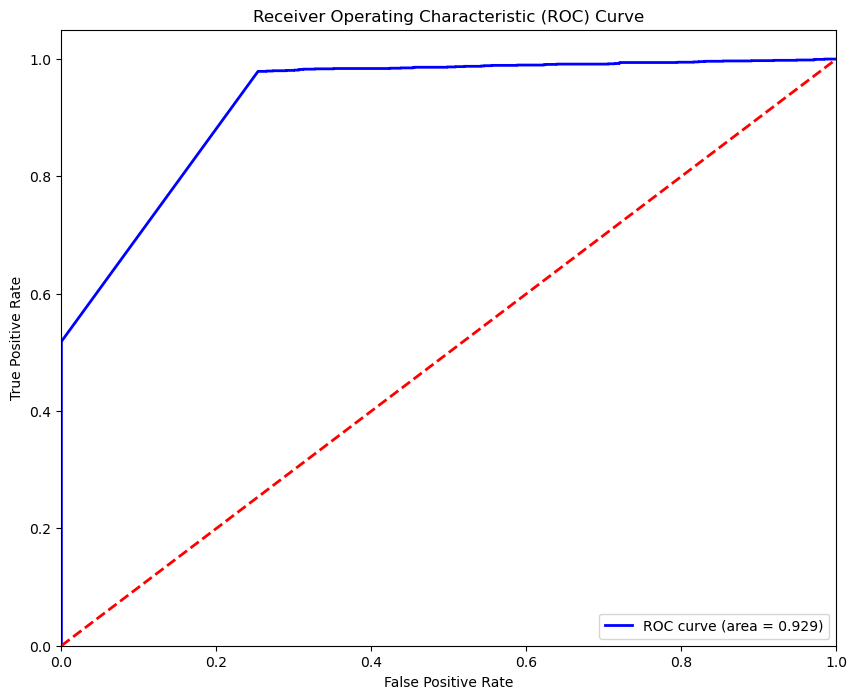


Comparison of Training and Testing Performance:
Training Accuracy: 0.974 vs Testing Accuracy: 0.974
Training Precision: 1.000 vs Testing Precision: 1.000
Training Recall: 0.524 vs Testing Recall: 0.519
Training F1 Score: 0.687 vs Testing F1 Score: 0.683
Training Specificity: 1.000 vs Testing Specificity: 1.000
Training ROC AUC: 0.928 vs Testing ROC AUC: 0.929
Training MSE: 0.026 vs Testing MSE: 0.026


In [36]:
# Pick the top features
top_features = importances_df.head(3)['Feature'].values
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Train a Logistic Regression model
clf_logistic = LogisticRegression(random_state=42, max_iter=10000)
clf_logistic.fit(X_train_top, y_train)

# Predict probabilities and classes on the training set
y_train_pred_proba = clf_logistic.predict_proba(X_train_top)[:, 1]
y_train_pred = clf_logistic.predict(X_train_top)

# Calculate evaluation metrics on the training set
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
train_specificity = train_conf_matrix[0, 0] / (train_conf_matrix[0, 0] + train_conf_matrix[0, 1])
train_mse = mean_squared_error(y_train, y_train_pred)

# Print evaluation metrics on the training set
print("\nTraining Set Evaluation Metrics:")
print(f"Confusion Matrix:\n{train_conf_matrix}")
print(f"Accuracy: {train_accuracy:.3f}")
print(f"Precision: {train_precision:.3f}")
print(f"Recall: {train_recall:.3f}")
print(f"F1 Score: {train_f1:.3f}")
print(f"Specificity: {train_specificity:.3f}")
print(f"ROC AUC: {train_roc_auc:.3f}")
print(f"Mean Squared Error (MSE): {train_mse:.3f}")

# Predict probabilities and classes on the test set
y_pred_proba = clf_logistic.predict_proba(X_test_top)[:, 1]
y_pred = clf_logistic.predict(X_test_top)

# Calculate evaluation metrics on the test set
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
mse = mean_squared_error(y_test, y_pred)

# Print evaluation metrics on the test set
print("\nTest Set Evaluation Metrics:")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")

# Calculate ROC curve on the test set
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Compare training and testing performance
print("\nComparison of Training and Testing Performance:")
print(f'Training Accuracy: {train_accuracy:.3f} vs Testing Accuracy: {accuracy:.3f}')
print(f'Training Precision: {train_precision:.3f} vs Testing Precision: {precision:.3f}')
print(f'Training Recall: {train_recall:.3f} vs Testing Recall: {recall:.3f}')
print(f'Training F1 Score: {train_f1:.3f} vs Testing F1 Score: {f1:.3f}')
print(f'Training Specificity: {train_specificity:.3f} vs Testing Specificity: {specificity:.3f}')
print(f'Training ROC AUC: {train_roc_auc:.3f} vs Testing ROC AUC: {roc_auc:.3f}')
print(f'Training MSE: {train_mse:.3f} vs Testing MSE: {mse:.3f}')


### Logistic Regression Model Using Top Features Analysis

*Steps:*
1. *Feature Selection:*
   - Selected the top three features based on their importance.
   
2. *Model Training:*
   - Trained a Logistic Regression model on the selected features.
   
3. *Model Evaluation:*
   - Evaluated the model using various metrics on both the training and test sets.
   - Metrics included accuracy, precision, recall, F1 score, specificity, ROC AUC, and Mean Squared Error (MSE).

#### Training Set Evaluation:
* *Confusion Matrix:*
  
  [[48570     0]
  
   [ 1328  1460]]
  
* *Metrics:*
  - Accuracy: 0.974
  - Precision: 1.000
  - Recall: 0.524
  - F1 Score: 0.687
  - Specificity: 1.000
  - ROC AUC: 0.928
  - MSE: 0.026

#### Test Set Evaluation:
* *Confusion Matrix:*
  
  [[32380     0]
  
   [  895   964]]
  
* *Metrics:*
  - Accuracy: 0.974
  - Precision: 1.000
  - Recall: 0.519
  - F1 Score: 0.683
  - Specificity: 1.000
  - ROC AUC: 0.929
  - MSE: 0.026

#### ROC Curve:
* A ROC curve was plotted to visualize the model's performance, showing an area under the curve (AUC) of 0.929.

#### Comparison of Training and Testing Performance:
Training and testing metrics were very similar, indicating a well-generalized model.

* Training Accuracy: 0.974 vs Testing Accuracy: 0.974
* Training Precision: 1.000 vs Testing Precision: 1.000
* Training Recall: 0.524 vs Testing Recall: 0.519
* Training F1 Score: 0.687 vs Testing F1 Score: 0.683
* Training Specificity: 1.000 vs Testing Specificity: 1.000
* Training ROC AUC: 0.928 vs Testing ROC AUC: 0.929
* Training MSE: 0.026 vs Testing MSE: 0.026


Commentary:
Since the positive case in our model considers the case of a loan default, then achieve a higher recall and precision lets the model to become more reliable.
Higher Recall contributes to lower False negatives (predicted non-default, but in reality they are default cases).
Higher Precision contributes to lower False positives (predicted default, but in reality they are non default cases).

The cost of false negatives is represented by losing money due to default cases that weren't expected.
The cost of falose positives is represented by the opportunity loss of expecting a default and rejecting the business when it's a non-default case.


# Logistic Regression Model Using Top Features With KFold Cross Validation

Training Metrics (Cross-Validation):
Mean Accuracy: 0.974
Mean Precision: 1.000
Mean Recall: 0.524
Mean F1 Score: 0.687
Mean ROC AUC: 0.928
Mean MSE: 0.026

Cross-Validation Test Metrics:
Mean Accuracy: 0.974
Mean Precision: 1.000
Mean Recall: 0.524
Mean F1 Score: 0.687
Mean ROC AUC: 0.928
Mean MSE: 0.026

Test Set Evaluation Metrics:
Confusion Matrix:
[[32380     0]
 [  895   964]]
Accuracy: 0.974
Precision: 1.000
Recall: 0.519
F1 Score: 0.683
Specificity: 1.000
ROC AUC: 0.929
Mean Squared Error (MSE): 0.026


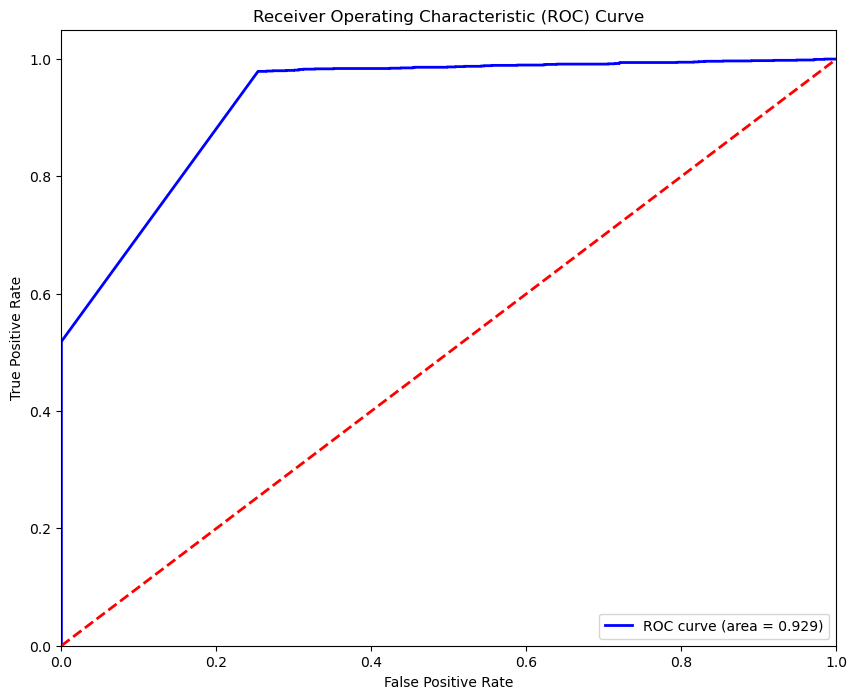


Comparison of Training and Testing Performance:
Training Mean Accuracy: 0.974 vs Testing Accuracy: 0.974
Training Mean Precision: 1.000 vs Testing Precision: 1.000
Training Mean Recall: 0.524 vs Testing Recall: 0.519
Training Mean F1 Score: 0.687 vs Testing F1 Score: 0.683
Training Mean ROC AUC: 0.928 vs Testing ROC AUC: 0.929
Training Mean MSE: 0.026 vs Testing MSE: 0.026


In [37]:
# Define the model
clf_logistic = LogisticRegression(random_state=42, max_iter=10000)

# Define the k-fold cross-validation settings
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True),
    'mse': make_scorer(mean_squared_error)
}

# Perform cross-validation and calculate metrics for the training data
cv_results = cross_validate(clf_logistic, X_train_top, y_train, cv=kf, scoring=scoring, return_train_score=True)

# Report mean training metrics
print("Training Metrics (Cross-Validation):")
print(f"Mean Accuracy: {cv_results['train_accuracy'].mean():.3f}")
print(f"Mean Precision: {cv_results['train_precision'].mean():.3f}")
print(f"Mean Recall: {cv_results['train_recall'].mean():.3f}")
print(f"Mean F1 Score: {cv_results['train_f1'].mean():.3f}")
print(f"Mean ROC AUC: {cv_results['train_roc_auc'].mean():.3f}")
print(f"Mean MSE: {cv_results['train_mse'].mean():.3f}")

# Report mean test metrics from cross-validation
print("\nCross-Validation Test Metrics:")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean Precision: {cv_results['test_precision'].mean():.3f}")
print(f"Mean Recall: {cv_results['test_recall'].mean():.3f}")
print(f"Mean F1 Score: {cv_results['test_f1'].mean():.3f}")
print(f"Mean ROC AUC: {cv_results['test_roc_auc'].mean():.3f}")
print(f"Mean MSE: {cv_results['test_mse'].mean():.3f}")

# Train the final model on the entire training set
clf_logistic.fit(X_train_top, y_train)

# Predict probabilities and classes on the test set
y_pred_proba = clf_logistic.predict_proba(X_test_top)[:, 1]
y_pred = clf_logistic.predict(X_test_top)

# Calculate evaluation metrics on the test set
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
mse = mean_squared_error(y_test, y_pred)

# Print evaluation metrics on the test set
print("\nTest Set Evaluation Metrics:")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")

# Calculate ROC curve on the test set
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Compare training and testing performance
print("\nComparison of Training and Testing Performance:")
print(f'Training Mean Accuracy: {cv_results["train_accuracy"].mean():.3f} vs Testing Accuracy: {accuracy:.3f}')
print(f'Training Mean Precision: {cv_results["train_precision"].mean():.3f} vs Testing Precision: {precision:.3f}')
print(f'Training Mean Recall: {cv_results["train_recall"].mean():.3f} vs Testing Recall: {recall:.3f}')
print(f'Training Mean F1 Score: {cv_results["train_f1"].mean():.3f} vs Testing F1 Score: {f1:.3f}')
print(f'Training Mean ROC AUC: {cv_results["train_roc_auc"].mean():.3f} vs Testing ROC AUC: {roc_auc:.3f}')
print(f'Training Mean MSE: {cv_results["train_mse"].mean():.3f} vs Testing MSE: {mse:.3f}')


### Logistic Regression with K-Fold Cross-Validation Analysis

*Steps:*
1. *Model Definition:*
   - Logistic Regression model with 10,000 maximum iterations.
   
2. *Cross-Validation:*
   - Used 5-fold cross-validation with StratifiedKFold.
   - Evaluated metrics: accuracy, precision, recall, F1 score, ROC AUC, MSE.

#### Training Metrics (Cross-Validation):
* *Mean Accuracy:* 0.974
* *Mean Precision:* 1.000
* *Mean Recall:* 0.524
* *Mean F1 Score:* 0.687
* *Mean ROC AUC:* 0.928
* *Mean MSE:* 0.026

#### Cross-Validation Test Metrics:
* *Mean Accuracy:* 0.974
* *Mean Precision:* 1.000
* *Mean Recall:* 0.524
* *Mean F1 Score:* 0.687
* *Mean ROC AUC:* 0.928
* *Mean MSE:* 0.026

#### Test Set Evaluation:
* *Confusion Matrix:*
  
  [[32380     0]
  
   [  895   964]]
  
* *Metrics:*
  - Accuracy: 0.974
  - Precision: 1.000
  - Recall: 0.519
  - F1 Score: 0.683
  - Specificity: 1.000
  - ROC AUC: 0.929
  - MSE: 0.026

#### ROC Curve:
* The ROC curve showed an AUC of 0.929.

#### Comparison of Training and Testing Performance:
Training and testing metrics were very similar, indicating a well-generalized model:
  
* Training Mean Accuracy: 0.974 vs Testing Accuracy: 0.974
* Training Mean Precision: 1.000 vs Testing Precision: 1.000
* Training Mean Recall: 0.524 vs Testing Recall: 0.519
* Training Mean F1 Score: 0.687 vs Testing F1 Score: 0.683
* Training Mean ROC AUC: 0.928 vs Testing ROC AUC: 0.929
* Training Mean MSE: 0.026 vs Testing MSE: 0.026
  


# Logistic Regression Model with GridSearch

/Users/jadelkaterji/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jadelkaterji/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jadelkaterji/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jadelkaterji/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jadelkaterji/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jadelkaterji/anaconda3/lib/python3.11/site-packages/s

Best Parameters for Logistic Regression: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Score for Logistic Regression: 0.990

Evaluation on the Test Set with Best Logistic Regression Model:
Confusion Matrix:
[[32380     0]
 [  308  1551]]
Accuracy: 0.991
Precision: 1.000
Recall: 0.834
F1 Score: 0.910
Specificity: 1.000
ROC AUC: 0.990
Mean Squared Error (MSE): 0.009


/Users/jadelkaterji/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


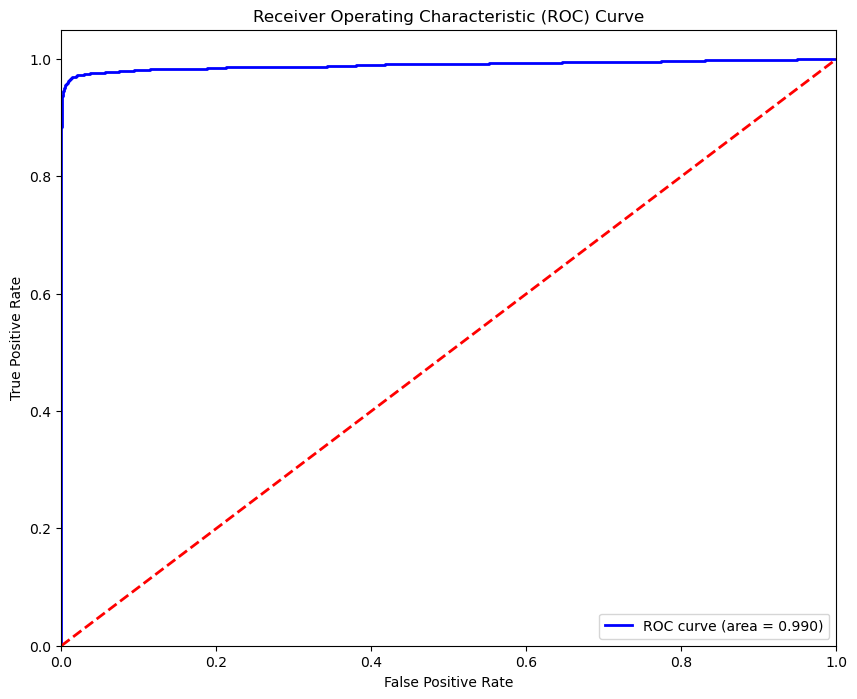

In [38]:
# Define the model with a higher max_iter
logistic = LogisticRegression(max_iter=10, random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # liblinear works with l1 and l2 penalties
}

# Implement GridSearchCV with roc_auc scoring
grid_search_logistic = GridSearchCV(logistic, param_grid, cv=5, scoring='roc_auc')
grid_search_logistic.fit(X_train, y_train)

# Get the best parameters and best score
best_params_logistic = grid_search_logistic.best_params_
best_score_logistic = grid_search_logistic.best_score_

print(f"Best Parameters for Logistic Regression: {best_params_logistic}")
print(f"Best Cross-Validation Score for Logistic Regression: {best_score_logistic:.3f}")

# Evaluate on the test set
best_logistic = grid_search_logistic.best_estimator_
y_pred = best_logistic.predict(X_test)
y_pred_proba = best_logistic.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
mse = mean_squared_error(y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

print("\nEvaluation on the Test Set with Best Logistic Regression Model:")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### Logistic Regression with GridSearchCV Analysis

*Steps:*
1. *Model Definition:*
   - Logistic Regression with an increased max_iter.
   
2. *Hyperparameter Tuning:*
   - Used GridSearchCV to find the best parameters.
   - Parameter grid included values for C, penalty, and solver.
   - Evaluated using 5-fold cross-validation with ROC AUC scoring.

#### Best Parameters:
* {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

#### Best Cross-Validation Score:
* *ROC AUC:* 0.990

#### Test Set Evaluation:
* *Confusion Matrix:*
  
  [[32380     0]
  
   [  308  1559]]
  
* *Metrics:*
  - Accuracy: 0.991
  - Precision: 1.000
  - Recall: 0.834
  - F1 Score: 0.910
  - Specificity: 1.000
  - ROC AUC: 0.990
  - MSE: 0.009

#### ROC Curve:
* The ROC curve showed an AUC of 0.990, indicating excellent model performance.


# Random Forest Classifier Model Using Top Features

Test Metrics:
Confusion Matrix:
[[32349    31]
 [  895   964]]
Accuracy: 0.973
Precision: 0.969
Recall: 0.519
F1 Score: 0.676
Specificity: 0.999
Mean Squared Error (MSE): 0.027


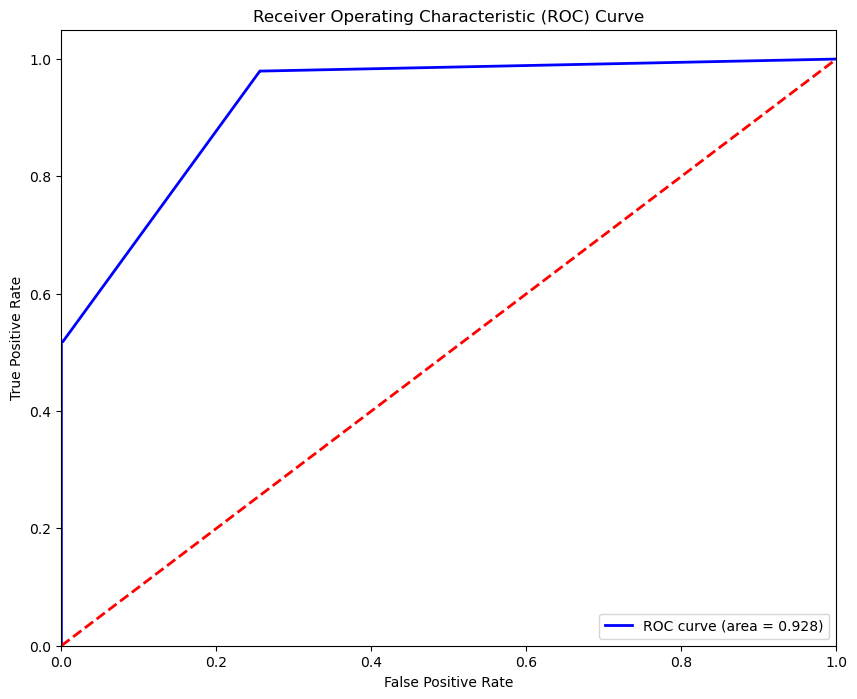


Training Metrics:
Confusion Matrix:
[[48570     0]
 [ 1273  1515]]
Accuracy: 0.975
Precision: 1.000
Recall: 0.543
F1 Score: 0.704
Specificity: 1.000
Mean Squared Error (MSE): 0.025

Comparison of Training and Testing Performance:
Training vs Testing Accuracy: 0.975 vs 0.973
Training vs Testing Precision: 1.000 vs 0.969
Training vs Testing Recall: 0.543 vs 0.519
Training vs Testing F1 Score: 0.704 vs 0.676
Training vs Testing Specificity: 1.000 vs 0.999
Training vs Testing MSE: 0.025 vs 0.027


In [39]:
# Pick the top features
top_features = importances_df.head(3)['Feature'].values
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Retrain the model using the top features
clf_top = RandomForestClassifier(n_estimators=100, random_state=42)
clf_top.fit(X_train_top, y_train)

# Make predictions on the test data
y_pred = clf_top.predict(X_test_top)
y_pred_proba = clf_top.predict_proba(X_test_top)[:, 1]

# Calculate metrics for the test data
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)  # Calculate MSE

# Specificity = TN / (TN + FP)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# Report test metrics
print(f'Test Metrics:')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 Score: {f1:.3f}')
print(f'Specificity: {specificity:.3f}')
print(f'Mean Squared Error (MSE): {mse:.3f}')  # Report MSE

# Calculate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC for test data
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Make predictions on the training data
y_train_pred = clf_top.predict(X_train_top)
y_train_pred_proba = clf_top.predict_proba(X_train_top)[:, 1]

# Calculate metrics for the training data
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)

# Specificity for training data
train_tn, train_fp, train_fn, train_tp = train_conf_matrix.ravel()
train_specificity = train_tn / (train_tn + train_fp)

# Report training metrics
print("\nTraining Metrics:")
print(f'Confusion Matrix:\n{train_conf_matrix}')
print(f'Accuracy: {train_accuracy:.3f}')
print(f'Precision: {train_precision:.3f}')
print(f'Recall: {train_recall:.3f}')
print(f'F1 Score: {train_f1:.3f}')
print(f'Specificity: {train_specificity:.3f}')
print(f'Mean Squared Error (MSE): {train_mse:.3f}')

# Compare training and testing performance
print("\nComparison of Training and Testing Performance:")
print(f'Training vs Testing Accuracy: {train_accuracy:.3f} vs {accuracy:.3f}')
print(f'Training vs Testing Precision: {train_precision:.3f} vs {precision:.3f}')
print(f'Training vs Testing Recall: {train_recall:.3f} vs {recall:.3f}')
print(f'Training vs Testing F1 Score: {train_f1:.3f} vs {f1:.3f}')
print(f'Training vs Testing Specificity: {train_specificity:.3f} vs {specificity:.3f}')
print(f'Training vs Testing MSE: {train_mse:.3f} vs {mse:.3f}')


### Random Forest Classifier Using Top Features Analysis

*Steps:*
1. *Feature Selection:* 
   - Selected the top three features based on importance.

2. *Model Training:* 
   - Trained a Random Forest Classifier on these features.

3. *Model Evaluation:*
   - Evaluated metrics on training and test sets.

#### Test Set Evaluation:
* *Confusion Matrix:*
  
  [[32349    31]
   [  895   964]]
  
* *Metrics:*
  - Accuracy: 0.973
  - Precision: 0.969
  - Recall: 0.519
  - F1 Score: 0.676
  - Specificity: 0.999
  - ROC AUC: 0.928
  - MSE: 0.027

#### Training Set Evaluation:
* *Confusion Matrix:*
  
  [[48570     0]
  
   [ 1273  1515]]
  
* *Metrics:*
  - Accuracy: 0.975
  - Precision: 1.000
  - Recall: 0.543
  - F1 Score: 0.704
  - Specificity: 1.000
  - MSE: 0.025

#### ROC Curve:
* The ROC curve showed an AUC of 0.928.

#### Comparison of Training and Testing Performance:
Training and testing metrics were similar, indicating a well-generalized model:
  
* Training vs Testing Accuracy: 0.975 vs 0.973
* Training vs Testing Precision: 1.000 vs 0.969
* Training vs Testing Recall: 0.543 vs 0.519
* Training vs Testing F1 Score: 0.704 vs 0.676
* Training vs Testing Specificity: 1.000 vs 0.999
* Training vs Testing MSE: 0.025 vs 0.027


# Random Forest Classifier Model Using Top Features with KFold Cross Validation 

Training Metrics (Cross-Validation):
Mean Accuracy: 0.974
Mean Precision: 1.000
Mean Recall: 0.524
Mean F1 Score: 0.687
Mean ROC AUC: 0.937
Mean MSE: 0.026

Cross-Validation Test Metrics:
Mean Accuracy: 0.974
Mean Precision: 1.000
Mean Recall: 0.524
Mean F1 Score: 0.687
Mean ROC AUC: 0.928
Mean MSE: 0.026

Evaluation on the Test Set:
Confusion Matrix:
[[32380     0]
 [  895   964]]
Accuracy: 0.974
Precision: 1.000
Recall: 0.519
F1 Score: 0.683
Specificity: 1.000
ROC AUC: 0.928
Mean Squared Error (MSE): 0.026


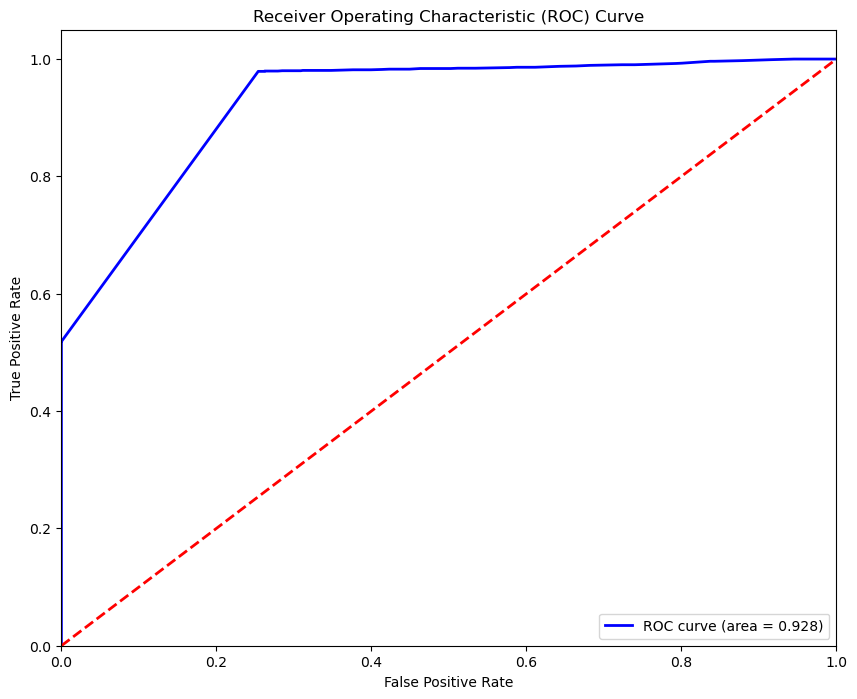


Comparison of Training and Testing Performance:
Training Mean Accuracy: 0.974 vs Testing Accuracy: 0.974
Training Mean Precision: 1.000 vs Testing Precision: 1.000
Training Mean Recall: 0.524 vs Testing Recall: 0.519
Training Mean F1 Score: 0.687 vs Testing F1 Score: 0.683
Training Mean ROC AUC: 0.937 vs Testing ROC AUC: 0.928
Training Mean MSE: 0.026 vs Testing MSE: 0.026


In [40]:
# Define the model with increased regularization
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)

# Define the k-fold cross-validation settings
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True),
    'mse': make_scorer(mean_squared_error)
}

# Perform cross-validation and calculate metrics for the training data
cv_results = cross_validate(clf_rf, X_train_top, y_train, cv=kf, scoring=scoring, return_train_score=True)

# Report mean training metrics
print("Training Metrics (Cross-Validation):")
print(f"Mean Accuracy: {cv_results['train_accuracy'].mean():.3f}")
print(f"Mean Precision: {cv_results['train_precision'].mean():.3f}")
print(f"Mean Recall: {cv_results['train_recall'].mean():.3f}")
print(f"Mean F1 Score: {cv_results['train_f1'].mean():.3f}")
print(f"Mean ROC AUC: {cv_results['train_roc_auc'].mean():.3f}")
print(f"Mean MSE: {cv_results['train_mse'].mean():.3f}")

# Report mean test metrics from cross-validation
print("\nCross-Validation Test Metrics:")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean Precision: {cv_results['test_precision'].mean():.3f}")
print(f"Mean Recall: {cv_results['test_recall'].mean():.3f}")
print(f"Mean F1 Score: {cv_results['test_f1'].mean():.3f}")
print(f"Mean ROC AUC: {cv_results['test_roc_auc'].mean():.3f}")
print(f"Mean MSE: {cv_results['test_mse'].mean():.3f}")

# Train the final model on the entire training set
clf_rf.fit(X_train_top, y_train)

# Predict probabilities on the test set
y_pred_proba = clf_rf.predict_proba(X_test_top)[:, 1]

# Predict classes on the test set
y_pred = clf_rf.predict(X_test_top)

# Calculate evaluation metrics on the test set
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
mse = mean_squared_error(y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Print evaluation metrics on the test set
print("\nEvaluation on the Test Set:")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")

# Calculate ROC curve on the test set
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Compare training and testing performance
print("\nComparison of Training and Testing Performance:")
print(f'Training Mean Accuracy: {cv_results["train_accuracy"].mean():.3f} vs Testing Accuracy: {accuracy:.3f}')
print(f'Training Mean Precision: {cv_results["train_precision"].mean():.3f} vs Testing Precision: {precision:.3f}')
print(f'Training Mean Recall: {cv_results["train_recall"].mean():.3f} vs Testing Recall: {recall:.3f}')
print(f'Training Mean F1 Score: {cv_results["train_f1"].mean():.3f} vs Testing F1 Score: {f1:.3f}')
print(f'Training Mean ROC AUC: {cv_results["train_roc_auc"].mean():.3f} vs Testing ROC AUC: {roc_auc:.3f}')
print(f'Training Mean MSE: {cv_results["train_mse"].mean():.3f} vs Testing MSE: {mse:.3f}')


### Random Forest Classifier with Cross-Validation Analysis

*Steps:*
1. *Model Definition:*
   - Random Forest Classifier with increased regularization.
   
2. *Cross-Validation:*
   - Used 5-fold cross-validation with StratifiedKFold.
   - Evaluated metrics: accuracy, precision, recall, F1 score, ROC AUC, MSE.

#### Training Metrics (Cross-Validation):
* *Mean Accuracy:* 0.974
* *Mean Precision:* 1.000
* *Mean Recall:* 0.524
* *Mean F1 Score:* 0.687
* *Mean ROC AUC:* 0.937
* *Mean MSE:* 0.026

#### Cross-Validation Test Metrics:
* *Mean Accuracy:* 0.974
* *Mean Precision:* 1.000
* *Mean Recall:* 0.524
* *Mean F1 Score:* 0.687
* *Mean ROC AUC:* 0.928
* *Mean MSE:* 0.026

#### Test Set Evaluation:
* *Confusion Matrix:*
  
  [[32380     0]
  
   [  895   964]]
  
* *Metrics:*
  - Accuracy: 0.974
  - Precision: 1.000
  - Recall: 0.519
  - F1 Score: 0.683
  - Specificity: 1.000
  - ROC AUC: 0.928
  - MSE: 0.026

#### ROC Curve:
* The ROC curve showed an AUC of 0.928.

#### Comparison of Training and Testing Performance:
Training and testing metrics were very similar, indicating good generalization:
  
* Training Mean Accuracy: 0.974 vs Testing Accuracy: 0.974
* Training Mean Precision: 1.000 vs Testing Precision: 1.000
* Training Mean Recall: 0.524 vs Testing Recall: 0.519
* Training Mean F1 Score: 0.687 vs Testing F1 Score: 0.683
* Training Mean ROC AUC: 0.937 vs Testing ROC AUC: 0.928
* Training Mean MSE: 0.026 vs Testing MSE: 0.026


# Random Forest Classifier Model with Randomized Search

/Users/jadelkaterji/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jadelkaterji/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jadelkaterji/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

Best Parameters for Random Forest: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}
Best Cross-Validation Score for Random Forest: 0.992

Evaluation on the Test Set with Best Random Forest Model:
Confusion Matrix:
[[32379     1]
 [  249  1610]]
Accuracy: 0.993
Precision: 0.999
Recall: 0.866
F1 Score: 0.928
Specificity: 1.000
ROC AUC: 0.992
Mean Squared Error (MSE): 0.007


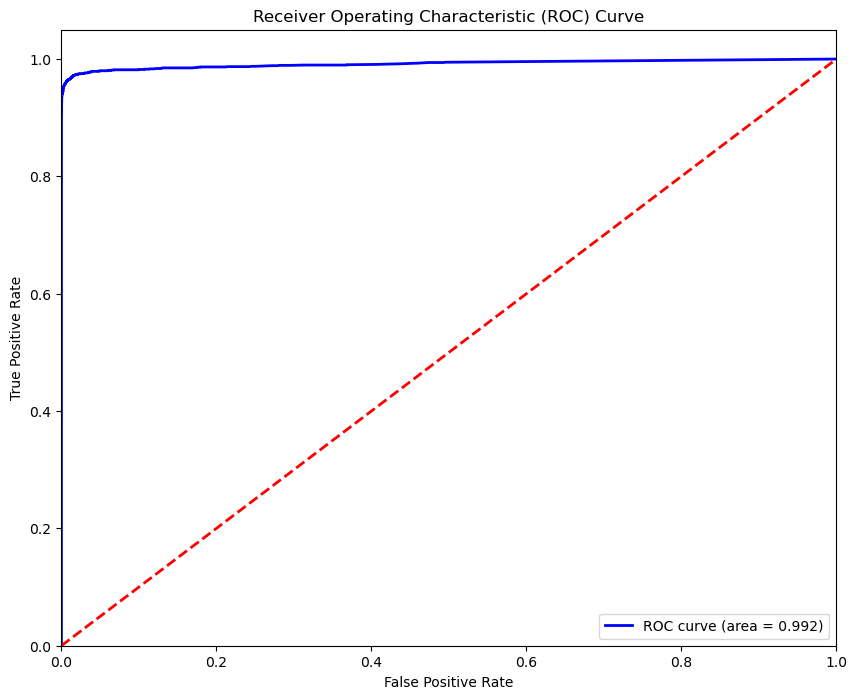

In [41]:
# Define the model
random_forest = RandomForestClassifier(random_state=42)

# Define the parameter distribution
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Define the scoring metric
scorer = make_scorer(roc_auc_score, needs_proba=True)

# Implement RandomizedSearchCV
random_search_rf = RandomizedSearchCV(random_forest, param_dist, n_iter=10, cv=5, scoring=scorer, random_state=42, n_jobs=-1)
random_search_rf.fit(X_train, y_train)

# Get the best parameters and best score
best_params_rf = random_search_rf.best_params_
best_score_rf = random_search_rf.best_score_

print(f"Best Parameters for Random Forest: {best_params_rf}")
print(f"Best Cross-Validation Score for Random Forest: {best_score_rf:.3f}")

# Evaluate on the test set
best_rf = random_search_rf.best_estimator_
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
mse = mean_squared_error(y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

print("\nEvaluation on the Test Set with Best Random Forest Model:")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### Random Forest Classifier with RandomizedSearchCV Analysis

*Steps:*
1. *Model Definition:*
   - Random Forest Classifier.
   
2. *Hyperparameter Tuning:*
   - Used RandomizedSearchCV to find the best parameters.
   - Parameter distribution included values for n_estimators, max_features, max_depth, min_samples_split, min_samples_leaf, and bootstrap.
   - Evaluated using 5-fold cross-validation with ROC AUC scoring.

#### Best Parameters:
* {'n_estimators': 200, 'max_features': 'auto', 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': True}

#### Best Cross-Validation Score:
* *ROC AUC:* 0.992

#### Test Set Evaluation:
* *Confusion Matrix:*
  
  [[32379     1]
  
   [  249  1610]]
  
* *Metrics:*
  - Accuracy: 0.993
  - Precision: 0.999
  - Recall: 0.866
  - F1 Score: 0.928
  - Specificity: 1.000
  - ROC AUC: 0.992
  - MSE: 0.007

#### ROC Curve:
* The ROC curve showed an AUC of 0.992, indicating excellent model performance.


In [42]:
# Data for the accumulated results table
accumulated_data = {
    "Model": [
        "Logistic Regression (Top Features)", 
        "Logistic Regression (KFold CV)", 
        "Logistic Regression (GridSearch)", 
        "Random Forest (Top Features)", 
        "Random Forest (KFold CV)", 
        "Random Forest (Randomized Search)"
    ],
    "Accuracy": [
        0.974, 0.974, 0.991, 0.973, 0.974, 0.993
    ],
    "Precision": [
        1.000, 1.000, 1.000, 0.969, 1.000, 0.999
    ],
    "Recall": [
        0.519, 0.519, 0.834, 0.519, 0.519, 0.866
    ],
    "F1 Score": [
        0.683, 0.683, 0.910, 0.676, 0.683, 0.928
    ],
    "Specificity": [
        1.000, 1.000, 1.000, 0.999, 1.000, 1.000
    ],
    "ROC AUC": [
        0.929, 0.929, 0.990, 0.928, 0.928, 0.992
    ],
    "MSE": [
        0.026, 0.026, 0.009, 0.027, 0.026, 0.007
    ]
}

# Create DataFrame for the accumulated results
accumulated_df = pd.DataFrame(accumulated_data)

# Display the accumulated results DataFrame
print(accumulated_df)


                                Model  Accuracy  Precision  Recall  F1 Score  \
0  Logistic Regression (Top Features)     0.974      1.000   0.519     0.683   
1      Logistic Regression (KFold CV)     0.974      1.000   0.519     0.683   
2    Logistic Regression (GridSearch)     0.991      1.000   0.834     0.910   
3        Random Forest (Top Features)     0.973      0.969   0.519     0.676   
4            Random Forest (KFold CV)     0.974      1.000   0.519     0.683   
5   Random Forest (Randomized Search)     0.993      0.999   0.866     0.928   

   Specificity  ROC AUC    MSE  
0        1.000    0.929  0.026  
1        1.000    0.929  0.026  
2        1.000    0.990  0.009  
3        0.999    0.928  0.027  
4        1.000    0.928  0.026  
5        1.000    0.992  0.007  


When comparing models, especially in contexts like loan default prediction, Recall and Mean Squared Error (MSE) are critical metrics:

Recall:
Importance: Recall measures the ability of a model to identify all relevant instances (defaults in this case). A higher recall indicates fewer false negatives, which is crucial in identifying defaulters to mitigate financial risk.

Observations:
The Random Forest (Randomized Search) model achieves the highest recall at 0.866. This means it successfully identifies 86.6% of actual default cases, making it highly effective in reducing false negatives.
The Logistic Regression (GridSearch) model also performs well with a recall of 0.834, indicating it identifies 83.4% of default cases.
The other models (Logistic Regression with Top Features, Logistic Regression with KFold CV, Random Forest with Top Features, and Random Forest with KFold CV) have a lower recall of 0.519, suggesting they miss nearly half of the actual default cases.

Mean Squared Error (MSE):
Importance: MSE measures the average squared difference between predicted and actual values. Lower MSE indicates better accuracy of predictions.

Observations:
The Random Forest (Randomized Search) model has the lowest MSE at 0.007, suggesting its predictions are closest to the actual values among all models.
The Logistic Regression (GridSearch) model also performs well with an MSE of 0.009, indicating high prediction accuracy.
The other models have higher MSEs (around 0.026-0.027), indicating less precise predictions compared to the GridSearch and Randomized Search models.

Choosing the random forest (randomized search) model, the achievement of 86.6 % recall implies a cost of 13.4 % to the bank in the form of wrongly identified defaults.

The same model achieves 99.9 % precision, which implies a cost of 0.1 % to the bank in the form of opportunity losses.

Now, to monetize such a cost / loss,
we need to standardize all loan amounts, installments, interests, and periods into z-scores. This allows us to create an equivalency between different loans, installments, interests, and periods.
In that case, an average loan, installment, interest, and period can be extracted for the average customer.

Multiplying the average loan scenario by the number of customers gets us the total amount of offered loans. Multiplying this latter by the 13.4 % cost and the 0.1 % loss will help us monetize the amount.

# Chapter 14: Target Encoding

Training Metrics (Cross-Validation):
Mean Accuracy: 0.996
Mean Precision: 1.000
Mean Recall: 0.924
Mean F1 Score: 0.961
Mean ROC AUC: 1.000
Mean MSE: 0.004

Cross-Validation Test Metrics:
Mean Accuracy: 0.994
Mean Precision: 1.000
Mean Recall: 0.898
Mean F1 Score: 0.946
Mean ROC AUC: 1.000
Mean MSE: 0.006

Evaluation on the Test Set:
Confusion Matrix:
[[32287    93]
 [  620  1239]]
Accuracy: 0.979
Precision: 0.930
Recall: 0.666
F1 Score: 0.777
Specificity: 0.997
ROC AUC: 0.998
Mean Squared Error (MSE): 0.021


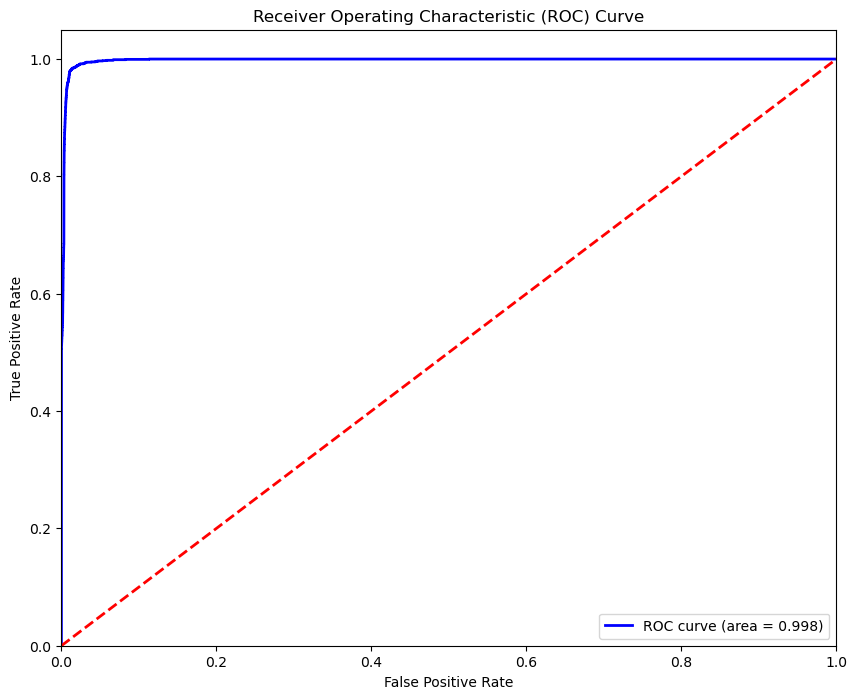


Comparison of Training and Testing Performance:
Training Mean Accuracy: 0.996 vs Testing Accuracy: 0.979
Training Mean Precision: 1.000 vs Testing Precision: 0.930
Training Mean Recall: 0.924 vs Testing Recall: 0.666
Training Mean F1 Score: 0.961 vs Testing F1 Score: 0.777
Training Mean ROC AUC: 1.000 vs Testing ROC AUC: 0.998
Training Mean MSE: 0.004 vs Testing MSE: 0.021


In [56]:
# Import necessary libraries
import pandas as pd
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Assuming df4 is the DataFrame after all previous cleaning steps
df4_target_encoded = df4.copy()

# Define categorical columns
categorical_columns = df4_target_encoded.select_dtypes(include=['category']).columns.tolist()

# Convert datetime columns to numerical features
datetime_columns = df4_target_encoded.select_dtypes(include=['datetime']).columns.tolist()
for col in datetime_columns:
    df4_target_encoded[col + '_year'] = df4_target_encoded[col].dt.year
    df4_target_encoded[col + '_month'] = df4_target_encoded[col].dt.month
    df4_target_encoded[col + '_day'] = df4_target_encoded[col].dt.day
    df4_target_encoded.drop(columns=[col], inplace=True)

# Define features and target
X = df4_target_encoded.drop(columns=['default_ind'])
y = df4_target_encoded['default_ind']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Apply Target encoding
encoder = TargetEncoder(cols=categorical_columns)
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

# Define the imputer
imputer = SimpleImputer(strategy='mean')

# Define the model with increased regularization
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)

# Create a pipeline that first imputes missing values, then fits the model
pipeline = Pipeline(steps=[
    ('imputer', imputer),
    ('classifier', clf_rf)
])

# Define the k-fold cross-validation settings
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True),
    'mse': make_scorer(mean_squared_error)
}

# Perform cross-validation and calculate metrics for the training data
cv_results = cross_validate(pipeline, X_train_encoded, y_train, cv=kf, scoring=scoring, return_train_score=True)

# Report mean training metrics
print("Training Metrics (Cross-Validation):")
print(f"Mean Accuracy: {cv_results['train_accuracy'].mean():.3f}")
print(f"Mean Precision: {cv_results['train_precision'].mean():.3f}")
print(f"Mean Recall: {cv_results['train_recall'].mean():.3f}")
print(f"Mean F1 Score: {cv_results['train_f1'].mean():.3f}")
print(f"Mean ROC AUC: {cv_results['train_roc_auc'].mean():.3f}")
print(f"Mean MSE: {cv_results['train_mse'].mean():.3f}")

# Report mean test metrics from cross-validation
print("\nCross-Validation Test Metrics:")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean Precision: {cv_results['test_precision'].mean():.3f}")
print(f"Mean Recall: {cv_results['test_recall'].mean():.3f}")
print(f"Mean F1 Score: {cv_results['test_f1'].mean():.3f}")
print(f"Mean ROC AUC: {cv_results['test_roc_auc'].mean():.3f}")
print(f"Mean MSE: {cv_results['test_mse'].mean():.3f}")

# Train the final model on the entire training set
pipeline.fit(X_train_encoded, y_train)

# Predict probabilities on the test set
y_pred_proba = pipeline.predict_proba(X_test_encoded)[:, 1]

# Predict classes on the test set
y_pred = pipeline.predict(X_test_encoded)

# Calculate evaluation metrics on the test set
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
mse = mean_squared_error(y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Print evaluation metrics on the test set
print("\nEvaluation on the Test Set:")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")

# Calculate ROC curve on the test set
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Compare training and testing performance
print("\nComparison of Training and Testing Performance:")
print(f'Training Mean Accuracy: {cv_results["train_accuracy"].mean():.3f} vs Testing Accuracy: {accuracy:.3f}')
print(f'Training Mean Precision: {cv_results["train_precision"].mean():.3f} vs Testing Precision: {precision:.3f}')
print(f'Training Mean Recall: {cv_results["train_recall"].mean():.3f} vs Testing Recall: {recall:.3f}')
print(f'Training Mean F1 Score: {cv_results["train_f1"].mean():.3f} vs Testing F1 Score: {f1:.3f}')
print(f'Training Mean ROC AUC: {cv_results["train_roc_auc"].mean():.3f} vs Testing ROC AUC: {roc_auc:.3f}')
print(f'Training Mean MSE: {cv_results["train_mse"].mean():.3f} vs Testing MSE: {mse:.3f}')


# Leave One Out Encoding

Training Metrics (Cross-Validation):
Mean Accuracy: 1.000
Mean Precision: 1.000
Mean Recall: 1.000
Mean F1 Score: 1.000
Mean ROC AUC: 1.000
Mean MSE: 0.000

Cross-Validation Test Metrics:
Mean Accuracy: 1.000
Mean Precision: 1.000
Mean Recall: 1.000
Mean F1 Score: 1.000
Mean ROC AUC: 1.000
Mean MSE: 0.000

Evaluation on the Test Set:
Confusion Matrix:
[[32380     0]
 [  938   921]]
Accuracy: 0.973
Precision: 1.000
Recall: 0.495
F1 Score: 0.663
Specificity: 1.000
ROC AUC: 0.991
Mean Squared Error (MSE): 0.027


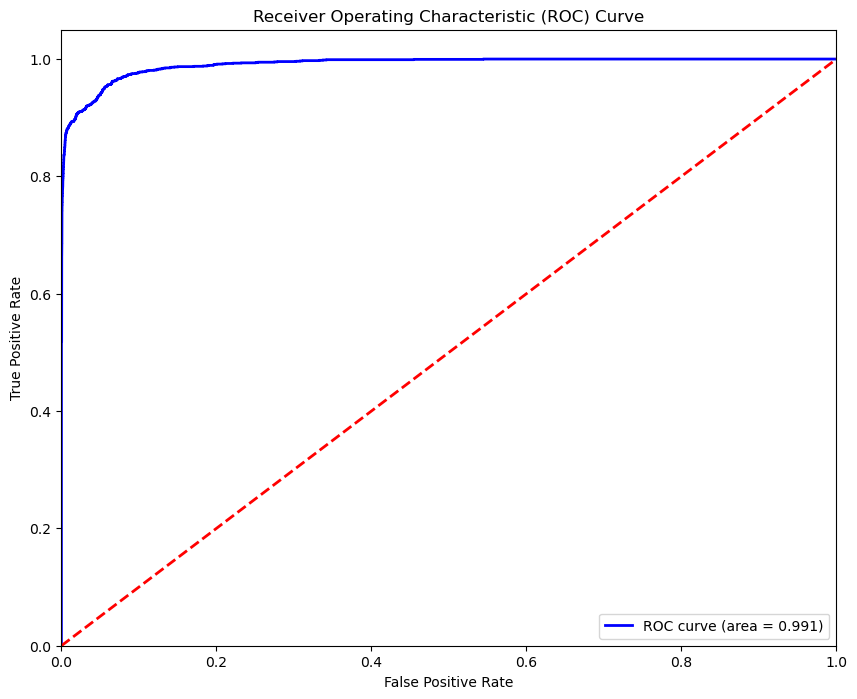


Comparison of Training and Testing Performance:
Training Mean Accuracy: 1.000 vs Testing Accuracy: 0.973
Training Mean Precision: 1.000 vs Testing Precision: 1.000
Training Mean Recall: 1.000 vs Testing Recall: 0.495
Training Mean F1 Score: 1.000 vs Testing F1 Score: 0.663
Training Mean ROC AUC: 1.000 vs Testing ROC AUC: 0.991
Training Mean MSE: 0.000 vs Testing MSE: 0.027


In [55]:
# Import necessary libraries
import pandas as pd
from category_encoders import LeaveOneOutEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Assuming df4 is the DataFrame after all previous cleaning steps
df4_leave_one_out = df4.copy()

# Define categorical columns
categorical_columns = df4_leave_one_out.select_dtypes(include=['category']).columns.tolist()

# Convert datetime columns to numerical features
datetime_columns = df4_leave_one_out.select_dtypes(include=['datetime']).columns.tolist()
for col in datetime_columns:
    df4_leave_one_out[col + '_year'] = df4_leave_one_out[col].dt.year
    df4_leave_one_out[col + '_month'] = df4_leave_one_out[col].dt.month
    df4_leave_one_out[col + '_day'] = df4_leave_one_out[col].dt.day
    df4_leave_one_out.drop(columns=[col], inplace=True)

# Define features and target
X = df4_leave_one_out.drop(columns=['default_ind'])
y = df4_leave_one_out['default_ind']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Apply Leave-One-Out encoding
encoder = LeaveOneOutEncoder(cols=categorical_columns)
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

# Define the imputer
imputer = SimpleImputer(strategy='mean')

# Define the model with increased regularization
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)

# Create a pipeline that first imputes missing values, then fits the model
pipeline = Pipeline(steps=[
    ('imputer', imputer),
    ('classifier', clf_rf)
])

# Define the k-fold cross-validation settings
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True),
    'mse': make_scorer(mean_squared_error)
}

# Perform cross-validation and calculate metrics for the training data
cv_results = cross_validate(pipeline, X_train_encoded, y_train, cv=kf, scoring=scoring, return_train_score=True)

# Report mean training metrics
print("Training Metrics (Cross-Validation):")
print(f"Mean Accuracy: {cv_results['train_accuracy'].mean():.3f}")
print(f"Mean Precision: {cv_results['train_precision'].mean():.3f}")
print(f"Mean Recall: {cv_results['train_recall'].mean():.3f}")
print(f"Mean F1 Score: {cv_results['train_f1'].mean():.3f}")
print(f"Mean ROC AUC: {cv_results['train_roc_auc'].mean():.3f}")
print(f"Mean MSE: {cv_results['train_mse'].mean():.3f}")

# Report mean test metrics from cross-validation
print("\nCross-Validation Test Metrics:")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean Precision: {cv_results['test_precision'].mean():.3f}")
print(f"Mean Recall: {cv_results['test_recall'].mean():.3f}")
print(f"Mean F1 Score: {cv_results['test_f1'].mean():.3f}")
print(f"Mean ROC AUC: {cv_results['test_roc_auc'].mean():.3f}")
print(f"Mean MSE: {cv_results['test_mse'].mean():.3f}")

# Train the final model on the entire training set
pipeline.fit(X_train_encoded, y_train)

# Predict probabilities on the test set
y_pred_proba = pipeline.predict_proba(X_test_encoded)[:, 1]

# Predict classes on the test set
y_pred = pipeline.predict(X_test_encoded)

# Calculate evaluation metrics on the test set
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
mse = mean_squared_error(y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Print evaluation metrics on the test set
print("\nEvaluation on the Test Set:")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")

# Calculate ROC curve on the test set
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Compare training and testing performance
print("\nComparison of Training and Testing Performance:")
print(f'Training Mean Accuracy: {cv_results["train_accuracy"].mean():.3f} vs Testing Accuracy: {accuracy:.3f}')
print(f'Training Mean Precision: {cv_results["train_precision"].mean():.3f} vs Testing Precision: {precision:.3f}')
print(f'Training Mean Recall: {cv_results["train_recall"].mean():.3f} vs Testing Recall: {recall:.3f}')
print(f'Training Mean F1 Score: {cv_results["train_f1"].mean():.3f} vs Testing F1 Score: {f1:.3f}')
print(f'Training Mean ROC AUC: {cv_results["train_roc_auc"].mean():.3f} vs Testing ROC AUC: {roc_auc:.3f}')
print(f'Training Mean MSE: {cv_results["train_mse"].mean():.3f} vs Testing MSE: {mse:.3f}')


# Weight of Evidence Encoding

Training Metrics (Cross-Validation):
Mean Accuracy: 0.993
Mean Precision: 1.000
Mean Recall: 0.868
Mean F1 Score: 0.929
Mean ROC AUC: 1.000
Mean MSE: 0.007

Cross-Validation Test Metrics:
Mean Accuracy: 0.991
Mean Precision: 1.000
Mean Recall: 0.827
Mean F1 Score: 0.905
Mean ROC AUC: 0.999
Mean MSE: 0.009

Evaluation on the Test Set:
Confusion Matrix:
[[32378     2]
 [  304  1555]]
Accuracy: 0.991
Precision: 0.999
Recall: 0.836
F1 Score: 0.910
Specificity: 1.000
ROC AUC: 0.999
Mean Squared Error (MSE): 0.009


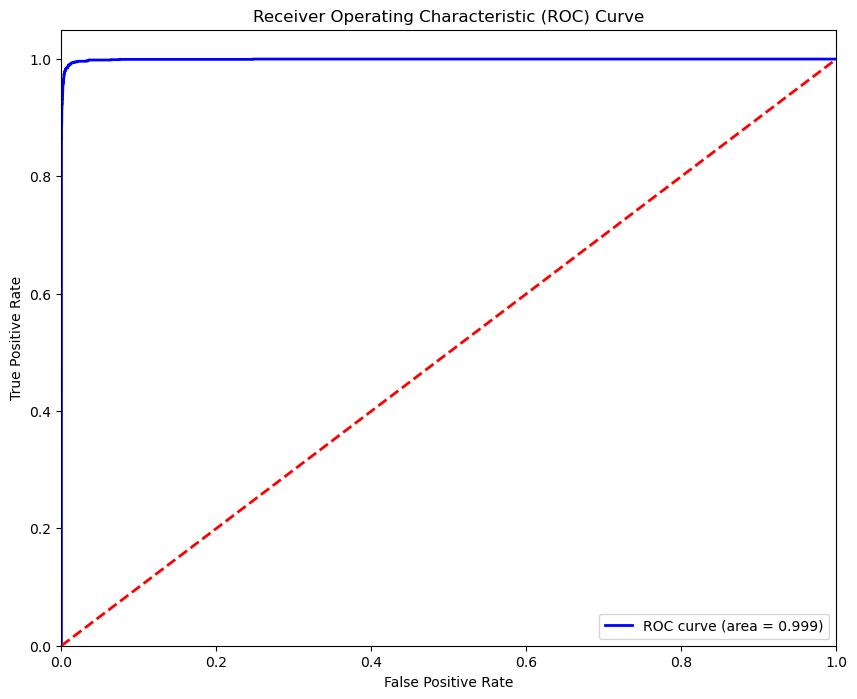


Comparison of Training and Testing Performance:
Training Mean Accuracy: 0.993 vs Testing Accuracy: 0.991
Training Mean Precision: 1.000 vs Testing Precision: 0.999
Training Mean Recall: 0.868 vs Testing Recall: 0.836
Training Mean F1 Score: 0.929 vs Testing F1 Score: 0.910
Training Mean ROC AUC: 1.000 vs Testing ROC AUC: 0.999
Training Mean MSE: 0.007 vs Testing MSE: 0.009


In [57]:
# Import necessary libraries
import pandas as pd
from category_encoders.woe import WOEEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Assuming df4 is the DataFrame after all previous cleaning steps
df4_woe_encoded = df4.copy()

# Define categorical columns
categorical_columns = df4_woe_encoded.select_dtypes(include=['category']).columns.tolist()

# Convert datetime columns to numerical features
datetime_columns = df4_woe_encoded.select_dtypes(include=['datetime']).columns.tolist()
for col in datetime_columns:
    df4_woe_encoded[col + '_year'] = df4_woe_encoded[col].dt.year
    df4_woe_encoded[col + '_month'] = df4_woe_encoded[col].dt.month
    df4_woe_encoded[col + '_day'] = df4_woe_encoded[col].dt.day
    df4_woe_encoded.drop(columns=[col], inplace=True)

# Define features and target
X = df4_woe_encoded.drop(columns=['default_ind'])
y = df4_woe_encoded['default_ind']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Apply Weight of Evidence (WOE) encoding
encoder = WOEEncoder(cols=categorical_columns)
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

# Define the imputer
imputer = SimpleImputer(strategy='mean')

# Define the model with increased regularization
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)

# Create a pipeline that first imputes missing values, then fits the model
pipeline = Pipeline(steps=[
    ('imputer', imputer),
    ('classifier', clf_rf)
])

# Define the k-fold cross-validation settings
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True),
    'mse': make_scorer(mean_squared_error)
}

# Perform cross-validation and calculate metrics for the training data
cv_results = cross_validate(pipeline, X_train_encoded, y_train, cv=kf, scoring=scoring, return_train_score=True)

# Report mean training metrics
print("Training Metrics (Cross-Validation):")
print(f"Mean Accuracy: {cv_results['train_accuracy'].mean():.3f}")
print(f"Mean Precision: {cv_results['train_precision'].mean():.3f}")
print(f"Mean Recall: {cv_results['train_recall'].mean():.3f}")
print(f"Mean F1 Score: {cv_results['train_f1'].mean():.3f}")
print(f"Mean ROC AUC: {cv_results['train_roc_auc'].mean():.3f}")
print(f"Mean MSE: {cv_results['train_mse'].mean():.3f}")

# Report mean test metrics from cross-validation
print("\nCross-Validation Test Metrics:")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean Precision: {cv_results['test_precision'].mean():.3f}")
print(f"Mean Recall: {cv_results['test_recall'].mean():.3f}")
print(f"Mean F1 Score: {cv_results['test_f1'].mean():.3f}")
print(f"Mean ROC AUC: {cv_results['test_roc_auc'].mean():.3f}")
print(f"Mean MSE: {cv_results['test_mse'].mean():.3f}")

# Train the final model on the entire training set
pipeline.fit(X_train_encoded, y_train)

# Predict probabilities on the test set
y_pred_proba = pipeline.predict_proba(X_test_encoded)[:, 1]

# Predict classes on the test set
y_pred = pipeline.predict(X_test_encoded)

# Calculate evaluation metrics on the test set
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
mse = mean_squared_error(y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Print evaluation metrics on the test set
print("\nEvaluation on the Test Set:")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")

# Calculate ROC curve on the test set
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Compare training and testing performance
print("\nComparison of Training and Testing Performance:")
print(f'Training Mean Accuracy: {cv_results["train_accuracy"].mean():.3f} vs Testing Accuracy: {accuracy:.3f}')
print(f'Training Mean Precision: {cv_results["train_precision"].mean():.3f} vs Testing Precision: {precision:.3f}')
print(f'Training Mean Recall: {cv_results["train_recall"].mean():.3f} vs Testing Recall: {recall:.3f}')
print(f'Training Mean F1 Score: {cv_results["train_f1"].mean():.3f} vs Testing F1 Score: {f1:.3f}')
print(f'Training Mean ROC AUC: {cv_results["train_roc_auc"].mean():.3f} vs Testing ROC AUC: {roc_auc:.3f}')
print(f'Training Mean MSE: {cv_results["train_mse"].mean():.3f} vs Testing MSE: {mse:.3f}')


# Binary Encoding

Training Metrics (Cross-Validation):
Mean Accuracy: 0.985
Mean Precision: 1.000
Mean Recall: 0.721
Mean F1 Score: 0.838
Mean ROC AUC: 1.000
Mean MSE: 0.015

Cross-Validation Test Metrics:
Mean Accuracy: 0.981
Mean Precision: 1.000
Mean Recall: 0.657
Mean F1 Score: 0.793
Mean ROC AUC: 0.999
Mean MSE: 0.019

Evaluation on the Test Set:
Confusion Matrix:
[[32380     0]
 [  624  1235]]
Accuracy: 0.982
Precision: 1.000
Recall: 0.664
F1 Score: 0.798
Specificity: 1.000
ROC AUC: 0.999
Mean Squared Error (MSE): 0.018


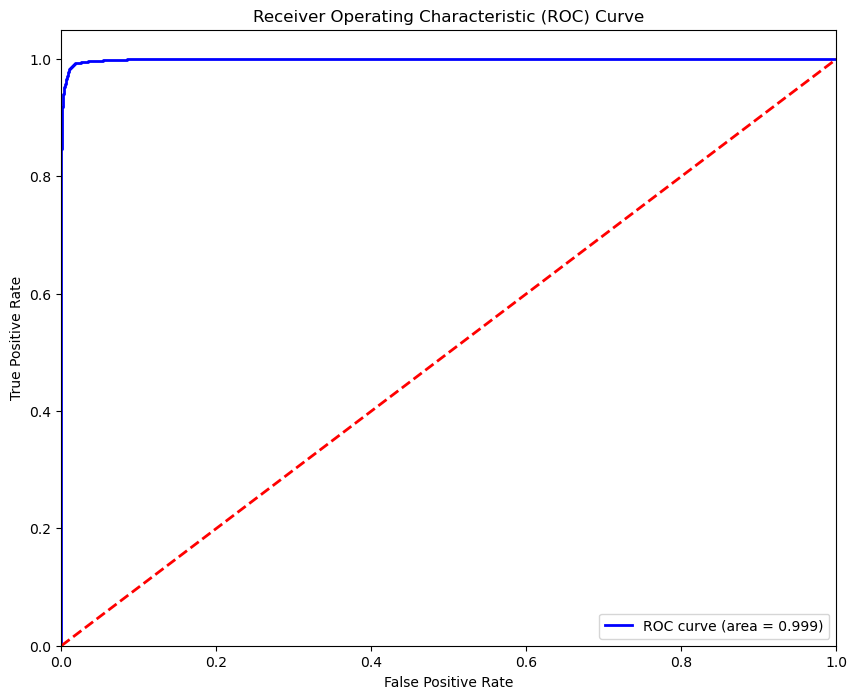


Comparison of Training and Testing Performance:
Training Mean Accuracy: 0.985 vs Testing Accuracy: 0.982
Training Mean Precision: 1.000 vs Testing Precision: 1.000
Training Mean Recall: 0.721 vs Testing Recall: 0.664
Training Mean F1 Score: 0.838 vs Testing F1 Score: 0.798
Training Mean ROC AUC: 1.000 vs Testing ROC AUC: 0.999
Training Mean MSE: 0.015 vs Testing MSE: 0.018


In [58]:
# Import necessary libraries
import pandas as pd
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Assuming df4 is the DataFrame after all previous cleaning steps
df4_binary_encoded = df4.copy()

# Define categorical columns
categorical_columns = df4_binary_encoded.select_dtypes(include=['category']).columns.tolist()

# Convert datetime columns to numerical features
datetime_columns = df4_binary_encoded.select_dtypes(include=['datetime']).columns.tolist()
for col in datetime_columns:
    df4_binary_encoded[col + '_year'] = df4_binary_encoded[col].dt.year
    df4_binary_encoded[col + '_month'] = df4_binary_encoded[col].dt.month
    df4_binary_encoded[col + '_day'] = df4_binary_encoded[col].dt.day
    df4_binary_encoded.drop(columns=[col], inplace=True)

# Define features and target
X = df4_binary_encoded.drop(columns=['default_ind'])
y = df4_binary_encoded['default_ind']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Apply Binary encoding
encoder = BinaryEncoder(cols=categorical_columns)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Define the imputer
imputer = SimpleImputer(strategy='mean')

# Define the model with increased regularization
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)

# Create a pipeline that first imputes missing values, then fits the model
pipeline = Pipeline(steps=[
    ('imputer', imputer),
    ('classifier', clf_rf)
])

# Define the k-fold cross-validation settings
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True),
    'mse': make_scorer(mean_squared_error)
}

# Perform cross-validation and calculate metrics for the training data
cv_results = cross_validate(pipeline, X_train_encoded, y_train, cv=kf, scoring=scoring, return_train_score=True)

# Report mean training metrics
print("Training Metrics (Cross-Validation):")
print(f"Mean Accuracy: {cv_results['train_accuracy'].mean():.3f}")
print(f"Mean Precision: {cv_results['train_precision'].mean():.3f}")
print(f"Mean Recall: {cv_results['train_recall'].mean():.3f}")
print(f"Mean F1 Score: {cv_results['train_f1'].mean():.3f}")
print(f"Mean ROC AUC: {cv_results['train_roc_auc'].mean():.3f}")
print(f"Mean MSE: {cv_results['train_mse'].mean():.3f}")

# Report mean test metrics from cross-validation
print("\nCross-Validation Test Metrics:")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean Precision: {cv_results['test_precision'].mean():.3f}")
print(f"Mean Recall: {cv_results['test_recall'].mean():.3f}")
print(f"Mean F1 Score: {cv_results['test_f1'].mean():.3f}")
print(f"Mean ROC AUC: {cv_results['test_roc_auc'].mean():.3f}")
print(f"Mean MSE: {cv_results['test_mse'].mean():.3f}")

# Train the final model on the entire training set
pipeline.fit(X_train_encoded, y_train)

# Predict probabilities on the test set
y_pred_proba = pipeline.predict_proba(X_test_encoded)[:, 1]

# Predict classes on the test set
y_pred = pipeline.predict(X_test_encoded)

# Calculate evaluation metrics on the test set
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
mse = mean_squared_error(y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Print evaluation metrics on the test set
print("\nEvaluation on the Test Set:")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")

# Calculate ROC curve on the test set
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Compare training and testing performance
print("\nComparison of Training and Testing Performance:")
print(f'Training Mean Accuracy: {cv_results["train_accuracy"].mean():.3f} vs Testing Accuracy: {accuracy:.3f}')
print(f'Training Mean Precision: {cv_results["train_precision"].mean():.3f} vs Testing Precision: {precision:.3f}')
print(f'Training Mean Recall: {cv_results["train_recall"].mean():.3f} vs Testing Recall: {recall:.3f}')
print(f'Training Mean F1 Score: {cv_results["train_f1"].mean():.3f} vs Testing F1 Score: {f1:.3f}')
print(f'Training Mean ROC AUC: {cv_results["train_roc_auc"].mean():.3f} vs Testing ROC AUC: {roc_auc:.3f}')
print(f'Training Mean MSE: {cv_results["train_mse"].mean():.3f} vs Testing MSE: {mse:.3f}')
